In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Apr  7 03:43:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install numpy==1.18.1


     |████████████████████████████████| 20.1 MB 1.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.18.1 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.18.1 which is incompatible.
kapre 0.3.7 requires numpy>=1.18.5, but you have numpy 1.18.1 which is incompatible.
jaxlib 0.3.2+cuda11.cudnn805 requires numpy>=1.19, but you have numpy 1.18.1 which is incompatible.
jax 0.3.4 requires numpy>=1.19, but you have numpy 1.18.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incom

In [ ]:
!pip install -U tensorflow==1.15.0

!pip install tensorflow-gpu==1.15.0

!pip install tflearn==0.3.2
# !pip install numpy==1.18.1
# !pip install pandas==0.25.1
!pip install gym==0.17.1
# !pip install trading-calendars==2.0.0
!pip install h5py==2.10.0
# !pip install hdf5==1.10.4
# !pip install yfinance


     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 503 kB 46.4 MB/s 
     |████████████████████████████████| 3.8 MB 43.8 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=33120cebb60406116b20d3bd53a1dda9e900c9993e001071c36dd9130214a77b
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succes

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 1.x selected.
Found GPU at: /device:GPU:0


In [ ]:
  with tf.device('/device:GPU:0'):
    print("Hi")

Hi


In [ ]:
!pip install tf_slim

     |████████████████████████████████| 352 kB 13.3 MB/s 


In [ ]:
"""
Contains a set of utility function to process data
"""
from __future__ import print_function, division

import numpy as np
import h5py
import statistics

# Import Third-Party
import pandas as pd

from pprint import pprint
import matplotlib.pyplot as plt
import gym
import gym.spaces

from collections import deque
import random

import tensorflow as tf
import tflearn

import os
import traceback
import json
import math

import argparse
import tf_slim as slim
# import pprint
import sys
print("import completed")







import completed


In [ ]:
!python --version

Python 3.7.13


In [ ]:
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
print(tf.__version__)

1.15.2


In [ ]:
# From ./utils/data.py
exclude_set = {}

def normalize(x):
    """ Create a universal normalization function across close/open ratio
    Args:
        x: input of any shape
    Returns: normalized data
    """
    #return (x - 1) * 100
    
    w = x.shape[1]
    a = x.shape[0]
    _x = x.reshape(a,w)
    result = x.copy()
    
    for i in range(w):
        mean = sum(_x[:,i])/a 
        std = statistics.stdev(_x[:,i])
        
        for j in range(a):
            if std != 0:
                result[j,i,0] = (_x[j,i] - mean)/std
            else: 
                result[j,i,0] = (_x[j,i] - mean)
    
    return result


def write_to_h5py(history, abbreviation, date_list, filepath='datasets/stocks_history_2.h5'):
    """ Write a numpy array history and a list of string to h5py
    Args:
        history: (N, timestamp, 5)
        abbreviation: a list of stock abbreviations
        dates
    Returns:
    """
    with h5py.File(filepath, 'w') as f:
        f.create_dataset('history', data=history)
        abbr_array = np.array(abbreviation, dtype=object)
        string_dt = h5py.special_dtype(vlen=str)
        f.create_dataset("abbreviation", data=abbr_array, dtype=string_dt)
        date_array = np.array(date_list, dtype=object)
        f.create_dataset("dates", data=date_array, dtype=string_dt)


def read_stock_history(filepath='datasets/stocks_history.h5'):
    """ Read data from extracted h5
    Args:
        filepath: path of file
    Returns:
        history:
        abbreviation:
        dates:
    """
    with h5py.File(filepath, 'r') as f:
        history = f['history'][:]
        abbreviation = f['abbreviation'][:].tolist()
        if not isinstance(abbreviation[0], str):
            abbreviation = [abbr.decode('utf-8') for abbr in abbreviation]
        dates = f['dates'][:].tolist()
    return history, abbreviation, dates

In [ ]:
"""
github.com/Crypto-toolbox/pandas-technical-indicators
Indicators as shown by Peter Bakker at:
https://www.quantopian.com/posts/technical-analysis-indicators-without-talib-code
"""

"""
25-Mar-2018: Fixed syntax to support the newest version of Pandas. Warnings should no longer appear.
             Fixed some bugs regarding min_periods and NaN.
			 If you find any bugs, please report to github.com/palmbook
"""
# From ./technical_indicators/technical_indicators.py

def moving_average(close_list, n):
    """Calculate the moving average for the given data.
    
    :param close_list: list
    :param n: window length
    :return: pandas.DataFrame
    """
    close_series = pd.Series(close_list)
    MA = pd.Series(close_series.rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA

# OLMAR ================================================
def olmar_predict(close_list):
        """ Predict returns on next day. """
        return (close_list / close_list[-1]).mean()

def olmar_moving_average(close_list, n):
    """Calculate the moving average for the given data.
    
    :param close_list: list
    :param n: window length
    :return: pandas.DataFrame
    """
    
    close_series = pd.Series(close_list)
    MA = pd.Series(close_series.rolling(n).apply(olmar_predict), name='OLMAR_MA_' + str(n))
    return MA

# RMR ====================================================
def norm(x):
    if isinstance(x, pd.Series):
        axis = 0
    else:
        axis = 1
    return np.sqrt((x**2).sum(axis=axis))

def rmr_predict(x, history):
    #print(x)
    #print(history)
    """ find L1 median to historical prices """
    tau = 0.001
    y = history.mean()
    y_last = None
    while y_last is None or norm(y - y_last) / norm(y_last) > tau:
        y_last = y
        d = norm(history - y)
        y = history.div(d, axis=0).sum() / (1. / d).sum() 
    return y / x

def full_rmr_moving_average(close_series_df, n):
    rmr_result_df = pd.DataFrame([], columns=list(close_series_df.columns))
    for i in range(n-1):
        rmr_result_df = rmr_result_df.append(pd.Series(), ignore_index=True)
    for i in range(len(close_series_df)-(n-1)):
        history = close_series_df.iloc[i:i+n]
        x = history.iloc[-1]
        s = rmr_predict(x, history)
        rmr_result_df = rmr_result_df.append(s,ignore_index=True)
    return rmr_result_df


def exponential_moving_average(close_list, n):
    """
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    close_series = pd.Series(close_list)
    EMA = pd.Series(close_series.ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA


def momentum(close_list, n):
    """
    
    :param df: pandas.DataFrame 
    :param n: 
    :return: pandas.DataFrame
    """
    close_series = pd.Series(close_list)
    M = pd.Series(close_series.diff(n), name='Momentum_' + str(n))
    return M


def rate_of_change(close_list, n):
    """
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    close_series = pd.Series(close_list)
    M = close_series.diff(n - 1)
    N = close_series.shift(n - 1)
    ROC = pd.Series(M / N, name='ROC_' + str(n))
    return ROC


def bollinger_bands(close_list, n):
    """
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    close_series = pd.Series(close_list)
    MA = pd.Series(close_series.rolling(n, min_periods=n).mean())
    MSD = pd.Series(close_series.rolling(n, min_periods=n).std())
    Upper = MA + (MSD * 2)
    Lower = MA - (MSD * 2)
    return Upper, Lower


def trix(close_list, n):
    """Calculate TRIX for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    close_series = pd.Series(close_list)
    EX1 = close_series.ewm(span=n, min_periods=n).mean()
    EX2 = EX1.ewm(span=n, min_periods=n).mean()
    EX3 = EX2.ewm(span=n, min_periods=n).mean()
    i = 0
    ROC_l = [np.nan]
    while i + 1 <= close_series.index[-1]:
        ROC = (EX3[i + 1] - EX3[i]) / EX3[i]
        ROC_l.append(ROC)
        i = i + 1
    return pd.Series(ROC_l, name='Trix_' + str(n))


def standard_deviation(close_list, n):
    """Calculate Standard Deviation for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    close_series = pd.Series(close_list)
    return pd.Series(close_series.rolling(n, min_periods=n).std(), name='STD_' + str(n))


def average_directional_movement_index(df, n, n_ADX):
    """Calculate the Average Directional Movement Index for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :param n_ADX: 
    :return: pandas.DataFrame
    """
    i = 0
    UpI = []
    DoI = []
    while i + 1 <= df.index[-1]:
        UpMove = df.loc[i + 1, 'High'] - df.loc[i, 'High']
        DoMove = df.loc[i, 'Low'] - df.loc[i + 1, 'Low']
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    i = 0
    TR_l = [0]
    while i < df.index[-1]:
        TR = max(df.loc[i + 1, 'High'], df.loc[i, 'Close']) - min(df.loc[i + 1, 'Low'], df.loc[i, 'Close'])
        TR_l.append(TR)
        i = i + 1
    TR_s = pd.Series(TR_l)
    ATR = pd.Series(TR_s.ewm(span=n, min_periods=n).mean())
    UpI = pd.Series(UpI)
    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean() / ATR)
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean() / ATR)
    ADX = pd.Series((abs(PosDI - NegDI) / (PosDI + NegDI)).ewm(span=n_ADX, min_periods=n_ADX).mean(),
                    name='ADX_' + str(n) + '_' + str(n_ADX))
    df = df.join(ADX)
    return df


def macd(df, n_fast, n_slow):
    """Calculate MACD, MACD Signal and MACD difference
    
    :param df: pandas.DataFrame
    :param n_fast: 
    :param n_slow: 
    :return: pandas.DataFrame
    """
    EMAfast = pd.Series(df['Close'].ewm(span=n_fast, min_periods=n_slow).mean())
    EMAslow = pd.Series(df['Close'].ewm(span=n_slow, min_periods=n_slow).mean())
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods=9).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    df = df.join(MACD)
    df = df.join(MACDsign)
    df = df.join(MACDdiff)
    return df


def mass_index(df):
    """Calculate the Mass Index for given data.
    
    :param df: pandas.DataFrame
    :return: pandas.DataFrame
    """
    Range = df['High'] - df['Low']
    EX1 = Range.ewm(span=9, min_periods=9).mean()
    EX2 = EX1.ewm(span=9, min_periods=9).mean()
    Mass = EX1 / EX2
    MassI = pd.Series(Mass.rolling(25).sum(), name='Mass Index')
    df = df.join(MassI)
    return df


def vortex_indicator(df, n):
    """Calculate the Vortex Indicator for given data.
    
    Vortex Indicator described here:
        http://www.vortexindicator.com/VFX_VORTEX.PDF
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    i = 0
    TR = [0]
    while i < df.index[-1]:
        Range = max(df.loc[i + 1, 'High'], df.loc[i, 'Close']) - min(df.loc[i + 1, 'Low'], df.loc[i, 'Close'])
        TR.append(Range)
        i = i + 1
    i = 0
    VM = [0]
    while i < df.index[-1]:
        Range = abs(df.loc[i + 1, 'High'] - df.loc[i, 'Low']) - abs(df.loc[i + 1, 'Low'] - df.loc[i, 'High'])
        VM.append(Range)
        i = i + 1
    VI = pd.Series(pd.Series(VM).rolling(n).sum() / pd.Series(TR).rolling(n).sum(), name='Vortex_' + str(n))
    df = df.join(VI)
    return df


def kst_oscillator(df, r1, r2, r3, r4, n1, n2, n3, n4):
    """Calculate KST Oscillator for given data.
    
    :param df: pandas.DataFrame
    :param r1: 
    :param r2: 
    :param r3: 
    :param r4: 
    :param n1: 
    :param n2: 
    :param n3: 
    :param n4: 
    :return: pandas.DataFrame
    """
    M = df['Close'].diff(r1 - 1)
    N = df['Close'].shift(r1 - 1)
    ROC1 = M / N
    M = df['Close'].diff(r2 - 1)
    N = df['Close'].shift(r2 - 1)
    ROC2 = M / N
    M = df['Close'].diff(r3 - 1)
    N = df['Close'].shift(r3 - 1)
    ROC3 = M / N
    M = df['Close'].diff(r4 - 1)
    N = df['Close'].shift(r4 - 1)
    ROC4 = M / N
    KST = pd.Series(
        ROC1.rolling(n1).sum() + ROC2.rolling(n2).sum() * 2 + ROC3.rolling(n3).sum() * 3 + ROC4.rolling(n4).sum() * 4,
        name='KST_' + str(r1) + '_' + str(r2) + '_' + str(r3) + '_' + str(r4) + '_' + str(n1) + '_' + str(
            n2) + '_' + str(n3) + '_' + str(n4))
    df = df.join(KST)
    return df


def relative_strength_index(df, n):
    """Calculate Relative Strength Index(RSI) for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    i = 0
    UpI = [0]
    DoI = [0]
    while i + 1 <= df.index[-1]:
        UpMove = df.loc[i + 1, 'High'] - df.loc[i, 'High']
        DoMove = df.loc[i, 'Low'] - df.loc[i + 1, 'Low']
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.Series(UpI)
    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())
    RSI = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
    df = df.join(RSI)
    return df


def true_strength_index(df, r, s):
    """Calculate True Strength Index (TSI) for given data.
    
    :param df: pandas.DataFrame
    :param r: 
    :param s: 
    :return: pandas.DataFrame
    """
    M = pd.Series(df['Close'].diff(1))
    aM = abs(M)
    EMA1 = pd.Series(M.ewm(span=r, min_periods=r).mean())
    aEMA1 = pd.Series(aM.ewm(span=r, min_periods=r).mean())
    EMA2 = pd.Series(EMA1.ewm(span=s, min_periods=s).mean())
    aEMA2 = pd.Series(aEMA1.ewm(span=s, min_periods=s).mean())
    TSI = pd.Series(EMA2 / aEMA2, name='TSI_' + str(r) + '_' + str(s))
    df = df.join(TSI)
    return df


def accumulation_distribution(df, n):
    """Calculate Accumulation/Distribution for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']
    M = ad.diff(n - 1)
    N = ad.shift(n - 1)
    ROC = M / N
    AD = pd.Series(ROC, name='Acc/Dist_ROC_' + str(n))
    df = df.join(AD)
    return df


def chaikin_oscillator(df):
    """Calculate Chaikin Oscillator for given data.
    
    :param df: pandas.DataFrame
    :return: pandas.DataFrame
    """
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']
    Chaikin = pd.Series(ad.ewm(span=3, min_periods=3).mean() - ad.ewm(span=10, min_periods=10).mean(), name='Chaikin')
    df = df.join(Chaikin)
    return df


def money_flow_index(df, n):
    """Calculate Money Flow Index and Ratio for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    PP = (df['High'] + df['Low'] + df['Close']) / 3
    i = 0
    PosMF = [0]
    while i < df.index[-1]:
        if PP[i + 1] > PP[i]:
            PosMF.append(PP[i + 1] * df.loc[i + 1, 'Volume'])
        else:
            PosMF.append(0)
        i = i + 1
    PosMF = pd.Series(PosMF)
    TotMF = PP * df['Volume']
    MFR = pd.Series(PosMF / TotMF)
    MFI = pd.Series(MFR.rolling(n, min_periods=n).mean(), name='MFI_' + str(n))
    df = df.join(MFI)
    return df


def on_balance_volume(df, n):
    """Calculate On-Balance Volume for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    i = 0
    OBV = [0]
    while i < df.index[-1]:
        if df.loc[i + 1, 'Close'] - df.loc[i, 'Close'] > 0:
            OBV.append(df.loc[i + 1, 'Volume'])
        if df.loc[i + 1, 'Close'] - df.loc[i, 'Close'] == 0:
            OBV.append(0)
        if df.loc[i + 1, 'Close'] - df.loc[i, 'Close'] < 0:
            OBV.append(-df.loc[i + 1, 'Volume'])
        i = i + 1
    OBV = pd.Series(OBV)
    OBV_ma = pd.Series(OBV.rolling(n, min_periods=n).mean(), name='OBV_' + str(n))
    df = df.join(OBV_ma)
    return df


def force_index(df, n):
    """Calculate Force Index for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    F = pd.Series(df['Close'].diff(n) * df['Volume'].diff(n), name='Force_' + str(n))
    df = df.join(F)
    return df


def ease_of_movement(df, n):
    """Calculate Ease of Movement for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    EoM = (df['High'].diff(1) + df['Low'].diff(1)) * (df['High'] - df['Low']) / (2 * df['Volume'])
    Eom_ma = pd.Series(EoM.rolling(n, min_periods=n).mean(), name='EoM_' + str(n))
    df = df.join(Eom_ma)
    return df


def commodity_channel_index(df, n):
    """Calculate Commodity Channel Index for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    PP = (df['High'] + df['Low'] + df['Close']) / 3
    CCI = pd.Series((PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std(),
                    name='CCI_' + str(n))
    df = df.join(CCI)
    return df


def coppock_curve(df, n):
    """Calculate Coppock Curve for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    M = df['Close'].diff(int(n * 11 / 10) - 1)
    N = df['Close'].shift(int(n * 11 / 10) - 1)
    ROC1 = M / N
    M = df['Close'].diff(int(n * 14 / 10) - 1)
    N = df['Close'].shift(int(n * 14 / 10) - 1)
    ROC2 = M / N
    Copp = pd.Series((ROC1 + ROC2).ewm(span=n, min_periods=n).mean(), name='Copp_' + str(n))
    df = df.join(Copp)
    return df


def keltner_channel(df, n):
    """Calculate Keltner Channel for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    KelChM = pd.Series(((df['High'] + df['Low'] + df['Close']) / 3).rolling(n, min_periods=n).mean(),
                       name='KelChM_' + str(n))
    KelChU = pd.Series(((4 * df['High'] - 2 * df['Low'] + df['Close']) / 3).rolling(n, min_periods=n).mean(),
                       name='KelChU_' + str(n))
    KelChD = pd.Series(((-2 * df['High'] + 4 * df['Low'] + df['Close']) / 3).rolling(n, min_periods=n).mean(),
                       name='KelChD_' + str(n))
    df = df.join(KelChM)
    df = df.join(KelChU)
    df = df.join(KelChD)
    return df


def ultimate_oscillator(df):
    """Calculate Ultimate Oscillator for given data.
    
    :param df: pandas.DataFrame
    :return: pandas.DataFrame
    """
    i = 0
    TR_l = [0]
    BP_l = [0]
    while i < df.index[-1]:
        TR = max(df.loc[i + 1, 'High'], df.loc[i, 'Close']) - min(df.loc[i + 1, 'Low'], df.loc[i, 'Close'])
        TR_l.append(TR)
        BP = df.loc[i + 1, 'Close'] - min(df.loc[i + 1, 'Low'], df.loc[i, 'Close'])
        BP_l.append(BP)
        i = i + 1
    UltO = pd.Series((4 * pd.Series(BP_l).rolling(7).sum() / pd.Series(TR_l).rolling(7).sum()) + (
                2 * pd.Series(BP_l).rolling(14).sum() / pd.Series(TR_l).rolling(14).sum()) + (
                                 pd.Series(BP_l).rolling(28).sum() / pd.Series(TR_l).rolling(28).sum()),
                     name='Ultimate_Osc')
    df = df.join(UltO)
    return df


def donchian_channel(df, n):
    """Calculate donchian channel of given pandas data frame.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    i = 0
    dc_l = []
    while i < n - 1:
        dc_l.append(0)
        i += 1

    i = 0
    while i + n - 1 < df.index[-1]:
        dc = max(df['High'].ix[i:i + n - 1]) - min(df['Low'].ix[i:i + n - 1])
        dc_l.append(dc)
        i += 1

    donchian_chan = pd.Series(dc_l, name='Donchian_' + str(n))
    donchian_chan = donchian_chan.shift(n - 1)
    return df.join(donchian_chan)

In [ ]:
"""
Modified from https://github.com/wassname/rl-portfolio-management/blob/master/src/environments/portfolio.py
"""
# From ./environments/portfolio.py

eps = 1e-8


def random_shift(x, fraction):
    """ Apply a random shift to a pandas series. """
    min_x, max_x = np.min(x), np.max(x)
    m = np.random.uniform(-fraction, fraction, size=x.shape) + 1
    return np.clip(x * m, min_x, max_x)


def scale_to_start(x):
    """ Scale pandas series so that it starts at one. """
    x = (x + eps) / (x[0] + eps)
    return x


def sharpe(returns, rfr=0):
    """ Given a set of returns, calculates naive (rfr=0) sharpe """
    if isinstance(returns, list):
        returns = np.array(returns)
    return (np.mean(returns - rfr + eps)) / np.std(returns - rfr + eps)


def sortino(returns, rfr=0):
    """ Given a set of returns, calculates naive (rfr=0) sortino """
    if isinstance(returns, list):
        returns = np.array(returns)
    return (np.mean(returns - rfr + eps)) / np.std([r for r in (returns - rfr + eps) if r < 0])


def max_drawdown(portfolio_value):
    """ Max drawdown. See https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp """
    mdd = 0
    peak = 0
    for i in list(range(len(portfolio_value))):
        # Check if possible peak
        if(portfolio_value[i] > peak):
            # Max drawdown assuming this is the peak
            peak = portfolio_value[i]
            trough = min(portfolio_value[i:])
            if(peak > trough):
                d = abs((trough - peak) / peak)
                if(d > mdd):
                    mdd = d
    return mdd


def create_close_dataframe(history, abbreviation, date_list):
    """
    Args:
        history: numpy array with full data (open, high, low, close, volume)
        abbreviation: list of Assets
        date_list: list of dates corresponding to history parameter
    Returns: Pandas Dataframe consisting of all the Close Prices
    """
    # Check if just close is fed or full dataset
    if history.shape[2] == 4:
        # Get Close
        history_close = history[:, :, 3]
    elif history.shape[2] == 2:
        # Assume the one sent is the close price
        history_close = history[:, :, 1]
    else:
        print("Invalid History Fomrat. Must be (x, y) or (x, y, 4)")
        return

    # Convert to Pandas
    transposed_target_history = history_close.transpose()
    date_list = [date_list[i] for i in range(transposed_target_history.shape[0])]

    df = pd.DataFrame(data=transposed_target_history,
                      index=date_list,
                      columns=abbreviation)

    return df


def convert_prices(S, method, replace_missing=False):
    """
    S: data in pandas dataframe format
    Convert prices to format suitable for weight or step function.
    Available price types are:
        ratio:  pt / pt_1
        log:    log(pt / pt_1)
        raw:    pt (normalized to start with 1)
    """
    if method == 'raw':
        # normalize prices so that they start with 1.
        r = {}
        for name, s in S.items():
            init_val = s.loc[s.first_valid_index()]
            r[name] = s / init_val
        X = pd.DataFrame(r)

        if replace_missing:
            X.iloc[0] = 1.
            X = X.fillna(method='ffill')

        return X

    elif method == 'absolute':
        return S

    elif method in ('ratio', 'log'):
        # be careful about NaN values
        X = S / S.shift(1).fillna(method='ffill')
        for name, s in X.iteritems():
            X[name].iloc[s.index.get_loc(s.first_valid_index()) - 1] = 1.

        if replace_missing:
            X = X.fillna(1.)

        return np.log(X) if method == 'log' else X

    else:
        raise ValueError('invalid price conversion method')


class DataGenerator(object):
    """Acts as data provider for each new episode."""

    def __init__(self, history, abbreviation, dates, steps=730, window_length=50, start_idx=0,
                 start_date=None, end_date=None, technical_indicators_flag=False, technical_indicator_history=None):
        """
        Args:
            history: (num_stocks, timestamp, 5) open, high, low, close, volume
            abbreviation: a list of length num_stocks with assets name
            steps: the total number of steps to simulate, default is 2 years
            window_length: observation window, must be less than 50
            start_date: the date to start. Default is None and random pick one.
                        It should be a string e.g. '2012-08-13'
        """
        assert history.shape[0] == len(abbreviation), 'Number of stock is not consistent'
        import copy
        self.step = 0
        self.steps = steps + 1
        self.window_length = window_length
        self.start_idx = start_idx
        self.start_date = start_date
        self.end_date = end_date
        self.dates = dates

        # make immutable class
        self._data = history.copy()  # all data
        self.asset_names = copy.copy(abbreviation)
        self.data = self._data
        self.idx = np.random.randint(low=self.window_length, high=self._data.shape[1] - self.steps)

        self.technical_indicators_flag = technical_indicators_flag

        if self.technical_indicators_flag:
            self._technical_indicator_data = technical_indicator_history.copy()
            self.technical_indicator_data = self._technical_indicator_data


    def _step(self):
        # get observation matrix from history, exclude volume, maybe volume is useful as it
        # indicates how market total investment changes. Normalize could be critical here
        self.step += 1

        # normalize obs with open price
        obs = self.data[:, self.step:self.step + self.window_length, :].copy()

        ti_obs = None
        # Include Technical indicator data
        if self.technical_indicators_flag:
            ti_obs = self.technical_indicator_data[:, self.step + self.window_length, :].copy()

        # used for compute optimal action and sanity check
        ground_truth_obs = self.data[:, self.step + self.window_length:self.step + self.window_length + 1, :].copy()

        done = self.step >= self.steps
        return obs, ti_obs, done, ground_truth_obs

    def reset(self):
        self.step = 0

        # get data for this episode, each episode might be different.
        if self.start_date is None:
            if self.end_date is None:
                self.idx = np.random.randint(low=self.window_length, high=self._data.shape[1] - self.steps)
            else:
                self.idx = np.random.randint(low=self.window_length, high=self.dates.index(self.end_date) - self.steps)
        else:
            # compute index corresponding to start_date for repeatable sequence
            self.idx = self.dates.index(self.start_date) - self.start_idx
            assert self.idx >= self.window_length and self.idx <= self._data.shape[1] - self.steps, \
                'Invalid start date, must be window_length day after start date and simulation steps day before end date'

        data = self._data[:, self.idx - self.window_length:self.idx + self.steps + 1, :]
        # apply augmentation?
        self.data = data

        obs = self.data[:, self.step:self.step + self.window_length, :].copy()

        ti_obs = None
        if self.technical_indicators_flag:
            technical_indicator_data = self._technical_indicator_data[:, self.idx - self.window_length:self.idx + self.steps + 1, :]
            self.technical_indicator_data = technical_indicator_data

            ti_obs = self.technical_indicator_data[:, self.step + self.window_length, :].copy()

        return obs, ti_obs,\
               self.data[:, self.step + self.window_length:self.step + self.window_length + 1, :].copy()


class PortfolioSim(object):
    """
    Portfolio management sim.
    Params:
    - cost e.g. 0.0025 is max in Poliniex
    Based of [Jiang 2017](https://arxiv.org/abs/1706.10059)
    """

    def __init__(self, asset_names=list(), steps=730, trading_cost=0.0025, time_cost=0.0):
        self.asset_names = asset_names
        self.cost = trading_cost
        self.time_cost = time_cost
        self.steps = steps
        self.p0 = 0
        self.infos = []

    def _step(self, w1, y1):
        """
        Step.
        w1 - new action of portfolio weights - e.g. [0.1,0.9,0.0]
        y1 - price relative vector also called return
            e.g. [1.0, 0.9, 1.1]
        Numbered equations are from https://arxiv.org/abs/1706.10059
        """
        assert w1.shape == y1.shape, 'w1 and y1 must have the same shape'
        assert y1[0] == 1.0, 'y1[0] must be 1'

        #p0 = self.p0

        dw1 = (y1 * w1) / (np.dot(y1, w1) + eps)  # (eq7) weights evolve into

        mu1 = self.cost * (np.abs(dw1 - w1)).sum()  # (eq16) cost to change portfolio

        assert mu1 < 1.0, 'Cost is larger than current holding'

        p1 = self.p0 * (1 - mu1) * np.dot(y1, w1)  # (eq11) final portfolio value

        p1 = p1 * (1 - self.time_cost)  # we can add a cost to holding

        rho1 = p1 / self.p0 - 1  # rate of returns

        r1 = np.log((p1 + eps) / (self.p0 + eps))  # log rate of return

        reward = r1 / self.steps * 1000  # (22) average logarithmic accumulated return

        # PRINT
        #print("Current Portfolio Value: {}".format(self.p0))
        #print("Weights: {}".format(np.around(w1, decimals=2)))
        #print("DW1: {}".format(np.around(dw1, decimals=2)))
        #print("Prices: {}".format(y1))
        #print("Cost to Change Portfolio: {}".format(mu1))
        #print("New Portfolio Value: {}".format(p1))
        #print("Reward: {}".format(reward))
        #print("Actual Portfolio Value: {}".format(subset_portfolio_df.iloc[i+2].values, subset_portfolio_df.index[i+2]))
        #print("-------------------------------------------------------")

        # remember for next step
        self.p0 = p1

        # if we run out of money, we're done (losing all the money)
        done = p1 == 0

        info = {
            "reward": reward,
            "log_return": r1,
            "portfolio_value": p1,
            "return": y1.mean(),
            "rate_of_return": rho1,
            "weights_mean": w1.mean(),
            "weights_std": w1.std(),
            "cost": mu1,
        }
        self.infos.append(info)

        return reward, info, done, rho1

    def reset(self):
        self.infos = []
        self.p0 = 1.0


class PortfolioEnv(gym.Env):
    """
    An environment for financial portfolio management.
    Financial portfolio management is the process of constant redistribution of a fund into different
    financial products.
    Based on [Jiang 2017](https://arxiv.org/abs/1706.10059)
    """

    metadata = {'render.modes': ['human', 'ansi']}

    def __init__(self,
                 history,
                 abbreviation,
                 date_list,
                 start_date=None,
                 end_date=None,
                 steps=730,  # 2 years
                 trading_cost=0.0025,
                 time_cost=0.00,
                 window_length=50,
                 start_idx=0,
                 olps=False,
                 technical_indicators_flag=False,
                 technical_indicator_history=None
                 ):
        """
        An environment for financial portfolio management.
        Params:
            history - asset dataframe
            abbreviation - asset names list
            date_list - full date list
            start_date - starting date for subset
            end_date - ending date for subset
            steps - instead of end date the number of steps can be utilised
            trading_cost - the transaction cost
            time cost - additional charges added to holding assets
            window_length - the lookback used to create the state
            start - the number of days from the start_date
            olps - includes functionality to allow for on-line portfolio selection algorithms
            technical_indicators_flag - includes technical indicators inside observation state
        """

        self.dates = date_list
        self.start_date = start_date
        self.end_date = end_date
        # Get the number of steps
        if start_date is not None and end_date is not None:
            steps = date_list.index(self.end_date) - date_list.index(self.start_date)

        self.window_length = window_length
        self.num_stocks = history.shape[0]
        self.start_idx = start_idx
        self.df_portfolio_performance = None

        # Check number of features (Accepting 2 and 4 for now)
        self.feature_length = history.shape[2]

        self.src = DataGenerator(history, abbreviation, date_list, steps=steps, window_length=window_length,
                                 start_idx=start_idx, start_date=start_date, end_date=end_date,
                                 technical_indicators_flag=technical_indicators_flag, technical_indicator_history=technical_indicator_history)

        self.sim = PortfolioSim(
            asset_names=abbreviation,
            trading_cost=trading_cost,
            time_cost=time_cost,
            steps=steps)

        # openai gym attributes
        # action will be the portfolio weights from 0 to 1 for each asset
        self.action_space = gym.spaces.Box(
            0, 1, shape=(len(self.src.asset_names) + 1,), dtype=np.float32)  # include cash

        # get the observation space from the data min and max
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(len(abbreviation), window_length,
                                                                                 history.shape[-1]), dtype=np.float32)
        self.infos = []

        # For Portfolio Selection
        self.history = history
        self.abbreviation = abbreviation
        self.close_df = create_close_dataframe(history, abbreviation, date_list) # Dataframe that holds the Close data in Different formats

        if self.start_date is not None and self.end_date is not None:
            self.subset_dates = date_list[date_list.index(self.start_date) : date_list.index(self.end_date)+1]
            self.close_df_subset = self.close_df[self.close_df.index.isin(self.subset_dates)] # Dataframe that holds subset of the Close data in Different formats

        self.olps = olps
        self.technical_indicators_flag = technical_indicators_flag

    def step(self, action):
        return self._step(action)

    def _step(self, action):
        """
        Step the env.
        Actions should be portfolio [w0...]
        - Where wn is a portfolio weight from 0 to 1. The first is cash_bias
        - cn is the portfolio conversion weights see PortioSim._step for description
        """
        np.testing.assert_almost_equal(
            action.shape,
            (len(self.sim.asset_names) + 1,)
        )

        # normalise just in case
        action = np.clip(action, 0, 1)

        weights = action  # np.array([cash_bias] + list(action))  # [w0, w1...]
        weights = weights.astype('float')
        weights /= (weights.sum() + eps)
        weights[0] += np.clip(1 - weights.sum(), 0, 1)  # so if weights are all zeros we normalise to [1,0...]

        assert ((action >= 0) * (action <= 1)).all(), 'all action values should be between 0 and 1. Not %s' % action
        np.testing.assert_almost_equal(
            np.sum(weights), 1.0, 3, err_msg='weights should sum to 1. action="%s"' % weights)

        observation, ti_observation, done1, ground_truth_obs = self.src._step()

        # concatenate observation with ones
        cash_observation = np.ones((1, self.window_length, observation.shape[2]))
        observation = np.concatenate((cash_observation, observation), axis=0)
        cash_ground_truth = np.ones((1, 1, ground_truth_obs.shape[2]))
        ground_truth_obs = np.concatenate((cash_ground_truth, ground_truth_obs), axis=0)

        if self.technical_indicators_flag:
            cash_ti_observation = np.ones((1, ti_observation.shape[1]))
            ti_observation = np.concatenate((cash_ti_observation, ti_observation), axis=0)

        # relative price vector of last observation day
        # Based on Feature length
        if self.feature_length == 2:    # Using Close only
            # (close / prev_close)
            close_price_vector = observation[:, -1, 1]
            prev_price_vector = observation[:, -1, 0]
            y1 = close_price_vector / prev_price_vector
        else:
            # (close / open)
            close_price_vector = observation[:, -1, 3]
            open_price_vector = observation[:, -1, 0]
            y1 = close_price_vector / open_price_vector
        reward, info, done2, _return = self.sim._step(weights, y1)

        # calculate return for buy and hold a bit of each asset
        info['market_value'] = np.cumprod([inf["return"] for inf in self.infos + [info]])[-1]
        # add dates
        info['date'] = self.dates[self.start_idx + self.src.idx + self.src.step]
        info['steps'] = self.src.step
        info['next_obs'] = ground_truth_obs
        if self.olps:
            _date = self.dates[self.start_idx + self.src.idx + self.src.step - 1]
            info['close'] = self.close_df[self.close_df.index == _date].values.tolist()
            info['price_history'] = self.close_df[:_date] #self.close_df[self.close_df.index.to_series().between('', _date)]

        self.infos.append(info)

        return observation, ti_observation, reward, done1 or done2, info, weights, _return

    def reset(self):
        return self._reset()

    def _reset(self):
        self.infos = []
        self.sim.reset()
        observation, ti_observation, ground_truth_obs = self.src.reset()

        cash_observation = np.ones((1, self.window_length, observation.shape[2]))
        observation = np.concatenate((cash_observation, observation), axis=0)
        cash_ground_truth = np.ones((1, 1, ground_truth_obs.shape[2]))
        ground_truth_obs = np.concatenate((cash_ground_truth, ground_truth_obs), axis=0)

        if self.technical_indicators_flag:
            cash_ti_observation = np.ones((1, ti_observation.shape[1]))
            ti_observation = np.concatenate((cash_ti_observation, ti_observation), axis=0)

        info = {}
        info['next_obs'] = ground_truth_obs
        if self.olps:
            _date = self.dates[self.start_idx + self.src.idx + self.src.step - 1]
            info['close'] = self.close_df[self.close_df.index == _date].values.tolist()
            info['price_history'] = self.close_df[:_date]


        return observation, ti_observation, info

    def _render(self, mode='human', close=False):
        if close:
            return
        if mode == 'ansi':
            print(self.infos[-1])
        elif mode == 'human':
            return self.plot()

    def render(self, mode='human', close=False):
        return self._render(mode='human', close=False)

    # Adjust ENV data based on PRICE_TYPE and REPLACE_MISSING
    def _format_data(self, PRICE_TYPE, REPLACE_MISSING):
        """
        REPLACE_MISSING: if true, replace missing values by last values
        PRICE_TYPE: type of prices going into weights or step function
            ratio:  pt / pt-1
            log:    log(pt / pt-1)
            raw:    pt
        """
        # Close Price DataFrame for on-line Portfolio Selection
        self.close_df = create_close_dataframe(self.history, self.abbreviation, self.dates)
        # Add empty asset in the beginning
        self.close_df.insert(0, 'Unassigned', 1)
        self.close_df = convert_prices(self.close_df, PRICE_TYPE, REPLACE_MISSING)
        # Subset with just test dates
        self.close_df_subset = self.close_df[self.close_df.index.isin(self.subset_dates)] # Dataframe that holds subset of the Close data in Different formats


    def format_data(self, PRICE_TYPE, REPLACE_MISSING):
        return self._format_data(PRICE_TYPE, REPLACE_MISSING)

    def plot(self):
        # show a plot of portfolio vs mean market performance
        df_info = pd.DataFrame(self.infos)
        df_info['date'] = pd.to_datetime(df_info['date'], format='%d/%m/%Y')
        df_info.set_index('date', inplace=True)
        #mdd = max_drawdown(df_info.rate_of_return + 1)
        sharpe_ratio = sharpe(df_info.rate_of_return)
        #title = 'max_drawdown={: 2.2%} sharpe_ratio={: 2.4f}'.format(mdd, sharpe_ratio)
        title = 'sharpe_ratio={: 2.4f}'.format(sharpe_ratio)
        return df_info[["portfolio_value", "market_value"]].plot(title=title, fig=plt.gcf(), rot=30)


class MultiActionPortfolioEnv(PortfolioEnv):
    def __init__(self,
                 history,
                 abbreviation,
                 model_names,
                 date_list,
                 start_date=None,
                 end_date=None,
                 steps=730,  # 2 years
                 trading_cost=0.0025,
                 time_cost=0.00,
                 window_length=50,
                 start_idx=0,
                 technical_indicators_flag=False,
                 technical_indicator_history=None
                 ):
        super(MultiActionPortfolioEnv, self).__init__(history, abbreviation, date_list, start_date, end_date, steps,
                                                      trading_cost, time_cost, window_length, start_idx,
                                                      technical_indicators_flag=technical_indicators_flag,
                                                      technical_indicator_history=technical_indicator_history)

        self.model_names = model_names
        # need to create a simulator for each model
        self.sim = [PortfolioSim(
            asset_names=abbreviation,
            trading_cost=trading_cost,
            time_cost=time_cost,
            steps=steps)for _ in range(len(self.model_names))]
        self.infos = []
        self.technical_indicators_flag = technical_indicators_flag

    def _step(self, action):
        """ Step the environment by a vector of actions
        Args:
            action: (num_models, num_stocks + 1)
        Returns:
        """
        assert action.ndim == 2, 'Action must be a two dimensional array with shape (num_models, num_stocks + 1)'
        assert action.shape[1] == len(self.sim[0].asset_names) + 1
        assert action.shape[0] == len(self.model_names)
        # normalise just in case
        action = np.clip(action, 0, 1)
        weights = action  # np.array([cash_bias] + list(action))  # [w0, w1...]
        weights /= (np.sum(weights, axis=1, keepdims=True) + eps)
        # so if weights are all zeros we normalise to [1,0...]
        weights[:, 0] += np.clip(1 - np.sum(weights, axis=1), 0, 1)
        assert ((action >= 0) * (action <= 1)).all(), 'all action values should be between 0 and 1. Not %s' % action
        np.testing.assert_almost_equal(np.sum(weights, axis=1), np.ones(shape=(weights.shape[0])), 3,
                                       err_msg='weights should sum to 1. action="%s"' % weights)

        observation, ti_observation, done1, ground_truth_obs = self.src._step()

        # concatenate observation with ones
        cash_observation = np.ones((1, self.window_length, observation.shape[2]))
        observation = np.concatenate((cash_observation, observation), axis=0)
        cash_ground_truth = np.ones((1, 1, ground_truth_obs.shape[2]))

        ground_truth_obs = np.concatenate((cash_ground_truth, ground_truth_obs), axis=0)

        if self.technical_indicators_flag:
            cash_ti_observation = np.ones((1, ti_observation.shape[1]))
            ti_observation = np.concatenate((cash_ti_observation, ti_observation), axis=0)

        # relative price vector of last observation day
        if self.feature_length == 2:  # Using Close only
            # (close / prev_close)
            close_price_vector = observation[:, -1, 1]
            prev_price_vector = observation[:, -1, 0]
            y1 = close_price_vector / prev_price_vector
        else:
            # (close / open)
            close_price_vector = observation[:, -1, 3]
            open_price_vector = observation[:, -1, 0]
            y1 = close_price_vector / open_price_vector

        rewards = np.empty(shape=(weights.shape[0]))
        info = {}
        dones = np.empty(shape=(weights.shape[0]), dtype=bool)
        for i in range(weights.shape[0]):
            reward, current_info, done2, _ = self.sim[i]._step(weights[i], y1)
            rewards[i] = reward
            info[self.model_names[i]] = current_info['portfolio_value']
            info['return'] = current_info['return']
            dones[i] = done2

        # calculate return for buy and hold a bit of each asset
        info['market_value'] = np.cumprod([inf["return"] for inf in self.infos + [info]])[-1]
        # add dates
        info['date'] = self.dates[self.start_idx + self.src.idx + self.src.step]
        info['steps'] = self.src.step
        info['next_obs'] = ground_truth_obs
        #_date = self.dates[self.start_idx + self.src.idx + self.src.step - 1]
        #info['close'] = self.close_df[self.close_df.index == _date].values.tolist()
        #info['price_history'] = self.close_df[:_date]

        self.infos.append(info)

        return observation, ti_observation, rewards, np.all(dones) or done1, info, weights

    def _reset(self):
        self.infos = []
        for sim in self.sim:
            sim.reset()
        observation, ti_observation, ground_truth_obs = self.src.reset()

        cash_observation = np.ones((1, self.window_length, observation.shape[2]))
        observation = np.concatenate((cash_observation, observation), axis=0)
        cash_ground_truth = np.ones((1, 1, ground_truth_obs.shape[2]))
        ground_truth_obs = np.concatenate((cash_ground_truth, ground_truth_obs), axis=0)

        if self.technical_indicators_flag:
            cash_ti_observation = np.ones((1, ti_observation.shape[1]))
            ti_observation = np.concatenate((cash_ti_observation, ti_observation), axis=0)

        info = {}
        info['next_obs'] = ground_truth_obs

        return observation, ti_observation, info

    def plot(self):
        df_info = pd.DataFrame(self.infos)
        fig=plt.gcf()
        title = 'Trading Performance of Models'
        df_info['date'] = pd.to_datetime(df_info['date'], format='%d/%m/%Y')
        df_info.set_index('date', inplace=True)
        #print(df_info[self.model_names + ['market_value']])
        df_info[self.model_names + ['market_value']].plot(title=title, fig=fig, rot=30)
        return df_info[self.model_names + ['market_value']]

In [ ]:
"""
Contain an abstract base model that all the subclass need to follow the API
"""
# From ./model/base_model.py

class BaseModel(object):
    def predict_single(self, observation):
        """ Predict the action of a single observation
        Args:
            observation: (num_stocks + 1, window_length, num_features).
            Feature contains (open, high, low, close)
        Returns: action to take at next timestamp. A numpy array shape (num_stocks + 1,)
        """
        raise NotImplementedError('This method must be implemented by subclass')

In [ ]:
"""
Taken from https://github.com/openai/baselines/blob/master/baselines/ddpg/noise.py, which is
based on http://math.stackexchange.com/questions/1287634/implementing-ornstein-uhlenbeck-in-matlab
"""
# From ./model/ornstein_uhlenbeck.py

class OrnsteinUhlenbeckActionNoise:
    def __init__(self, mu, sigma=0.2, theta=.15, dt=1e-2, x0=None):
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
        self.dt = dt
        self.x0 = x0
        self.reset()

    def __call__(self):
        x = self.x_prev + self.theta * (self.mu - self.x_prev) * self.dt + \
            self.sigma * np.sqrt(self.dt) * np.random.normal(size=self.mu.shape)
        self.x_prev = x
        return x

    def reset(self):
        self.x_prev = self.x0 if self.x0 is not None else np.zeros_like(self.mu)

    def __repr__(self):
        return 'OrnsteinUhlenbeckActionNoise(mu={}, sigma={})'.format(self.mu, self.sigma)

In [ ]:
"""
Source: https://github.com/vermouth1992/deep-learning-playground/blob/master/tensorflow/ddpg/replay_buffer.py
"""
# From ./model/replay_buffer.py


class ReplayBuffer(object):
    def __init__(self, buffer_size, random_seed=123):
        """
        The right side of the deque contains the most recent experiences
        """
        self.buffer_size = buffer_size
        self.count = 0
        self.buffer = deque()
        random.seed(random_seed)

    def add(self, s, a, r, t, s2):
        experience = (s, a, r, t, s2)
        if self.count < self.buffer_size:
            self.buffer.append(experience)
            self.count += 1
        else:
            self.buffer.popleft()
            self.buffer.append(experience)

    def size(self):
        return self.count

    def sample_batch(self, batch_size):
        if self.count < batch_size:
            batch = random.sample(self.buffer, self.count)
        else:
            batch = random.sample(self.buffer, batch_size)

        s_batch = np.array([_[0] for _ in batch])
        a_batch = np.array([_[1] for _ in batch])
        r_batch = np.array([_[2] for _ in batch])
        t_batch = np.array([_[3] for _ in batch])
        s2_batch = np.array([_[4] for _ in batch])

        return s_batch, a_batch, r_batch, t_batch, s2_batch

    def clear(self):
        self.buffer.clear()
        self.count = 0

In [ ]:
model_episode = 400
model_max_step = 1000
model_buffer_size = 100000
model_batch_size = 64
model_tau = 0.001
model_gamma = 0.99
model_actor_lr = 0.01
model_critic_lr = 0.001
model_seed = 1338
model_td3_policy_noise = 0.2
model_td3_noise_clip = 0.5
model_td3_policy_freq = 2

In [ ]:
"""
    Actor Network definition, The CNN architecture follows the one in this paper
    https://arxiv.org/abs/1706.10059
    Author: Patrick Emami, Modified by Chi Zhang
"""

# From ./model/ddpg/actor.py
# ===========================
#   Actor DNNs
# ===========================

class ActorNetwork(object):
    """
    Input to the network is the state, output is the action
    under a deterministic policy.
    The output layer activation is a tanh to keep the action
    between -action_bound and action_bound
    """

    def __init__(self, sess, state_dim, action_dim, action_bound, learning_rate, tau, batch_size):
        """
        Args:
            sess: a tensorflow session
            state_dim: a list specifies shape
            action_dim: a list specified action shape
            action_bound: whether to normalize action in the end
            learning_rate: learning rate
            tau: target network update parameter
            batch_size: use for normalization
        """
        self.sess = sess
        assert isinstance(state_dim, list), 'state_dim must be a list.'
        self.s_dim = state_dim
        assert isinstance(action_dim, list), 'action_dim must be a list.'
        self.a_dim = action_dim
        self.action_bound = action_bound
        self.learning_rate = learning_rate
        self.tau = tau
        self.batch_size = batch_size

        # Actor Network
        self.inputs, self.out, self.scaled_out = self.create_actor_network()

        self.network_params = tf.trainable_variables()

        # Target Network
        self.target_inputs, self.target_out, self.target_scaled_out = self.create_actor_network()

        self.target_network_params = tf.trainable_variables()[
                                     len(self.network_params):]

        # Op for periodically updating target network with online network weights
        self.update_target_network_params = \
            [self.target_network_params[i].assign(tf.multiply(self.network_params[i], self.tau) +
                                                  tf.multiply(self.target_network_params[i], 1. - self.tau))
             for i in range(len(self.target_network_params))]

        # This gradient will be provided by the critic network
        self.action_gradient = tf.placeholder(tf.float32, [None] + self.a_dim)

        # Combine the gradients here
        self.unnormalized_actor_gradients = tf.gradients(
            self.scaled_out, self.network_params, -self.action_gradient)
        self.actor_gradients = list(map(lambda x: tf.div(x, self.batch_size), self.unnormalized_actor_gradients))

        # Optimization Op
        self.optimize = tf.train.AdamOptimizer(self.learning_rate). \
            apply_gradients(zip(self.actor_gradients, self.network_params))

        self.num_trainable_vars = len(self.network_params) + len(self.target_network_params)

    def create_actor_network(self):
        raise NotImplementedError('Create actor should return (inputs, out, scaled_out)')

    def train(self, inputs, a_gradient):
        self.sess.run(self.optimize, feed_dict={
            self.inputs: inputs,
            self.action_gradient: a_gradient
        })

    def predict(self, inputs):
        return self.sess.run(self.scaled_out, feed_dict={
            self.inputs: inputs
        })

    def predict_target(self, inputs):
        return self.sess.run(self.target_scaled_out, feed_dict={
            self.target_inputs: inputs
        })

    def update_target_network(self):
        self.sess.run(self.update_target_network_params)

    def get_num_trainable_vars(self):
        return self.num_trainable_vars

#From ./model/ddpg/critic.py
"""
Critic Network definition, the input is (o, a_{t-1}, a_t) since (o, a_{t-1}) is the state.
Basically, it evaluates the value of (current action, previous action and observation) pair
"""


class CriticNetwork(object):
    """
    Input to the network is the state and action, output is Q(s,a).
    The action must be obtained from the output of the Actor network.
    """

    def __init__(self, sess, state_dim, action_dim, learning_rate, tau, num_actor_vars):
        self.sess = sess
        assert isinstance(state_dim, list), 'state_dim must be a list.'
        self.s_dim = state_dim
        assert isinstance(action_dim, list), 'action_dim must be a list.'
        self.a_dim = action_dim
        self.learning_rate = learning_rate
        self.tau = tau

        # Create the critic network
        self.inputs, self.action, self.out = self.create_critic_network()

        self.network_params = tf.trainable_variables()[num_actor_vars:]

        # Target Network
        self.target_inputs, self.target_action, self.target_out = self.create_critic_network()

        self.target_network_params = tf.trainable_variables()[(len(self.network_params) + num_actor_vars):]

        # Op for periodically updating target network with online network
        # weights with regularization
        self.update_target_network_params = \
            [self.target_network_params[i].assign(tf.multiply(self.network_params[i], self.tau) \
                                                  + tf.multiply(self.target_network_params[i], 1. - self.tau))
             for i in range(len(self.target_network_params))]

        # Network target (y_i)
        self.predicted_q_value = tf.placeholder(tf.float32, [None, 1])

        # Define loss and optimization Op
        self.loss = tflearn.mean_square(self.predicted_q_value, self.out)
        self.optimize = tf.train.AdamOptimizer(
            self.learning_rate).minimize(self.loss)

        # Get the gradient of the net w.r.t. the action.
        # For each action in the minibatch (i.e., for each x in xs),
        # this will sum up the gradients of each critic output in the minibatch
        # w.r.t. that action. Each output is independent of all
        # actions except for one.
        self.action_grads = tf.gradients(self.out, self.action)

    def create_critic_network(self):
        raise NotImplementedError('Create critic should return (inputs, action, out)')

    def train(self, inputs, action, predicted_q_value):
        return self.sess.run([self.out, self.optimize], feed_dict={
            self.inputs: inputs,
            self.action: action,
            self.predicted_q_value: predicted_q_value
        })

    def predict(self, inputs, action):
        return self.sess.run(self.out, feed_dict={
            self.inputs: inputs,
            self.action: action
        })

    def predict_target(self, inputs, action):
        return self.sess.run(self.target_out, feed_dict={
            self.target_inputs: inputs,
            self.target_action: action
        })

    def action_gradients(self, inputs, actions):
        return self.sess.run(self.action_grads, feed_dict={
            self.inputs: inputs,
            self.action: actions
        })

    def update_target_network(self):
        self.sess.run(self.update_target_network_params)

#From ./model/ddpg/ddpg.py
# from model.replay_buffer import ReplayBuffer
# from ..base_model import BaseModel


def build_summaries():
    episode_reward = tf.Variable(0.)
    tf.summary.scalar("Reward", episode_reward)
    episode_ave_max_q = tf.Variable(0.)
    tf.summary.scalar("Qmax_Value", episode_ave_max_q)

    summary_vars = [episode_reward, episode_ave_max_q]
    summary_ops = tf.summary.merge_all()

    return summary_ops, summary_vars


class DDPG(BaseModel):
    def __init__(self, env, sess, actor, critic, actor_noise, obs_normalizer=None, action_processor=None,
                 log_return=None, config_file='',
                 model_save_path='/content/weights/ddpg/ddpg.ckpt', summary_path='/content/results/ddpg/'):
        # with open(config_file) as f:
        #     self.config = json.load(f)
        # assert self.config != None, "Can't load config file"
        np.random.seed(model_seed)
        if env:
            env.seed(model_seed)
        self.model_save_path = model_save_path
        self.summary_path = summary_path
        self.sess = sess
        # if env is None, then DDPG just predicts
        self.env = env
        self.actor = actor
        self.critic = critic
        self.actor_noise = actor_noise
        self.obs_normalizer = obs_normalizer
        self.action_processor = action_processor
        self.log_return = log_return
        self.summary_ops, self.summary_vars = build_summaries()

    def initialize(self, load_weights=True, verbose=True):
        """ Load training history from path. To be add feature to just load weights, not training states
        """
        if load_weights:
            try:
                variables = tf.get_collection_ref(tf.GraphKeys.GLOBAL_VARIABLES)
                vars = tf.initialize_all_variables()
                self.sess.run(vars)
                param_dict = {}
                vars_to_restore = [i[0] for i in tf.train.list_variables(self.model_save_path)]
                restore_dict = {variable.op.name: variable for variable in tf.global_variables() if variable.op.name in vars_to_restore}
                saver = tf.train.Saver(restore_dict, max_to_keep=3)
                saver.restore(self.sess, self.model_save_path)
                for var in variables:
                    var_name = var.name[:-2]
                    if verbose:
                        print('Loading {} from checkpoint. Name: {}'.format(var.name, var_name))
                    param_dict[var_name] = var
            except:
                traceback.print_exc()
                print('Build model from scratch')
                self.sess.run(tf.global_variables_initializer())
        else:
            print('Build model from scratch')
            self.sess.run(tf.global_variables_initializer())

    def train(self, save_every_episode=1, verbose=True, debug=False):
        """ Must already call intialize
        Args:
            save_every_episode:
            print_every_step:
            verbose:
            debug:
        Returns:
        """
        writer = tf.summary.FileWriter(self.summary_path, self.sess.graph)
        print('inside DDPG train')
        self.actor.update_target_network()
        self.critic.update_target_network()

        np.random.seed(model_seed)
        num_episode = model_episode
        batch_size = model_batch_size
        gamma = model_gamma
        self.buffer = ReplayBuffer(model_buffer_size)

        # main training loop
        for i in range(num_episode):
            if verbose and debug:
                print("Episode: " + str(i) + " Replay Buffer " + str(self.buffer.count))

            previous_observation = self.env.reset()
            if self.obs_normalizer:
                previous_observation = self.obs_normalizer(previous_observation, self.log_return)

            ep_reward = 0
            ep_ave_max_q = 0
            # keeps sampling until done
            for j in range(math.ceil(model_max_step)):
                action = self.actor.predict(np.expand_dims(previous_observation, axis=0)).squeeze(
                    axis=0) + self.actor_noise()

                if self.action_processor:
                    action_take = self.action_processor(action)
                else:
                    action_take = action
                # step forward
                observation, _, reward, done, _, weights, _ = self.env.step(action_take)

                if self.obs_normalizer:
                    observation = self.obs_normalizer(observation, self.log_return)

                # add to buffer
                self.buffer.add(previous_observation, action, reward, done, observation)

                if self.buffer.size() >= batch_size:
                    # batch update
                    s_batch, a_batch, r_batch, t_batch, s2_batch = self.buffer.sample_batch(batch_size)
                    # Calculate targets
                    target_q = self.critic.predict_target(s2_batch, self.actor.predict_target(s2_batch))

                    y_i = []
                    for k in range(batch_size):
                        if t_batch[k]:
                            y_i.append(r_batch[k])
                        else:
                            y_i.append(r_batch[k] + gamma * target_q[k])

                    # Update the critic given the targets
                    predicted_q_value, _ = self.critic.train(
                        s_batch, a_batch, np.reshape(y_i, (batch_size, 1)))

                    ep_ave_max_q += np.amax(predicted_q_value)

                    # Update the actor policy using the sampled gradient
                    a_outs = self.actor.predict(s_batch)
                    grads = self.critic.action_gradients(s_batch, a_outs)
                    self.actor.train(s_batch, grads[0])

                    # Update target networks
                    self.actor.update_target_network()
                    self.critic.update_target_network()

                ep_reward += reward
                previous_observation = observation

                if done or j == model_max_step - 1:
                    summary_str = self.sess.run(self.summary_ops, feed_dict={
                        self.summary_vars[0]: ep_reward,
                        self.summary_vars[1]: ep_ave_max_q / float(j)
                    })

                    writer.add_summary(summary_str, i)
                    writer.flush()

                    # Plot weights for each 10
                    #if i % 10 == 0:
                    #    self.plot_weights(i, a_batch)

                    print('Episode: {:d}, Reward: {:.2f}, Qmax: {:.4f}'.format(i, ep_reward, (ep_ave_max_q / float(j))))
                    break
        print('save model.')
        self.save_model(verbose=True)
        print('Finish.')

    def predict(self, observation, ti_observation=None):
        """ predict the next action using actor model, only used in deploy.
            Can be used in multiple environments.
        Args:
            observation: (batch_size, num_stocks + 1, window_length)
        Returns: action array with shape (batch_size, num_stocks + 1)
        """
        if self.obs_normalizer:
            observation = self.obs_normalizer(observation, self.log_return)
        action = self.actor.predict(observation)
        if self.action_processor:
            action = self.action_processor(action)
        return action

    def predict_single(self, observation, ti_observation=None):
        """ Predict the action of a single observation
        Args:
            observation: (num_stocks + 1, window_length)
        Returns: a single action array with shape (num_stocks + 1,)
        """
        if self.obs_normalizer:
            observation = self.obs_normalizer(observation, self.log_return)
        action = self.actor.predict(np.expand_dims(observation, axis=0)).squeeze(axis=0)
        if self.action_processor:
            action = self.action_processor(action)
        return action

    def save_model(self, verbose=False):
        if not os.path.exists(self.model_save_path):
            os.makedirs(self.model_save_path, exist_ok=True)
        init = tf.global_variables_initializer()
        self.sess.run(init)
        saver = tf.train.Saver()
        model_path = saver.save(self.sess, self.model_save_path)
        print("Model saved in %s" % model_path)

    def plot_weights(self, i, action_list):
        # Define columns
        asset_len = len(action_list[0])

        # Create Dataframe
        df = pd.DataFrame(action_list, columns=list(range(asset_len)))
        # PLOT WEIGHTS
        plt.figure(figsize=(10, 8), dpi=100)
        plt.title('Sample of weights for episode {:d}'.format(i))
        plt.xlabel('Day')
        plt.ylabel('Weights')
        for i in range(asset_len):
            plt.plot(df[i], label=i)
        # plt.legend()
        plt.show()

In [ ]:
"""
    TD3 ACTOR
    Tensorflow 1 implementation of paper: https://arxiv.org/abs/1802.09477
    Fujimoto et. al. "Addressing Function Approximation in Actor-Critic Methods
"""
# From ./models/td3/actor.py
# ===========================
#   Actor DNNs
# ===========================

class TD3ActorNetwork(object):
    """
    Input to the network is the state, output is the action
    under a deterministic policy.
    The output layer activation is a tanh to keep the action
    between -action_bound and action_bound
    """

    def __init__(self, sess, state_dim, action_dim, action_bound, learning_rate, tau, batch_size):
        """
        Args:
            sess: a tensorflow session
            state_dim: a list specifies shape
            action_dim: a list specified action shape
            action_bound: whether to normalize action in the end
            learning_rate: learning rate
            tau: target network update parameter
            batch_size: use for normalization
        """
        self.sess = sess
        assert isinstance(state_dim, list), 'state_dim must be a list.'
        self.s_dim = state_dim
        assert isinstance(action_dim, list), 'action_dim must be a list.'
        self.a_dim = action_dim
        self.action_bound = action_bound
        self.learning_rate = learning_rate
        self.tau = tau
        self.batch_size = batch_size

        # Actor Network
        self.inputs, self.out, self.scaled_out = self.create_actor_network()

        self.network_params = tf.trainable_variables()

        # Target Network
        self.target_inputs, self.target_out, self.target_scaled_out = self.create_actor_network()

        self.target_network_params = tf.trainable_variables()[len(self.network_params):]

        # Op for periodically updating target network with online network weights
        self.update_target_network_params = \
            [self.target_network_params[i].assign(tf.multiply(self.network_params[i], self.tau) +
                                                  tf.multiply(self.target_network_params[i], 1. - self.tau))
             for i in range(len(self.target_network_params))]

        # This gradient will be provided by the critic network
        self.action_gradient = tf.placeholder(tf.float32, [None] + self.a_dim)

        # Combine gradients
        self.unnormalized_actor_gradients = tf.gradients(self.scaled_out, self.network_params, -self.action_gradient)
        self.actor_gradients = list(map(lambda x: tf.div(x, self.batch_size), self.unnormalized_actor_gradients))

        # Optimization Op
        self.optimize = tf.train.AdamOptimizer(self.learning_rate). \
            apply_gradients(zip(self.actor_gradients, self.network_params))

        self.num_trainable_vars = len(self.network_params) + len(self.target_network_params)

    def create_actor_network(self):
        raise NotImplementedError('Create actor should return (inputs, out, scaled_out)')

    def predict(self, inputs):
        return self.sess.run(self.scaled_out, feed_dict={
            self.inputs: inputs
        })

    def predict_target(self, inputs):
        return self.sess.run(self.target_scaled_out, feed_dict={
            self.target_inputs: inputs
        })

"""
    TD3 CRITIC
    Tensorflow 1 implementation of paper: https://arxiv.org/abs/1802.09477
    Fujimoto et. al. "Addressing Function Approximation in Actor-Critic Methods
"""
# From ./models/td3/critic.py

class TD3CriticNetwork(object):
    """
    Input to the network is the state and action, output is Q(s,a).
    The action must be obtained from the output of the Actor network.
    """

    def __init__(self, sess, state_dim, action_dim, learning_rate, tau, num_actor_vars, inp_actions):
        self.sess = sess
        assert isinstance(state_dim, list), 'state_dim must be a list.'
        self.s_dim = state_dim
        assert isinstance(action_dim, list), 'action_dim must be a list.'
        self.a_dim = action_dim
        self.inp_actions = inp_actions
        self.learning_rate = learning_rate
        self.tau = tau

        # Create the critic network
        self.inputs = tf.placeholder(shape=[None] + self.s_dim + [1], dtype=tf.float32)
        self.action = tf.placeholder(shape=[None] + self.a_dim, dtype=tf.float32)

        # Main Critic
        self.total_out, _ = self.create_critic_network('main_critic', self.inp_actions)
        self.out1, self.out2 = self.create_critic_network('main_critic', self.action, reuse=True)

        #self.network_params = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'main_critic')
        self.network_params = tf.trainable_variables()[num_actor_vars:]

        # Target Critic
        self.target_out1, self.target_out2 = self.create_critic_network('target_critic', self.action)

        #self.target_network_params = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'target_critic')
        self.target_network_params = tf.trainable_variables()[(len(self.network_params) + num_actor_vars):]

        self.update_target_network_params = \
            [self.target_network_params[i].assign(tf.multiply(self.network_params[i], self.tau) +
                                                  tf.multiply(self.target_network_params[i], 1. - self.tau))
             for i in range(len(self.target_network_params))]

        self.predicted_q_value = tf.placeholder(tf.float32, [None, 1])

        self.loss = tf.reduce_mean(tf.square(self.out1 - self.predicted_q_value)) + tf.reduce_mean(
            tf.square(self.out2 - self.predicted_q_value))
        self.train_step = tf.train.AdamOptimizer(self.learning_rate).minimize(self.loss, var_list=self.network_params)

    def create_critic_network(self, scope, actions, reuse=False):
        raise NotImplementedError('Create critic should return (inputs, action, out)')

    def update_target_network(self):
        self.sess.run(self.update_target_network_params)

    def predict1(self, inputs, action):
        return self.sess.run(self.out1, feed_dict={
            self.inputs: inputs,
            self.action: action
        })

    def predict2(self, inputs, action):
        return self.sess.run(self.out2, feed_dict={
            self.inputs: inputs,
            self.action: action
        })

    def predict_target1(self, inputs, action):
        return self.sess.run(self.target_out1, feed_dict={
            self.inputs: inputs,
            self.action: action
        })

    def predict_target2(self, inputs, action):
        return self.sess.run(self.target_out2, feed_dict={
            self.inputs: inputs,
            self.action: action
        })

"""
TD3 implementation in Tensorflow
"""

# TO DO Remove Actor Noise (old version)
# From ./models/td3/td3.py

class TD3(BaseModel):
    def __init__(self, env, sess, actor, critic, actor_noise,
                 obs_normalizer=None, action_processor=None, log_return=None,
                 config_file='',
                 model_save_path='/content/weights/td3/td3.ckpt',
                 summary_path='/content/results/td3'):
        # with open(config_file) as f:
        #     self.config = json.load(f)
        # assert self.config != None, "Can't load config file"
        np.random.seed(model_seed)
        if env:
            env.seed(model_seed)
        self.model_save_path = model_save_path
        self.summary_path = summary_path
        self.sess = sess
        # if env is None, then TD3 just predicts
        self.env = env
        self.actor = actor
        self.critic = critic
        self.actor_noise = actor_noise
        self.obs_normalizer = obs_normalizer
        self.action_processor = action_processor
        self.log_return = log_return
        self.summary_ops, self.summary_vars = build_summaries()

        self.actor_loss = -tf.reduce_mean(self.critic.total_out)
        self.actor_train_step = tf.train.AdamOptimizer(actor.learning_rate).minimize(self.actor_loss,
                                                                                               var_list=self.actor.network_params)



    def initialize(self, load_weights=True, verbose=True):
        """
        Load training history from path.
        To be add feature to just load weights, not training states
        """
        if load_weights:
            try:
                variables = tf.get_collection_ref(tf.GraphKeys.GLOBAL_VARIABLES)
                vars = tf.initialize_all_variables()
                self.sess.run(vars)
                param_dict = {}
                vars_to_restore = [i[0] for i in tf.train.list_variables(self.model_save_path)]
                restore_dict = {variable.op.name: variable for variable in tf.global_variables() if variable.op.name in vars_to_restore}
                saver = tf.train.Saver(restore_dict, max_to_keep=3)
                saver.restore(self.sess, self.model_save_path)
                for var in variables:
                    var_name = var.name[:-2]
                    if verbose:
                        print('Loading {} from checkpoint. Name: {}'.format(var.name, var_name))
                    param_dict[var_name] = var
            except:
                traceback.print_exc()
                print('Build model from scratch')
                self.sess.run(tf.global_variables_initializer())
        else:
            print('Build model from scratch')
            self.sess.run(tf.global_variables_initializer())

    def train(self, verbose=True, debug=False):
        """
        Must already call intialize
        Args:
            verbose:
            debug:
        Returns:
        """
        writer = tf.summary.FileWriter(self.summary_path, self.sess.graph)
        print('inside TD3 train')
        self.actor.update_target_network()
        self.critic.update_target_network()

        np.random.seed(model_seed)
        num_episode = model_episode
        value_function_threshold = 2
        batch_size = model_batch_size
        gamma = model_gamma
        self.buffer = ReplayBuffer(model_buffer_size)

        # TD3 parameters:
        policy_noise = model_td3_policy_noise
        noise_clip = model_td3_noise_clip
        policy_freq = model_td3_policy_freq

        # Episode rewards
        ep_reward_list = []

        # main training loop
        for i in range(num_episode):

            # Check if threshold exceeded in last 10 episodes
            if len(ep_reward_list) > 10:
                if all(i >= value_function_threshold for i in ep_reward_list[-10:]):
                    break

            if verbose and debug:
                print("Episode: " + str(i) + " Replay Buffer " + str(self.buffer.count))

            previous_observation, previous_observation_ti, _  = self.env.reset()
            if self.obs_normalizer:
                previous_observation = self.obs_normalizer(previous_observation, self.log_return, ti_observation=previous_observation_ti)

            ep_reward = 0
            ep_ave_max_q = 0
            # keeps sampling until done
            for j in range(model_max_step):
                action = self.actor.predict(np.expand_dims(previous_observation, axis=0)).squeeze(axis=0) # + self.actor_noise()

                if self.action_processor:
                    action_take = self.action_processor(action)
                else:
                    action_take = action

                # step forward
                observation, ti_observation, reward, done, _, weights, _ = self.env.step(action_take)

                if self.obs_normalizer:
                    observation = self.obs_normalizer(observation, self.log_return, ti_observation=previous_observation_ti)

                # add to buffer
                self.buffer.add(previous_observation, action, reward, done, observation)

                if self.buffer.size() >= batch_size:
                    # batch update
                    s_batch, a_batch, r_batch, t_batch, next_state = self.buffer.sample_batch(batch_size)

                    # Trick Three: Target Policy Smoothing. ==================
                    # TD3 adds noise to the target action, to make it harder for
                    # the policy to exploit Q-function errors by smoothing out Q
                    # along changes in action.
                    noise = np.random.normal(0, policy_noise, size=a_batch.shape)
                    noise = np.clip(noise, -noise_clip, noise_clip)

                    action_bound = 1.
                    next_action = self.actor.predict_target(next_state) + noise
                    next_action = np.clip(next_action, -action_bound, action_bound)

                    #print("next_action: {}".format(next_action))

                    # Trick One: Clipped Double-Q Learning. ==================
                    # TD3 learns two Q-functions instead of one (hence “twin”),
                    # and uses the smaller of the two Q-values to form the targets
                    # in the Bellman error loss functions.
                    target_q1 = self.critic.predict_target1(next_state, next_action)
                    target_q2 = self.critic.predict_target2(next_state, next_action)
                    target_q = np.minimum(target_q1, target_q2)


                    y_i = []
                    for k in range(batch_size):
                        if t_batch[k]:
                            y_i.append(r_batch[k])
                        else:
                            y_i.append(r_batch[k] + gamma * target_q[k])

                    self.sess.run(self.critic.train_step, feed_dict={
                        self.critic.inputs: s_batch,
                        self.critic.action: a_batch,
                        self.critic.predicted_q_value: np.reshape(y_i, [-1, 1])})

                    ep_ave_max_q += np.amax(np.reshape(y_i, [-1, 1]))

                    # Trick Two: “Delayed” Policy Updates. ===================
                    # TD3 updates the policy (and target networks) less frequently
                    # than the Q-function. The paper recommends one policy update
                    # for every two Q-function updates.
                    if i % policy_freq == 0:
                        self.sess.run(self.actor_train_step, feed_dict={
                            self.actor.inputs: s_batch,
                            self.critic.inputs: s_batch})
                        self.actor.update_target_network()
                        self.critic.update_target_network()

                ep_reward += reward
                previous_observation = observation

                if done or j == model_max_step - 1:
                    summary_str = self.sess.run(self.summary_ops, feed_dict={
                        self.summary_vars[0]: ep_reward,
                        self.summary_vars[1]: ep_ave_max_q / float(j)
                    })

                    writer.add_summary(summary_str, i)
                    writer.flush()

                    # Plot weights for each 10
                    #if i % 10 == 0:
                    #   self.plot_weights(i, a_batch)


                    print('sample of weights: ')
                    print(np.around(a_batch[0:2], decimals=2))

                    print('Episode: {:d}, Reward: {:.2f}, Qmax: {:.4f}'.format(i, ep_reward, (ep_ave_max_q / float(j))))
                    ep_reward_list.append(ep_reward)
                    break
        print('save model.')
        self.save_model(verbose=True)
        print('Finish.')

    def predict(self, observation, ti_observation=None):
        """
        Predict the next action using actor model, only used in deploy.
        Can be used in multiple environments.
        Args:
            observation: (batch_size, num_stocks + 1, window_length)
        Returns: action array with shape (batch_size, num_stocks + 1)
        """
        if self.obs_normalizer:
            observation = self.obs_normalizer(observation, self.log_return, ti_observation=ti_observation)
        action = self.actor.predict(observation)
        if self.action_processor:
            action = self.action_processor(action)
        return action

    def predict_single(self, observation, ti_observation=None):
        """
        Predict the action of a single observation
        Args:
            observation: (num_stocks + 1, window_length)
        Returns: a single action array with shape (num_stocks + 1,)
        """
        if self.obs_normalizer:
            observation = self.obs_normalizer(observation, self.log_return, ti_observation=ti_observation)
        action = self.actor.predict(np.expand_dims(observation, axis=0)).squeeze(axis=0)
        if self.action_processor:
            action = self.action_processor(action)
        return action

    def save_model(self, verbose=False):
        if not os.path.exists(self.model_save_path):
            os.makedirs(self.model_save_path, exist_ok=True)
        init = tf.global_variables_initializer()
        self.sess.run(init)
        saver = tf.train.Saver()
        model_path = saver.save(self.sess, self.model_save_path)
        print("Model saved in %s" % model_path)

    def plot_weights(self, i, action_list):
        # Define columns
        asset_len = len(action_list[0])

        # Create Dataframe
        df = pd.DataFrame(action_list, columns=list(range(asset_len)))
        # PLOT WEIGHTS
        plt.figure(figsize=(10, 8), dpi=100)
        plt.title('Sample of weights for episode {:d}'.format(i))
        plt.xlabel('Day')
        plt.ylabel('Weights')
        for i in range(asset_len):
            plt.plot(df[i], label=i)
        # plt.legend()
        plt.show()

In [ ]:
"""
    Train a stock trader based on a window of history price
"""

import argparse
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import json
import sys

DEBUG = False

# Path Generation Functions ===========================================================================================
def get_model_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag):
    '''
    Args:
        dataset_name: e.g. 'nyse_n'
        framework: e.g. 'DDPG'
        window_length: e.g. '7'
        predictor_type: e.g. 'lstm'
        use_batch_norm: e.g. True
        technical_indicators_flag: e.g. True
    Returns: Model Path string
    '''
    if use_batch_norm:
        batch_norm_str = 'batch_norm'
    else:
        batch_norm_str = 'no_batch_norm'

    if technical_indicators_flag:
        technical_indicators_str = 'technical_indicators'
        return '/content/weights/{}/{}/{}/window_{}/{}/{}/checkpoint.ckpt'.format(dataset_name, framework, predictor_type, window_length, batch_norm_str, technical_indicators_str)
    else:
        #technical_indicators_str = 'no_technical_indicators'
        return '/content/weights/{}/{}/{}/window_{}/{}/checkpoint.ckpt'.format(dataset_name, framework, predictor_type, window_length, batch_norm_str)


def get_result_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag):
    '''
    Args:
        dataset_name: e.g. 'nyse_n'
        framework: e.g. 'DDPG'
        window_length: e.g. '7'
        predictor_type: e.g. 'lstm'
        use_batch_norm: e.g. True
        technical_indicators_flag: e.g. True
    Returns: Result Path string
    '''
    if use_batch_norm:
        batch_norm_str = 'batch_norm'
    else:
        batch_norm_str = 'no_batch_norm'

    if technical_indicators_flag:
        technical_indicators_str = 'technical_indicators'
        return '/content/results/{}/{}/{}/window_{}/{}/{}/'.format(dataset_name, framework, predictor_type, window_length, batch_norm_str, technical_indicators_str)
    else:
        #technical_indicators_str = 'no_technical_indicators'
        return '/content/results/{}/{}/{}/window_{}/{}/'.format(dataset_name, framework, predictor_type, window_length, batch_norm_str)


def get_variable_scope(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag):
    '''
    Args:
        dataset_name: e.g. 'nyse_n'
        framework: e.g. 'DDPG'
        window_length: e.g. '7'
        predictor_type: e.g. 'lstm'
        use_batch_norm: e.g. True
        technical_indicators_flag: e.g. True
    Returns: Variable Path string
    '''
    if use_batch_norm:
        batch_norm_str = 'batch_norm'
    else:
        batch_norm_str = 'no_batch_norm'

    if technical_indicators_flag:
        technical_indicators_str = 'technical_indicators'
        return '{}_{}_{}_window_{}_{}_{}'.format(dataset_name, framework, predictor_type, window_length, batch_norm_str, technical_indicators_str)
    else:
        #technical_indicators_str = 'no_technical_indicators'
        return '{}_{}_{}_window_{}_{}'.format(dataset_name, framework, predictor_type, window_length, batch_norm_str)


# Generate Stock Predictor (NET) based on Predictor Type ==============================================================
def stock_predictor(inputs, predictor_type, use_batch_norm):
    '''
    Args:
        inputs:
        predictor_type: e.g. 'lstm'
        use_batch_norm: e.g. True
    Returns: Neural Network / Predictor
    '''
    window_length = inputs.get_shape()[2]
    assert predictor_type in ['cnn', 'lstm'], 'type must be either cnn or lstm'
    if predictor_type == 'cnn':
        net = tflearn.conv_2d(inputs, 32, (1, 3), padding='valid')
        if use_batch_norm:
            net = tflearn.layers.normalization.batch_normalization(net, trainable=False)
        net = tflearn.activations.relu(net)
        net = tflearn.conv_2d(net, 32, (1, window_length - 2), padding='valid')
        if use_batch_norm:
            net = tflearn.layers.normalization.batch_normalization(net, trainable=False)
        net = tflearn.activations.relu(net)
        if DEBUG:
            print('After conv2d:', net.shape)
        net = tflearn.flatten(net)
        if DEBUG:
            print('Output:', net.shape)
    elif predictor_type == 'lstm':
        num_stocks = inputs.get_shape()[1]
        hidden_dim = 32
        net = tflearn.reshape(inputs, new_shape=[-1, window_length, 1])
        if DEBUG:
            print('Reshaped input:', net.shape)
        net = tflearn.lstm(net, hidden_dim)
        if DEBUG:
            print('After LSTM:', net.shape)
        net = tflearn.reshape(net, new_shape=[-1, num_stocks, hidden_dim])
        if DEBUG:
            print('After reshape:', net.shape)
        net = tflearn.flatten(net)
        if DEBUG:
            print('Output:', net.shape)
    else:
        raise NotImplementedError

    return net


# Classes for ACTORS AND CRITICS (Might need to move this out) ========================================================
# DDPG
class StockActor(ActorNetwork):
    def __init__(self, sess, state_dim, action_dim, action_bound, learning_rate, tau, batch_size,predictor_type, use_batch_norm):
        self.predictor_type = predictor_type
        self.use_batch_norm = use_batch_norm
        ActorNetwork.__init__(self, sess, state_dim, action_dim, action_bound, learning_rate, tau, batch_size)

    def create_actor_network(self):
        """
        self.s_dim: a list specifies shape
        """
        nb_classes, window_length = self.s_dim
        assert nb_classes == self.a_dim[0]
        assert window_length > 2, 'This architecture only support window length larger than 2.'
        inputs = tflearn.input_data(shape=[None] + self.s_dim + [1], name='input')

        net = stock_predictor(inputs, self.predictor_type, self.use_batch_norm)

        net = tflearn.fully_connected(net, 64)
        if self.use_batch_norm:
            net = tflearn.layers.normalization.batch_normalization(net, trainable=False)
        # net = tflearn.layers.normalization.batch_normalization(net)
        net = tflearn.activations.relu(net)
        net = tflearn.fully_connected(net, 64)
        if self.use_batch_norm:
            net = tflearn.layers.normalization.batch_normalization(net, trainable=False)
        # net = tflearn.layers.normalization.batch_normalization(net)
        net = tflearn.activations.relu(net)
        # Final layer weights are init to Uniform[-3e-3, 3e-3]
        w_init = tflearn.initializations.uniform(minval=-0.003, maxval=0.003)
        out = tflearn.fully_connected(net, self.a_dim[0], activation='softmax', weights_init=w_init)
        # Scale output to -action_bound to action_bound
        scaled_out = tf.multiply(out, self.action_bound)
        return inputs, out, scaled_out

    def train(self, inputs, a_gradient):
        window_length = self.s_dim[1]
        inputs = inputs[:, :, -window_length:, :]
        self.sess.run(self.optimize, feed_dict={
            self.inputs: inputs,
            self.action_gradient: a_gradient
        })

    def predict(self, inputs):
        window_length = self.s_dim[1]
        inputs = inputs[:, :, -window_length:, :]
        return self.sess.run(self.scaled_out, feed_dict={
            self.inputs: inputs
        })

    def predict_target(self, inputs):
        window_length = self.s_dim[1]
        inputs = inputs[:, :, -window_length:, :]
        return self.sess.run(self.target_scaled_out, feed_dict={
            self.target_inputs: inputs
        })


class StockCritic(CriticNetwork):
    def __init__(self, sess, state_dim, action_dim, learning_rate, tau, num_actor_vars,
                 predictor_type, use_batch_norm):
        self.predictor_type = predictor_type
        self.use_batch_norm = use_batch_norm
        CriticNetwork.__init__(self, sess, state_dim, action_dim, learning_rate, tau, num_actor_vars)

    def create_critic_network(self):
        inputs = tflearn.input_data(shape=[None] + self.s_dim + [1])
        action = tflearn.input_data(shape=[None] + self.a_dim)

        net = stock_predictor(inputs, self.predictor_type, self.use_batch_norm)

        # Add the action tensor in the 2nd hidden layer
        # Use two temp layers to get the corresponding weights and biases
        t1 = tflearn.fully_connected(net, 64)
        t2 = tflearn.fully_connected(action, 64)

        net = tf.add(t1, t2)
        if self.use_batch_norm:
            net = tflearn.layers.normalization.batch_normalization(net)
        net = tflearn.activations.relu(net)

        # linear layer connected to 1 output representing Q(s,a)
        # Weights are init to Uniform[-3e-3, 3e-3]
        w_init = tflearn.initializations.uniform(minval=-0.003, maxval=0.003)
        out = tflearn.fully_connected(net, 1, weights_init=w_init)
        return inputs, action, out

    def train(self, inputs, action, predicted_q_value):
        window_length = self.s_dim[1]
        inputs = inputs[:, :, -window_length:, :]
        return self.sess.run([self.out, self.optimize], feed_dict={
            self.inputs: inputs,
            self.action: action,
            self.predicted_q_value: predicted_q_value
        })

    def predict(self, inputs, action):
        window_length = self.s_dim[1]
        inputs = inputs[:, :, -window_length:, :]
        return self.sess.run(self.out, feed_dict={
            self.inputs: inputs,
            self.action: action
        })

    def predict_target(self, inputs, action):
        window_length = self.s_dim[1]
        inputs = inputs[:, :, -window_length:, :]
        return self.sess.run(self.target_out, feed_dict={
            self.target_inputs: inputs,
            self.target_action: action
        })

    def action_gradients(self, inputs, actions):
        window_length = self.s_dim[1]
        inputs = inputs[:, :, -window_length:, :]
        return self.sess.run(self.action_grads, feed_dict={
            self.inputs: inputs,
            self.action: actions
        })


# TD3
class TD3StockActor(ActorNetwork):
    def __init__(self, sess, state_dim, action_dim, action_bound, learning_rate, tau, batch_size,
                 predictor_type, use_batch_norm):
        self.predictor_type = predictor_type
        self.use_batch_norm = use_batch_norm
        TD3ActorNetwork.__init__(self, sess, state_dim, action_dim, action_bound, learning_rate, tau, batch_size)

    def create_actor_network(self):
        """
        self.s_dim: a list specifies shape
        """
        nb_classes, window_length = self.s_dim
        assert nb_classes == self.a_dim[0]
        assert window_length > 2, 'This architecture only support window length larger than 2.'
        inputs = tflearn.input_data(shape=[None] + self.s_dim + [1], name='input')

        net = stock_predictor(inputs, self.predictor_type, self.use_batch_norm)

        net = tflearn.fully_connected(net, 64)
        if self.use_batch_norm:
            net = tflearn.layers.normalization.batch_normalization(net, trainable=False)
        # net = tflearn.layers.normalization.batch_normalization(net)
        net = tflearn.activations.relu(net)
        net = tflearn.fully_connected(net, 64)
        if self.use_batch_norm:
            net = tflearn.layers.normalization.batch_normalization(net, trainable=False)
        # net = tflearn.layers.normalization.batch_normalization(net)
        net = tflearn.activations.relu(net)
        # Final layer weights are init to Uniform[-3e-3, 3e-3]
        w_init = tflearn.initializations.uniform(minval=-0.003, maxval=0.003)
        out = tflearn.fully_connected(net, self.a_dim[0], activation='softmax', weights_init=w_init)
        # Scale output to -action_bound to action_bound
        scaled_out = tf.multiply(out, self.action_bound)
        return inputs, out, scaled_out

    def train(self, inputs, a_gradient):
        window_length = self.s_dim[1]
        inputs = inputs[:, :, -window_length:, :]
        self.sess.run(self.optimize, feed_dict={
            self.inputs: inputs,
            self.action_gradient: a_gradient
        })

    def predict(self, inputs):
        window_length = self.s_dim[1]
        inputs = inputs[:, :, -window_length:, :]
        return self.sess.run(self.scaled_out, feed_dict={
            self.inputs: inputs
        })

    def predict_target(self, inputs):
        window_length = self.s_dim[1]
        inputs = inputs[:, :, -window_length:, :]
        return self.sess.run(self.target_scaled_out, feed_dict={
            self.target_inputs: inputs
        })


class TD3StockCritic(CriticNetwork):
    def __init__(self, sess, state_dim, action_dim, learning_rate, tau, num_actor_vars,
                 predictor_type, use_batch_norm, inp_actions):
        self.predictor_type = predictor_type
        self.use_batch_norm = use_batch_norm
        TD3CriticNetwork.__init__(self, sess, state_dim, action_dim, learning_rate, tau, num_actor_vars, inp_actions)

    def create_critic_network(self, scope, actions, reuse=False):
        with tf.variable_scope(scope, reuse=reuse):
            # NET1 -------------------------------
            net1 = stock_predictor(self.inputs, self.predictor_type, self.use_batch_norm)
            # Add the action tensor in the 2nd hidden layer
            # Use two temp layers to get the corresponding weights and biases
            t1 = tflearn.fully_connected(net1, 64)
            t2 = tflearn.fully_connected(actions, 64)

            net1 = tf.add(t1, t2)
            if self.use_batch_norm:
                net1 = tflearn.layers.normalization.batch_normalization(net1, trainable=False)
            net1 = tflearn.activations.relu(net1)

            # linear layer connected to 1 output representing Q(s,a)
            # Weights are init to Uniform[-3e-3, 3e-3]
            w_init = tflearn.initializations.uniform(minval=-0.003, maxval=0.003)
            out1 = tflearn.fully_connected(net1, 1, weights_init=w_init)

            # NET2 -------------------------------
            net2 = stock_predictor(self.inputs, self.predictor_type, self.use_batch_norm)
            # Add the action tensor in the 2nd hidden layer
            # Use two temp layers to get the corresponding weights and biases
            t1 = tflearn.fully_connected(net2, 64)
            t2 = tflearn.fully_connected(actions, 64)

            net2 = tf.add(t1, t2)
            if self.use_batch_norm:
                net2 = tflearn.layers.normalization.batch_normalization(net2, trainable=False)
            net2 = tflearn.activations.relu(net2)

            # linear layer connected to 1 output representing Q(s,a)
            # Weights are init to Uniform[-3e-3, 3e-3]
            w_init = tflearn.initializations.uniform(minval=-0.003, maxval=0.003)
            out2 = tflearn.fully_connected(net2, 1, weights_init=w_init)

            return out1, out2

    def update_target_network(self):
        self.sess.run(self.update_target_network_params)

    def predict1(self, inputs, action):
        return self.sess.run(self.out1, feed_dict={
            self.inputs: inputs,
            self.action: action
        })

    def predict2(self, inputs, action):
        return self.sess.run(self.out2, feed_dict={
            self.inputs: inputs,
            self.action: action
        })

    def predict_target1(self, inputs, action):
        return self.sess.run(self.target_out1, feed_dict={
            self.inputs: inputs,
            self.action: action
        })

    def predict_target2(self, inputs, action):
        return self.sess.run(self.target_out2, feed_dict={
            self.inputs: inputs,
            self.action: action
        })


# Observation Normalizing Function ====================================================================================
def obs_normalizer(observation, log_return_flag=False, ti_observation=None):
    '''
    Preprocess observation obtained by environment
    Args:
        observation: (nb_classes, window_length, num_features) or with info
        log_return_flag: e.g. True - Form the returns in Log format
        ti_observation: observation consisting of the predefined technical indicators. To be included in our observation/state
    '''

    if isinstance(observation, tuple):
        observation = observation[0]

    if observation.shape[2] == 4:        # Multiple Features
        # directly use close/open ratio as feature
        observation = observation[:, :, 3:4] / observation[:, :, 0:1]
    elif observation.shape[2] == 2:     # Close Feature
        # Use Previous Close
        observation = observation[:, :, 1] / observation[:, :, 0]
        observation = observation.reshape(observation.shape[0], observation.shape[1], 1)

    if log_return_flag:
        observation = np.log(observation)

    if ti_observation is not None:
        new_observation = []
        for i in range(ti_observation.shape[0]):
            # Turn to Array
            t = np.vstack(ti_observation[i])

            # Append to our second part of the observation
            new_observation.append(np.vstack((observation[i], t)))
        new_observation = np.array(new_observation)
        observation = new_observation

    observation = normalize(observation)

    #print("observation shape: {} ---------------------------------------------------".format(observation.shape))
    #print("observation: {}".format(observation))

    #print("ti_observation shape: {} ---------------------------------------------------".format(ti_observation.shape))
    #print("ti_observation: {}".format(ti_observation))

    return observation


# Test Model Functions ================================================================================================
def test_model(env, model):
    '''
    Test Model on a defined environment
    Args:
        env: a defined environment
        model: DRL model
    '''
    observation, observation_ti, info = env.reset()

    done = False
    dates = []
    actions = []
    weights_list = []
    portfolio_value = []
    returns = []
    market_value = []
    while not done:
        action = model.predict_single(observation, ti_observation = observation_ti)
        observation, observation_ti, _, done, info, weights, _ = env.step(action)
        actions.append(action)
        weights_list.append(weights)
        portfolio_value.append(extract_from_infos([info], 'portfolio_value')[0])
        returns.append(extract_from_infos([info], 'return')[0])
        market_value.append(info['market_value'])
        dates.append(info['date'])
    df_performance = env.render()
    return dates, observation, info, actions, weights_list, df_performance, portfolio_value, market_value


def test_model_multiple(env, models):
    '''
    Test list of Models on a defined environment
    Args:
        env: a defined environment
        models: list of DRL models
    '''
    observations_list = []
    actions_list = []
    info_list = []
    observation, observation_ti, info = env.reset()
    done = False
    while not done:
        actions = []
        for model in models:
            actions.append(model.predict_single(observation, ti_observation = observation_ti))
        actions = np.array(actions)
        observation, observation_ti, _, done, info, _ = env.step(actions)

        observations_list.append(observation)
        actions_list.append(actions)
        info_list.append(info)
    df_performance = env.render()
    return observations_list, info_list, actions_list, df_performance


# Test Online Portfolio Selection Model Functions =====================================================================
def get_algo(env, model):
    '''
    Set up OLPS model
    Args:
        env: a defined environment
        model: OLPS model name in all caps e.g. 'OLMAR'
    '''
    if model == 'CRP':
        return algos.CRP()
    elif model == 'BCRP':
        return algos.BCRP()
    elif model == 'OLMAR':
        return algos.OLMAR() #(window=env.window_length, eps=5)
    elif model == 'RMR':
        return algos.RMR() #(window=env.window_length, eps=5)
    elif model == 'PAMR':
        return algos.PAMR()
    elif model == 'WMAMR':
        return algos.WMAMR() #(window=env.window_length)
    elif model == 'EG':
        return algos.EG()
    elif model == 'ONS':
        return algos.ONS(delta=0.125, beta=1., eta=0.)
    elif model == 'UP':
        return algos.UP()
    elif model == 'CORN':
        return algos.CORN()
    elif model == 'ANTICOR':
        return algos.Anticor()
    else:
        return print("Not Implemented...")


def test_portfolio_selection(env, model):
    '''
    Test OLPS model
    Args:
        env: a defined environment
        model: OLPS model name in all caps e.g. 'OLMAR'
    '''
    algo = get_algo(env, model)
    observations_list, infos, weights_array = algo.run(env)
    env.render()
    return observations_list, infos, weights_array


def test_portfolio_selection_multiple(env, models):
    '''
    Test OLPS models
    Args:
        env: a defined environment
        models: List of OLPS model names in all caps e.g. 'OLMAR'
    '''
    if isinstance(models, list):
        observations_list = []
        portfolio_values_list = []
        weights_list = []
        for model in models:
            print("========={}=========".format(model))
            algo = get_algo(env, model)
            observations, portfolio_values, weights, dates = algo.run(env)

            observations_list.append(observations)
            portfolio_values_list.append(portfolio_values)
            weights_list.append(weights)

        return observations_list, portfolio_values_list, weights_list, dates
    else:
        print("Models object not in list format")


def test_with_given_weights(env, weights_array):
    '''
    Iterate through testing phase with the given weights to generate the portfolio.

    Args:
    env : Portfolio environment
    weights : Array of daily portfolio weights
    '''

    rewards = []
    portfolio_values = []
    weights_list = []
    dates_list = []
    reward_list = []

    observation, observation_ti, info = env.reset()
    done = False
    i = 0
    while not done:
        w = weights_array[i]
        if isinstance(w, list):
            w = np.array(w)

        observation, observation_ti, reward, done, info, weights, _ = env.step(w)
        rewards.append(reward)
        portfolio_values.append(info['portfolio_value'])
        weights_list.append(weights)
        dates_list.append(info['date'])
        reward_list.append(reward)
        i += 1

    return dates_list, observation, portfolio_values, weights_list, reward_list



# Functions on results =====================================================================================

def plot_portfolio_values(models, portfolio_values_list, dates, log_y=True):
    '''
    Plot the portfolio Results
    Args:
        models: List of DRL and/or OLPS model names in all caps e.g. 'OLMAR'
        portfolio_values_list: List of results corresponding to the model names in the previous parameter
        dates: List of dates corresponding to the results
        Log_y: Flag indicating if the y axis is to be set in Log format. e.g. True
    '''
    if len(models) == len(portfolio_values_list):
        df = pd.DataFrame()
        df["Date"] = dates
        df.set_index('Date', inplace=True)
        plt.figure(figsize=(10, 6), dpi=100)
        if log_y:
            plt.title('Portfolio Values (LOG Y)')
            plt.ylabel('Portfolio Value (LOG Y)')
        else:
            plt.title('Portfolio Values')
            plt.ylabel('Portfolio Value')
        plt.xlabel('Day')
        for i in range(len(models)):
            df[models[i]] = portfolio_values_list[i]
            plt.plot(df[models[i]], label=models[i])
        if log_y:
            plt.yscale('log')
        plt.xticks(np.arange(0, len(dates), 200))
        plt.xticks(rotation=90)
        plt.legend()
        plt.show()
    else:
        print("Models and Infos_list have different sizes")


def plot_weights(weights_array):
    '''
    Plot the portfolio Weights
    Args:
        weights_array: Array of weights
    '''
    # Define columns
    asset_length = len(weights_array[0])
    # Create Dataframe
    df = pd.DataFrame(weights_array, columns=list(range(asset_length)))
    # PLOT WEIGHTS
    plt.figure(figsize=(8, 6), dpi=100)
    plt.title('Asset Weights')
    plt.xlabel('Day')
    plt.ylabel('Weights')
    for i in range(asset_length):
        plt.plot(df[i], label=i)
    # plt.legend()
    plt.show()


def extract_from_infos(infos, item):
    '''
    Extract an item from the info list
    Args:
        infos: List of information gathered during training or testing a DRL model, or multiple models
        item: string name of item to be extracted
    '''
    result = []
    for info in infos:
        result.append(info[item])
    return result


# RESULTS TABLE
def results_table(models, portfolio_values_list):
    '''
    Calculate results from the cumulative returns table. Including:
    'Portfolio', 'Average Daily Yield (%)', 'Sharpe Ratio (%)', 'Sortino Ratio (%)', 'Maximum Drawdown (%)', 'Final Portfolio Value'
    Args:
        models: List of Model names
        portfolio_values_list: List of cumulative returns corresponding to the model names
    '''
    # RESULT
    df = pd.DataFrame(columns=['Portfolio', 'Average Daily Yield (%)', 'Sharpe Ratio (%)', 'Sortino Ratio (%)', 'Maximum Drawdown (%)',
                               'Final Portfolio Value'])
    for i in range(len(models)):
        df = results_table_row(df, models[i],
                               returns_from_cumulative(portfolio_values_list[i]),
                               portfolio_values_list[i])
    return df


# Used in the above method
def results_table_row(df, name, returns, portfolio_values):
    '''
    Calculate row of results from the cumulative returns table. Including:
    'Portfolio', 'Average Daily Yield (%)', 'Sharpe Ratio (%)', 'Sortino Ratio (%)', 'Maximum Drawdown (%)', 'Final Portfolio Value'
    Args:
        df: Dataframe to append to
        name: Name of current model
        returns: List of returns
        portfolio_values: List of cumulative returns
    '''
    df = df.append({'Portfolio': name,
                    'Average Daily Yield (%)': round(float(np.mean(returns))*100, 4),
                    'Sharpe Ratio (%)': round(sharpe(returns)*100, 4),
                    'Sortino Ratio (%)': round(sortino(returns)*100, 4),
                    'Maximum Drawdown (%)': round(max_drawdown(portfolio_values)*100, 4),
                    'Final Portfolio Value': round(float(portfolio_values[-1]), 3)
                    }, ignore_index=True)
    return df


def returns_from_cumulative(cumulative_returns):
    '''
    Generate returns from cumulative returns
    Args:
        cumulative_returns: List of cumulative returns
    '''
    returns = []
    for i in range(len(cumulative_returns)-1):
        i += 1
        returns.append(cumulative_returns[i] / cumulative_returns[i-1] - 1)
    return returns


# Generate Technical Indicators
def Generate_technical_indicators(window_length, history, debug = False):
    if debug:
        print('history.shape: {}'.format(history.shape))

    # Check if just close is fed or full dataset
    if history.shape[2] == 4:
        # Get Close
        history_close = history[:, :, 3]
    elif history.shape[2] == 2:
        # Assume the one sent is the close price
        history_close = history[:, :, 1]

    if debug:
        print('history_close.shape: {}'.format(history_close.shape))

    # Add Technical Indicators to be included in state
    technical_indicator_history = []

    # Close Price DataFrame for on-line Portfolio Selection
    temp_close_df = create_close_dataframe(history, assets, date_list)
    temp_close_df = convert_prices(temp_close_df, 'raw', True)
    if debug:
        print('temp_close_df.shape: {}'.format(temp_close_df.shape))

    rmr_moving_average_df = full_rmr_moving_average(temp_close_df, window_length)
    for i in range(len(assets)):
        # Create List
        ti = []
        #ti.append([olmar_moving_average(temp_close_df[assets[i]], window_length)]) # Based on OLMAR
        ti.append([rmr_moving_average_df[assets[i]]]) # Based on RMR

        # Turn to Array
        ti = np.vstack(ti)

        ti_reshaped = []
        for j in range(temp_close_df.shape[0]):
            ti_reshaped.append(ti[:, j])

        technical_indicator_history.append(ti_reshaped)

    technical_indicator_history = np.array(technical_indicator_history)
    if debug:
        print('technical_indicators.shape: {}'.format(technical_indicator_history.shape))

    return technical_indicator_history

In [ ]:
# =========================================================================
# if __name__ == '__main__':
def main(debug=True, framework="DDPG", predictor_type="lstm",window_length=3,use_batch_norm=True, technical_indicators_flag=False):

    # Hardcoded
    log_return = True
    # config_file_path = 'config/stock.json'
    # window_length = int(args['window_length'])
    assert framework in ['DDPG', 'TD3'], 'Framework must be either PG, DDPG or TD3'
    assert predictor_type in ['cnn', 'lstm'], 'Predictor must be either cnn or lstm'
    assert use_batch_norm in [True,False], 'use_batch_norm must be bool'
    assert technical_indicators_flag in [True,False], 'technical_indicators must be bool'
    print("Model: {}-{}-{}".format(framework, predictor_type, window_length))


    if debug == 'True':
        DEBUG = True
    else:
        DEBUG = False

    # Stock History
    dataset_name = 'SP_500_org'
#     dataset_name = config['dataset']
    history, assets, date_list = read_stock_history(filepath='/content/data/{}.h5'.format(dataset_name))
    history = history[:, :, :4]
    print("Dataset: {}".format(dataset_name))
    print("Stock History Shape: {}".format(history.shape))
    print("Full Stock History Date Range: {} -> {}".format(date_list[0], date_list[-1]))

    # Training/Testing Date Range

    full_length = len(date_list)
    train_test_ratio = 6/7
    train_start_date = date_list[window_length]
    train_end_date = date_list[(int)(full_length * train_test_ratio)-1]
    test_start_date = date_list[(int)(full_length * train_test_ratio)]
    test_end_date = date_list[full_length-2]
    print("Training Date Range: {} -> {} ({} Steps)".format(train_start_date, train_end_date,
                                                        (int)(date_list.index(train_end_date) - date_list.index(train_start_date))))
    print("Testing Date Range: {} -> {} ({} Steps)".format(test_start_date, test_end_date,
                                                        (int)(date_list.index(test_end_date) - date_list.index(test_start_date))))

    # Episode steps
    steps = 1000
    print("Episode Steps: {}".format(steps))

    # Generate Technical Indicators
    print('history.shape: {}'.format(history.shape))

    # Check if just close is fed or full dataset
    if history.shape[2] == 4:
        # Get Close
        history_close = history[:, :, 3]
    elif history.shape[2] == 2:
        # Assume the one sent is the close price
        history_close = history[:, :, 1]
    else:
        print("Invalid History Fomrat. Must be (x, y) or (x, y, 4)")
        sys.exit(1)

    print('history_close.shape: {}'.format(history_close.shape))

    # Add Technical Indicators to be included in state
    if technical_indicators_flag:
        technical_indicator_history = []

        # Close Price DataFrame for on-line Portfolio Selection
        temp_close_df = create_close_dataframe(history, assets, date_list)
        temp_close_df = convert_prices(temp_close_df, 'raw', True)
        print('temp_close_df.shape: {}'.format(temp_close_df.shape))

        rmr_moving_average_df = full_rmr_moving_average(temp_close_df, window_length)
        print(rmr_moving_average_df.head())
        for i in range(len(assets)):
            # Create List
            ti = []

            ti.append([rmr_moving_average_df[assets[i]]]) # Based on RMR

            # Turn to Array
            ti = np.vstack(ti)

            ti_reshaped = []
            for j in range(temp_close_df.shape[0]):
                ti_reshaped.append(ti[:, j])

            technical_indicator_history.append(ti_reshaped)

        technical_indicator_history = np.array(technical_indicator_history)
        print('technical_indicators.shape: {}'.format(technical_indicator_history.shape))
    else:
        technical_indicator_history = None

    # setup environment
    env = PortfolioEnv(history, assets, date_list, end_date=train_end_date, steps=steps, window_length=window_length,
                       technical_indicators_flag=technical_indicators_flag, technical_indicator_history=technical_indicator_history)

    nb_classes = len(assets) + 1
    action_dim = [nb_classes]
    if technical_indicators_flag:
        state_dim = [nb_classes, window_length+len(ti)]
    else:
        state_dim = [nb_classes, window_length]

    batch_size = model_batch_size
    tau = model_tau
    action_bound = 1.

    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))
    model_save_path = get_model_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)
    summary_path = get_result_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)
    variable_scope = get_variable_scope(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)


    actor_learning_rate = model_actor_lr
    critic_learning_rate = model_critic_lr

    with tf.variable_scope(variable_scope):
        sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, \
                  log_device_placement=True))

        if(framework == 'DDPG'):
            actor = StockActor(sess, state_dim, action_dim, action_bound, actor_learning_rate, tau, batch_size,
                               predictor_type, use_batch_norm)
            critic = StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=tau,
                                 learning_rate=critic_learning_rate, num_actor_vars=actor.get_num_trainable_vars(),
                                 predictor_type=predictor_type, use_batch_norm=use_batch_norm)
            model = DDPG(env, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                         log_return=log_return, config_file="",
                         model_save_path=model_save_path, summary_path=summary_path)
            model.initialize(load_weights=False)
            print('calling DDPG train')
            # with tf.device('/device:GPU:0'):
            model.train()

        elif(framework =='TD3'):
            actor = TD3StockActor(sess, state_dim, action_dim, action_bound, actor_learning_rate, tau, batch_size,
                               predictor_type, use_batch_norm)
            critic = TD3StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=tau,
                                 learning_rate=critic_learning_rate, num_actor_vars=actor.get_num_trainable_vars(),
                                 predictor_type=predictor_type, use_batch_norm=use_batch_norm,
                                 inp_actions=actor.scaled_out)
            model = TD3(env, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                         log_return=log_return, config_file="",
                         model_save_path=model_save_path, summary_path=summary_path)
            model.initialize(load_weights=False)
            print('calling TD3 train')
            # with tf.device('/device:GPU:0'):
            model.train()

In [ ]:
tf.reset_default_graph() 
# tf.test.gpu_device_name()
with tf.device('/device:GPU:0'):
  main()
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)


Model: DDPG-lstm-3
Dataset: SP_500_org
Stock History Shape: (25, 6483, 4)
Full Stock History Date Range: 03/01/1995 -> 30/09/2020
Training Date Range: 06/01/1995 -> 25/01/2017 (5552 Steps)
Testing Date Range: 26/01/2017 -> 29/09/2020 (925 Steps)
Episode Steps: 1000
history.shape: (25, 6483, 4)
history_close.shape: (25, 6483)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Build model from scratch
calling DDPG train
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
inside DDPG train
Episode: 0, Reward: 0.31, Qmax: 0.0155
Episode: 1, Reward: 0.80, Qmax: 0.0247
Episode: 2, Reward: 0.23, Qmax: 0.0326
Episode: 3, Reward: -0.05, Qmax: 0.0360
Episode: 4, Reward: 0.11, Qmax: 0.0412
Episode: 5, Reward: 0.37, Qmax: 0.0449
Episode: 6, Reward: 0.01, Qmax: 0.0509
Episode: 7, Reward: 0.36, Qmax: 0.0543
Episode: 8, Reward: 0.08, Qmax: 0.0552
Episode: 9, Reward: 0.25, 

In [ ]:
tf.reset_default_graph() 
with tf.device('/device:GPU:0'):
  main(debug=True, framework="DDPG",predictor_type="lstm", window_length=7,use_batch_norm=True, technical_indicators_flag=False)
  # def main(debug=True, framework="DDPG", predictor_type="lstm",window_length=11,use_batch_norm=True, technical_indicators_flag=False):


Model: DDPG-lstm-7
Dataset: SP_500_org
Stock History Shape: (25, 6483, 4)
Full Stock History Date Range: 03/01/1995 -> 30/09/2020
Training Date Range: 12/01/1995 -> 25/01/2017 (5548 Steps)
Testing Date Range: 26/01/2017 -> 29/09/2020 (925 Steps)
Episode Steps: 1000
history.shape: (25, 6483, 4)
history_close.shape: (25, 6483)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5


Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API



/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Build model from scratch
calling DDPG train
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
inside DDPG train
Episode: 0, Reward: 0.31, Qmax: 0.0126
Episode: 1, Reward: 0.53, Qmax: 0.0226
Episode: 2, Reward: 0.24, Qmax: 0.0304
Episode: 3, Reward: -0.07, Qmax: 0.0328
Episode: 4, Reward: -0.09, Qmax: 0.0405
Episode: 5, Reward: 0.21, Qmax: 0.0462
Episode: 6, Reward: 0.01

In [ ]:
tf.reset_default_graph() 
with tf.device('/device:GPU:0'):
  main(debug=True, framework="DDPG",predictor_type="lstm", window_length=11,use_batch_norm=True, technical_indicators_flag=False)
  # def main(debug=True, framework="DDPG", predictor_type="lstm",window_length=11,use_batch_norm=True, technical_indicators_flag=False):


Model: DDPG-lstm-11
Dataset: SP_500_org
Stock History Shape: (25, 6483, 4)
Full Stock History Date Range: 03/01/1995 -> 30/09/2020
Training Date Range: 18/01/1995 -> 25/01/2017 (5544 Steps)
Testing Date Range: 26/01/2017 -> 29/09/2020 (925 Steps)
Episode Steps: 1000
history.shape: (25, 6483, 4)
history_close.shape: (25, 6483)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API



/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Build model from scratch
calling DDPG train
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
inside DDPG train
Episode: 0, Reward: 0.12, Qmax: 0.0233
Episode: 1, Reward: 0.35, Qmax: 0.0335
Episode: 2, Reward: 0.38, Qmax: 0.0381
Episode: 3, Reward: 0.14, Qmax: 0.0462
Episode: 4, Reward: 0.29, Qmax: 0.0499
Episode: 5, Reward: 0.09, Qmax: 0.0514
Episode: 6, Reward: 0.36, 

In [ ]:
tf.reset_default_graph() 
with tf.device('/device:GPU:0'):
  main(debug=True, framework="DDPG",predictor_type="lstm", window_length=14,use_batch_norm=True, technical_indicators_flag=False)
  # def main(debug=True, framework="DDPG", predictor_type="lstm",window_length=11,use_batch_norm=True, technical_indicators_flag=False):


Model: DDPG-lstm-14
Dataset: SP_500_org
Stock History Shape: (25, 6483, 4)
Full Stock History Date Range: 03/01/1995 -> 30/09/2020
Training Date Range: 23/01/1995 -> 25/01/2017 (5541 Steps)
Testing Date Range: 26/01/2017 -> 29/09/2020 (925 Steps)
Episode Steps: 1000
history.shape: (25, 6483, 4)
history_close.shape: (25, 6483)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5


Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API



/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Build model from scratch
calling DDPG train
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
inside DDPG train
Episode: 0, Reward: 0.26, Qmax: 0.0227
Episode: 1, Reward: 0.41, Qmax: 0.0319
Episode: 2, Reward: 0.39, Qmax: 0.0378
Episode: 3, Reward: 0.22, Qmax: 0.0439
Episode: 4, Reward: 0.37, Qmax: 0.0492
Episode: 5, Reward: 0.15, Qmax: 0.0511
Episode: 6, Reward: 0.28, 

In [ ]:
tf.reset_default_graph() 
with tf.device('/device:GPU:0'):
  main(debug=True, framework="TD3",predictor_type="lstm", window_length=3,use_batch_norm=True, technical_indicators_flag=False)
  # def main(debug=True, framework="DDPG", predictor_type="lstm",window_length=11,use_batch_norm=True, technical_indicators_flag=False):


Model: TD3-lstm-3
Dataset: SP_500_org
Stock History Shape: (25, 6483, 4)
Full Stock History Date Range: 03/01/1995 -> 30/09/2020
Training Date Range: 06/01/1995 -> 25/01/2017 (5552 Steps)
Testing Date Range: 26/01/2017 -> 29/09/2020 (925 Steps)
Episode Steps: 1000
history.shape: (25, 6483, 4)
history_close.shape: (25, 6483)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Build model from scratch
calling TD3 train
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
inside TD3 train
sample of weights: 
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
Episode: 0, Reward: 0.19, Qmax: 0.0127
sample of weights: 
[[0.01 0.01 0.01 0.33 0.01 0.01 0.02 0.13 0.01 0.12 0.01 0.02 0.02 0.01
  0.02 0.01 0.02 0.01 0.03 0.07 0.03 0.01 0.05 0.01 0.02 0.01]
 [0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.

In [ ]:
tf.reset_default_graph() 
with tf.device('/device:GPU:0'):
  main(debug=True, framework="TD3",predictor_type="lstm", window_length=7,use_batch_norm=True, technical_indicators_flag=False)
  # def main(debug=True, framework="DDPG", predictor_type="lstm",window_length=11,use_batch_norm=True, technical_indicators_flag=False):


Model: TD3-lstm-7
Dataset: SP_500_org
Stock History Shape: (25, 6483, 4)
Full Stock History Date Range: 03/01/1995 -> 30/09/2020
Training Date Range: 12/01/1995 -> 25/01/2017 (5548 Steps)
Testing Date Range: 26/01/2017 -> 29/09/2020 (925 Steps)
Episode Steps: 1000
history.shape: (25, 6483, 4)
history_close.shape: (25, 6483)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API



/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Build model from scratch
calling TD3 train
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
inside TD3 train
sample of weights: 
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.0

In [ ]:
tf.reset_default_graph() 
with tf.device('/device:GPU:0'):
  main(debug=True, framework="TD3",predictor_type="lstm", window_length=11,use_batch_norm=True, technical_indicators_flag=False)
  # def main(debug=True, framework="DDPG", predictor_type="lstm",window_length=11,use_batch_norm=True, technical_indicators_flag=False):


Model: TD3-lstm-11
Dataset: SP_500_org
Stock History Shape: (25, 6483, 4)
Full Stock History Date Range: 03/01/1995 -> 30/09/2020
Training Date Range: 18/01/1995 -> 25/01/2017 (5544 Steps)
Testing Date Range: 26/01/2017 -> 29/09/2020 (925 Steps)
Episode Steps: 1000
history.shape: (25, 6483, 4)
history_close.shape: (25, 6483)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0



/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Build model from scratch
calling TD3 train
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
inside TD3 train
sample of weights: 
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
Episode: 0, Reward: 0.72, Qmax: 0.0599
sample of weights: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Episode: 1, Reward: 1.06, Qmax: 0.0772
sample of weights: 


In [ ]:
tf.reset_default_graph() 
with tf.device('/device:GPU:0'):
  main(debug=True, framework="TD3",predictor_type="lstm", window_length=14,use_batch_norm=True, technical_indicators_flag=False)
  # def main(debug=True, framework="DDPG", predictor_type="lstm",window_length=11,use_batch_norm=True, technical_indicators_flag=False):


Model: TD3-lstm-14
Dataset: SP_500_org
Stock History Shape: (25, 6483, 4)
Full Stock History Date Range: 03/01/1995 -> 30/09/2020
Training Date Range: 23/01/1995 -> 25/01/2017 (5541 Steps)
Testing Date Range: 26/01/2017 -> 29/09/2020 (925 Steps)
Episode Steps: 1000
history.shape: (25, 6483, 4)
history_close.shape: (25, 6483)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0

Build model from scratch
calling TD3 train
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'Non

In [ ]:
tf.reset_default_graph() 
# tf.test.gpu_device_name()
with tf.device('/device:GPU:0'):
  main()
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)


Model: DDPG-lstm-11
Dataset: SP_500
Stock History Shape: (173, 6231, 4)
Full Stock History Date Range: 02/01/1996 -> 30/09/2020
Training Date Range: 17/01/1996 -> 17/03/2017 (5328 Steps)
Testing Date Range: 20/03/2017 -> 29/09/2020 (889 Steps)
Episode Steps: 1000
history.shape: (173, 6231, 4)
history_close.shape: (173, 6231)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0

Build model from scratch
calling DDPG train
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'No

In [ ]:
tf.reset_default_graph() 
# tf.test.gpu_device_name()
with tf.device('/device:GPU:0'):
  main(debug=True, framework="TD3",predictor_type="lstm", window_length=3,use_batch_norm=True, technical_indicators_flag=False)
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)


Streaming output truncated to the last 5000 lines.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]]
Episode: 151, Reward: -0.23, Qmax: -9.4634
sample of weights: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
tf.reset_default_graph() 
# tf.test.gpu_device_name()
with tf.device('/device:GPU:0'):
  main(debug=True, framework="TD3",predictor_type="lstm", window_length=7,use_batch_norm=True, technical_indicators_flag=False)
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)


Model: TD3-lstm-7
Dataset: SP_500
Stock History Shape: (173, 6231, 4)
Full Stock History Date Range: 02/01/1996 -> 30/09/2020
Training Date Range: 11/01/1996 -> 17/03/2017 (5332 Steps)
Testing Date Range: 20/03/2017 -> 29/09/2020 (889 Steps)
Episode Steps: 1000
history.shape: (173, 6231, 4)
history_close.shape: (173, 6231)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0

Build model from scratch
calling TD3 train
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneT

In [ ]:
tf.reset_default_graph() 
# tf.test.gpu_device_name()
with tf.device('/device:GPU:0'):
  main(debug=True, framework="TD3",predictor_type="lstm", window_length=11,use_batch_norm=True, technical_indicators_flag=False)
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)


Model: TD3-lstm-11
Dataset: SP_500
Stock History Shape: (173, 6231, 4)
Full Stock History Date Range: 02/01/1996 -> 30/09/2020
Training Date Range: 17/01/1996 -> 17/03/2017 (5328 Steps)
Testing Date Range: 20/03/2017 -> 29/09/2020 (889 Steps)
Episode Steps: 1000
history.shape: (173, 6231, 4)
history_close.shape: (173, 6231)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0

Build model from scratch
calling TD3 train
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'None

In [ ]:
tf.reset_default_graph() 
# tf.test.gpu_device_name()
with tf.device('/device:GPU:0'):
  main(debug=True, framework="TD3",predictor_type="lstm", window_length=14,use_batch_norm=True, technical_indicators_flag=False)
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)


Model: TD3-lstm-14
Dataset: SP_500_org
Stock History Shape: (25, 6483, 4)
Full Stock History Date Range: 03/01/1995 -> 30/09/2020
Training Date Range: 23/01/1995 -> 25/01/2017 (5541 Steps)
Testing Date Range: 26/01/2017 -> 29/09/2020 (925 Steps)
Episode Steps: 1000
history.shape: (25, 6483, 4)
history_close.shape: (25, 6483)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API



/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Build model from scratch
calling TD3 train
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
inside TD3 train
sample of weights: 
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.0

In [ ]:
# =========================================================================
# if __name__ == '__main__':
def main(debug=True, framework="DDPG", predictor_type="lstm",window_length=3,use_batch_norm=True, technical_indicators_flag=False):

    # Hardcoded
    log_return = True
    # config_file_path = 'config/stock.json'
    # window_length = int(args['window_length'])
    assert framework in ['DDPG', 'TD3'], 'Framework must be either PG, DDPG or TD3'
    assert predictor_type in ['cnn', 'lstm'], 'Predictor must be either cnn or lstm'
    assert use_batch_norm in [True,False], 'use_batch_norm must be bool'
    assert technical_indicators_flag in [True,False], 'technical_indicators must be bool'
    print("Model: {}-{}-{}".format(framework, predictor_type, window_length))


    if debug == 'True':
        DEBUG = True
    else:
        DEBUG = False

    # Stock History
    dataset_name = 'SP_500'
#     dataset_name = config['dataset']
    history, assets, date_list = read_stock_history(filepath='/content/data/{}.h5'.format(dataset_name))
    history = history[:, :, :4]
    print("Dataset: {}".format(dataset_name))
    print("Stock History Shape: {}".format(history.shape))
    print("Full Stock History Date Range: {} -> {}".format(date_list[0], date_list[-1]))

    # Training/Testing Date Range

    full_length = len(date_list)
    train_test_ratio = 6/7
    train_start_date = date_list[window_length]
    train_end_date = date_list[(int)(full_length * train_test_ratio)-1]
    test_start_date = date_list[(int)(full_length * train_test_ratio)]
    test_end_date = date_list[full_length-2]
    print("Training Date Range: {} -> {} ({} Steps)".format(train_start_date, train_end_date,
                                                        (int)(date_list.index(train_end_date) - date_list.index(train_start_date))))
    print("Testing Date Range: {} -> {} ({} Steps)".format(test_start_date, test_end_date,
                                                        (int)(date_list.index(test_end_date) - date_list.index(test_start_date))))

    # Episode steps
    steps = 1000
    print("Episode Steps: {}".format(steps))

    # Generate Technical Indicators
    print('history.shape: {}'.format(history.shape))

    # Check if just close is fed or full dataset
    if history.shape[2] == 4:
        # Get Close
        history_close = history[:, :, 3]
    elif history.shape[2] == 2:
        # Assume the one sent is the close price
        history_close = history[:, :, 1]
    else:
        print("Invalid History Fomrat. Must be (x, y) or (x, y, 4)")
        sys.exit(1)

    print('history_close.shape: {}'.format(history_close.shape))

    # Add Technical Indicators to be included in state
    if technical_indicators_flag:
        technical_indicator_history = []

        # Close Price DataFrame for on-line Portfolio Selection
        temp_close_df = create_close_dataframe(history, assets, date_list)
        temp_close_df = convert_prices(temp_close_df, 'raw', True)
        print('temp_close_df.shape: {}'.format(temp_close_df.shape))

        rmr_moving_average_df = full_rmr_moving_average(temp_close_df, window_length)
        print(rmr_moving_average_df.head())
        for i in range(len(assets)):
            # Create List
            ti = []

            ti.append([rmr_moving_average_df[assets[i]]]) # Based on RMR

            # Turn to Array
            ti = np.vstack(ti)

            ti_reshaped = []
            for j in range(temp_close_df.shape[0]):
                ti_reshaped.append(ti[:, j])

            technical_indicator_history.append(ti_reshaped)

        technical_indicator_history = np.array(technical_indicator_history)
        print('technical_indicators.shape: {}'.format(technical_indicator_history.shape))
    else:
        technical_indicator_history = None

    # setup environment
    env = PortfolioEnv(history, assets, date_list, end_date=train_end_date, steps=steps, window_length=window_length,
                       technical_indicators_flag=technical_indicators_flag, technical_indicator_history=technical_indicator_history)

    nb_classes = len(assets) + 1
    action_dim = [nb_classes]
    if technical_indicators_flag:
        state_dim = [nb_classes, window_length+len(ti)]
    else:
        state_dim = [nb_classes, window_length]

    batch_size = model_batch_size
    tau = model_tau
    action_bound = 1.

    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))
    model_save_path = get_model_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)
    summary_path = get_result_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)
    variable_scope = get_variable_scope(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)


    actor_learning_rate = model_actor_lr
    critic_learning_rate = model_critic_lr

    with tf.variable_scope(variable_scope):
        sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, \
                  log_device_placement=True))

        if(framework == 'DDPG'):
            actor = StockActor(sess, state_dim, action_dim, action_bound, actor_learning_rate, tau, batch_size,
                               predictor_type, use_batch_norm)
            critic = StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=tau,
                                 learning_rate=critic_learning_rate, num_actor_vars=actor.get_num_trainable_vars(),
                                 predictor_type=predictor_type, use_batch_norm=use_batch_norm)
            model = DDPG(env, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                         log_return=log_return, config_file="",
                         model_save_path=model_save_path, summary_path=summary_path)
            model.initialize(load_weights=False)
            print('calling DDPG train')
            # with tf.device('/device:GPU:0'):
            model.train()

        elif(framework =='TD3'):
            actor = TD3StockActor(sess, state_dim, action_dim, action_bound, actor_learning_rate, tau, batch_size,
                               predictor_type, use_batch_norm)
            critic = TD3StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=tau,
                                 learning_rate=critic_learning_rate, num_actor_vars=actor.get_num_trainable_vars(),
                                 predictor_type=predictor_type, use_batch_norm=use_batch_norm,
                                 inp_actions=actor.scaled_out)
            model = TD3(env, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                         log_return=log_return, config_file="",
                         model_save_path=model_save_path, summary_path=summary_path)
            model.initialize(load_weights=False)
            print('calling TD3 train')
            # with tf.device('/device:GPU:0'):
            model.train()

In [ ]:
tf.reset_default_graph() 
# tf.test.gpu_device_name()
with tf.device('/device:GPU:0'):
  main(debug=True, framework="DDPG",predictor_type="lstm", window_length=3,use_batch_norm=True, technical_indicators_flag=False)
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)


Model: DDPG-lstm-3
Dataset: SP_500
Stock History Shape: (150, 6231, 4)
Full Stock History Date Range: 02/01/1996 -> 30/09/2020
Training Date Range: 05/01/1996 -> 17/03/2017 (5336 Steps)
Testing Date Range: 20/03/2017 -> 29/09/2020 (889 Steps)
Episode Steps: 1000
history.shape: (150, 6231, 4)
history_close.shape: (150, 6231)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Build model from scratch
calling DDPG train
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
inside DDPG train
Episode: 0, Reward: 0.61, Qmax: 0.0312
Episode: 1, Reward: 0.26, Qmax: 0.0342
Episode: 2, Reward: 0.44, Qmax: 0.0428
Episode: 3, Reward: 0.28, Qmax: 0.0559
Episode: 4, Reward: 0.39, Qmax: 0.0732
Episode: 5, Reward: 0.30, Qmax: 0.0870
Episode: 6, Reward: 0.43, Qmax: 0.0953
Episode: 7, Reward: 0.29, Qmax: 0.1014
Episode: 8, Reward: 0.31, Qmax: 0.1055
Episode: 9, Reward: 0.11, Qmax: 0.1109
Episode: 10, Reward: 0.36, Qmax: 0.1140
Episode: 11, Reward: -0.09, Qmax: 0.1187
Episode: 12, Reward: 0.43, Qmax: 0.1190
Episode: 13, Reward: 0.53, Qmax: 0.1213
Episode: 14, Reward: 0.

In [ ]:
tf.reset_default_graph() 
# tf.test.gpu_device_name()
with tf.device('/device:GPU:0'):
  main(debug=True, framework="DDPG",predictor_type="lstm", window_length=7,use_batch_norm=True, technical_indicators_flag=False)
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)


Model: DDPG-lstm-7
Dataset: SP_500
Stock History Shape: (150, 6231, 4)
Full Stock History Date Range: 02/01/1996 -> 30/09/2020
Training Date Range: 11/01/1996 -> 17/03/2017 (5332 Steps)
Testing Date Range: 20/03/2017 -> 29/09/2020 (889 Steps)
Episode Steps: 1000
history.shape: (150, 6231, 4)
history_close.shape: (150, 6231)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API



/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Build model from scratch
calling DDPG train
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
inside DDPG train
Episode: 0, Reward: 0.67, Qmax: 0.0320
Episode: 1, Reward: 0.25, Qmax: 0.0393
Episode: 2, Reward: 0.40, Qmax: 0.0494
Episode: 3, Reward: 0.26, Qmax: 0.0618
Episode: 4, Reward: 0.34, Qmax: 0.0783
Episode: 5, Reward: 0.27, Qmax: 0.0892
Episode: 6, Reward: 0.38, 

In [ ]:
tf.reset_default_graph() 
# tf.test.gpu_device_name()
with tf.device('/device:GPU:0'):
  main(debug=True, framework="DDPG",predictor_type="lstm", window_length=11,use_batch_norm=True, technical_indicators_flag=False)
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)


Model: DDPG-lstm-11
Dataset: SP_500
Stock History Shape: (150, 6231, 4)
Full Stock History Date Range: 02/01/1996 -> 30/09/2020
Training Date Range: 17/01/1996 -> 17/03/2017 (5328 Steps)
Testing Date Range: 20/03/2017 -> 29/09/2020 (889 Steps)
Episode Steps: 1000
history.shape: (150, 6231, 4)
history_close.shape: (150, 6231)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5


Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API



/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Build model from scratch
calling DDPG train
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
inside DDPG train
Episode: 0, Reward: 0.73, Qmax: 0.0327
Episode: 1, Reward: 0.24, Qmax: 0.0385
Episode: 2, Reward: 0.44, Qmax: 0.0475
Episode: 3, Reward: 0.28, Qmax: 0.0613
Episode: 4, Reward: 0.39, Qmax: 0.0735
Episode: 5, Reward: 0.34, Qmax: 0.0821
Episode: 6, Reward: 0.42, 

In [ ]:
tf.reset_default_graph() 
# tf.test.gpu_device_name()
with tf.device('/device:GPU:0'):
  main(debug=True, framework="DDPG",predictor_type="lstm", window_length=14,use_batch_norm=True, technical_indicators_flag=False)
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)


Model: DDPG-lstm-14
Dataset: SP_500
Stock History Shape: (150, 6231, 4)
Full Stock History Date Range: 02/01/1996 -> 30/09/2020
Training Date Range: 22/01/1996 -> 17/03/2017 (5325 Steps)
Testing Date Range: 20/03/2017 -> 29/09/2020 (889 Steps)
Episode Steps: 1000
history.shape: (150, 6231, 4)
history_close.shape: (150, 6231)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API



/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Build model from scratch
calling DDPG train
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
inside DDPG train
Episode: 0, Reward: 0.71, Qmax: 0.0333
Episode: 1, Reward: 0.27, Qmax: 0.0353
Episode: 2, Reward: 0.40, Qmax: 0.0459
Episode: 3, Reward: 0.29, Qmax: 0.0607
Episode: 4, Reward: 0.39, Qmax: 0.0737
Episode: 5, Reward: 0.33, Qmax: 0.0827
Episode: 6, Reward: 0.42, 

In [ ]:
tf.reset_default_graph() 
# tf.test.gpu_device_name()
with tf.device('/device:GPU:0'):
  main(debug=True, framework="TD3",predictor_type="lstm", window_length=14,use_batch_norm=True, technical_indicators_flag=False)
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)


Model: TD3-lstm-14
Dataset: SP_500
Stock History Shape: (150, 6231, 4)
Full Stock History Date Range: 02/01/1996 -> 30/09/2020
Training Date Range: 22/01/1996 -> 17/03/2017 (5325 Steps)
Testing Date Range: 20/03/2017 -> 29/09/2020 (889 Steps)
Episode Steps: 1000
history.shape: (150, 6231, 4)
history_close.shape: (150, 6231)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API



/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Streaming output truncated to the last 5000 lines.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
Episode: 97, Reward: -0.32, Qmax: -1.7173
sample of weights: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
tf.reset_default_graph() 
# tf.test.gpu_device_name()
with tf.device('/device:GPU:0'):
  main(debug=True, framework="TD3",predictor_type="lstm", window_length=3,use_batch_norm=True, technical_indicators_flag=False)
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)


Model: TD3-lstm-3
Dataset: SP_500
Stock History Shape: (150, 6231, 4)
Full Stock History Date Range: 02/01/1996 -> 30/09/2020
Training Date Range: 05/01/1996 -> 17/03/2017 (5336 Steps)
Testing Date Range: 20/03/2017 -> 29/09/2020 (889 Steps)
Episode Steps: 1000
history.shape: (150, 6231, 4)
history_close.shape: (150, 6231)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Streaming output truncated to the last 5000 lines.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
Episode: 139, Reward: -1.63, Qmax: -4.2718
sample of weights: 
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.12 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.86 0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

In [ ]:
tf.reset_default_graph() 
# tf.test.gpu_device_name()
with tf.device('/device:GPU:0'):
  main(debug=True, framework="TD3",predictor_type="lstm", window_length=7,use_batch_norm=True, technical_indicators_flag=False)
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)


Model: TD3-lstm-7
Dataset: SP_500
Stock History Shape: (150, 6231, 4)
Full Stock History Date Range: 02/01/1996 -> 30/09/2020
Training Date Range: 11/01/1996 -> 17/03/2017 (5332 Steps)
Testing Date Range: 20/03/2017 -> 29/09/2020 (889 Steps)
Episode Steps: 1000
history.shape: (150, 6231, 4)
history_close.shape: (150, 6231)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5


Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API



/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Streaming output truncated to the last 5000 lines.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.92 0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.07 0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
Episode: 137, Reward: 0.42, Qmax: -2.2798
sample of weights: 
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0

In [ ]:
tf.reset_default_graph() 
# tf.test.gpu_device_name()
with tf.device('/device:GPU:0'):
  main(debug=True, framework="TD3",predictor_type="lstm", window_length=11,use_batch_norm=True, technical_indicators_flag=False)
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)


Model: TD3-lstm-11
Dataset: SP_500
Stock History Shape: (150, 6231, 4)
Full Stock History Date Range: 02/01/1996 -> 30/09/2020
Training Date Range: 17/01/1996 -> 17/03/2017 (5328 Steps)
Testing Date Range: 20/03/2017 -> 29/09/2020 (889 Steps)
Episode Steps: 1000
history.shape: (150, 6231, 4)
history_close.shape: (150, 6231)
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5


Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API



/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Streaming output truncated to the last 5000 lines.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.38 0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.09
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.52 0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [ ]:
# Stock History
dataset_name = 'SP_500_org'
history, assets, date_list = read_stock_history(filepath='/content/data/{}.h5'.format(dataset_name))
history = history[:, :, :4]
nb_classes = len(history) + 1
print("Training Dataset: {}".format(dataset_name))
print("Assets: {}".format(assets))
print("Stock History Shape: {}".format(history.shape))
print("Full Stock History Date Range: {} -> {}".format(date_list[0], date_list[-1]))

Training Dataset: SP_500_org
Assets: ['AAPL', 'MSFT', 'JNJ', 'JPM', 'PG', 'UNH', 'HD', 'DIS', 'VZ', 'CMCSA', 'ADBE', 'PFE', 'BAC', 'INTC', 'T', 'WMT', 'MRK', 'KO', 'PEP', 'ABT', 'TMO', 'CSCO', 'CVX', 'NKE', 'XOM']
Stock History Shape: (25, 6483, 4)
Full Stock History Date Range: 03/01/1995 -> 30/09/2020


In [ ]:
full_length = len(date_list)
train_test_ratio = 6/7
train_start_date = date_list[14]
train_end_date = date_list[(int)(full_length * train_test_ratio)-1]
test_start_date = date_list[(int)(full_length * train_test_ratio)]
test_end_date = date_list[full_length-2]
print("Training Date Range: {} -> {} ({} Steps)".format(train_start_date, train_end_date, 
                                                    (int)(date_list.index(train_end_date) - date_list.index(train_start_date))))
print("Testing Date Range: {} -> {} ({} Steps)".format(test_start_date, test_end_date, 
                                                    (int)(date_list.index(test_end_date) - date_list.index(test_start_date))))

Training Date Range: 23/01/1995 -> 25/01/2017 (5541 Steps)
Testing Date Range: 26/01/2017 -> 29/09/2020 (925 Steps)


In [ ]:
framework_lst = ['DDPG','TD3']
window_length_lst = [3,7,11,14]
predictor_type_lst = ['lstm']
technical_indicators_flag = False
models = []
model_names = []
ti_dict=[]
use_batch_norm = True
action_bound = 1.
log_return = True
# load_technical_indicators = False

In [ ]:

# # Generate Technical Indicators
# def GenerateTechnicalIndicators(window_length, debug = False):
#     if debug:
#         print('history.shape: {}'.format(history.shape))

#     # Check if just close is fed or full dataset
#     if history.shape[2] == 4:
#         # Get Close
#         history_close = history[:, :, 3]
#     elif history.shape[2] == 2:
#         # Assume the one sent is the close price
#         history_close = history[:, :, 1]

#     if debug:
#         print('history_close.shape: {}'.format(history_close.shape))

#     # Add Technical Indicators to be included in state
#     if technical_indicators_flag:
#         technical_indicator_history = []

#         # Close Price DataFrame for on-line Portfolio Selection
#         temp_close_df = create_close_dataframe(history, assets, date_list)
#         temp_close_df = convert_prices(temp_close_df, 'raw', True)
#         if debug:
#             print('temp_close_df.shape: {}'.format(temp_close_df.shape))

#         rmr_moving_average_df = full_rmr_moving_average(temp_close_df, window_length)
#         for i in range(len(assets)):
#             # Create List
#             ti = []
#             #ti.append([olmar_moving_average(temp_close_df[assets[i]], window_length)]) # Based on OLMAR
#             ti.append([rmr_moving_average_df[assets[i]]]) # Based on RMR

#             # Turn to Array
#             ti = np.vstack(ti)

#             ti_reshaped = []
#             for j in range(temp_close_df.shape[0]):
#                 ti_reshaped.append(ti[:, j])

#             technical_indicator_history.append(ti_reshaped)

#         technical_indicator_history = np.array(technical_indicator_history)
#         if debug:
#             print('technical_indicators.shape: {}'.format(technical_indicator_history.shape))
#     else:
#         technical_indicator_history = None

#     return technical_indicator_history

In [ ]:
# if technical_indicators_flag:
#     if load_technical_indicators:
#         # Load Technical Indicators dataset
#         ti_dict = np.load('technical_indicators/dictionaries/ti_dict-{}-rmr.npy'.format(dataset_name),allow_pickle='TRUE').item()
#     else:
#         ti_dict = {}
#         for window_length in window_length_lst:
#             technical_indicator_history = GenerateTechnicalIndicators(window_length)
#             ti_dict[window_length] = technical_indicator_history
#         np.save('technical_indicators/dictionaries/ti_dict-{}-rmr.npy'.format(dataset_name), ti_dict)

In [ ]:
# instantiate environment


for framework in framework_lst:
    for window_length in window_length_lst:
        for predictor_type in predictor_type_lst:
            if technical_indicators_flag:
                name = '{}_{}_window_{}_predictor_{}_rmr-pred'.format(dataset_name, framework, window_length, predictor_type)
            else:
                name = '{}_{}_window_{}_predictor_{}'.format(dataset_name, framework, window_length, predictor_type)
            model_names.append(name)
            tf.reset_default_graph()
            sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, \
                  log_device_placement=True))
            tflearn.config.init_training_mode()
            action_dim = [nb_classes]
            if technical_indicators_flag:
                technical_indicator_history = ti_dict[window_length]
                state_dim = [nb_classes, window_length+technical_indicator_history.shape[2]]
            else:
                state_dim = [nb_classes, window_length]

            variable_scope = get_variable_scope(dataset_name, framework, window_length, predictor_type, 
                                                use_batch_norm, technical_indicators_flag)

            with tf.variable_scope(variable_scope):

                if(framework == 'DDPG'):
                    actor = StockActor(sess, state_dim, action_dim, action_bound, 1e-4, model_tau, model_batch_size, 
                                       predictor_type, use_batch_norm)
                    critic = StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                             learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(), 
                             predictor_type=predictor_type, use_batch_norm=use_batch_norm)
                    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

                    model_save_path = get_model_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)
                    summary_path = get_result_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)

                    ddpg_model = DDPG(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                                      log_return=log_return, config_file='', 
                                      model_save_path=model_save_path, summary_path=summary_path)
                    ddpg_model.initialize(load_weights=True, verbose=True)
                    models.append(ddpg_model)

                elif(framework == 'TD3'):
                    actor = TD3StockActor(sess, state_dim, action_dim, action_bound, 1e-4, model_tau, model_batch_size, 
                                          predictor_type, use_batch_norm)
                    critic = TD3StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                             learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(),
                             predictor_type=predictor_type, use_batch_norm=use_batch_norm,
                               inp_actions=actor.scaled_out)
                    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

                    model_save_path = get_model_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)
                    summary_path = get_result_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)

                    td3_model = TD3(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer, 
                                    log_return=log_return, config_file='', 
                                    model_save_path=model_save_path, summary_path=summary_path)
                    td3_model.initialize(load_weights=True, verbose=True)
                    models.append(td3_model)

In [ ]:
# # # Models [Framework, Window, Technical Indicators]
# # model_dict = [
# #     {
# #         'framework': 'TD3', 
# #         'window': 3, 
# #         'technical_indicators_flag': False
# #     }, 
# #     {
# #         'framework': 'TD3', 
# #         'window': 7, 
# #         'technical_indicators_flag': False
# #     }, 
# #     {
# #         'framework': 'TD3', 
# #         'window': 11, 
# #         'technical_indicators_flag': False
# #     }, 
# #     {
# #         'framework': 'TD3', 
# #         'window': 14, 
# #         'technical_indicators_flag': False
# #     }
# # ]
# model_dict = [
#     {
#         'framework': 'DDPG', 
#         'window': 3, 
#         'technical_indicators_flag': False
#     }]
model_names 


['SP_500_org_DDPG_window_3_predictor_lstm',
 'SP_500_org_DDPG_window_7_predictor_lstm',
 'SP_500_org_DDPG_window_11_predictor_lstm',
 'SP_500_org_DDPG_window_14_predictor_lstm',
 'SP_500_org_TD3_window_3_predictor_lstm',
 'SP_500_org_TD3_window_7_predictor_lstm',
 'SP_500_org_TD3_window_11_predictor_lstm',
 'SP_500_org_TD3_window_14_predictor_lstm']

In [ ]:
# Compiled Results
full_model_names = []
full_models = []
portfolio_values_list = [] 

for window_length in window_length_lst:
    model_names_subset = []
    models_subset = []
    for i in range(len(model_names)):
        if 'window_{}'.format(window_length) in model_names[i]:
            model_names_subset.append(model_names[i])
            models_subset.append(models[i])
            
    if technical_indicators_flag:
        env = MultiActionPortfolioEnv(history, assets, model_names_subset, date_list, start_date=test_start_date, 
                              end_date=test_end_date, window_length=window_length, 
                                  technical_indicators_flag=technical_indicators_flag, 
                                  technical_indicator_history=ti_dict[window_length])
    else:
        env = MultiActionPortfolioEnv(history, assets, model_names_subset, date_list, start_date=test_start_date, 
                              end_date=test_end_date, window_length=window_length)

    _, info_list, _, _ = test_model_multiple(env, models_subset)
    
    # Add to results
    for i in range(len(model_names_subset)):
        full_model_names.append(model_names_subset[i])
        full_models.append(models_subset[i])     
        portfolio_values_list.append(extract_from_infos(info_list, model_names_subset[i]))

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


ValueError: ignored

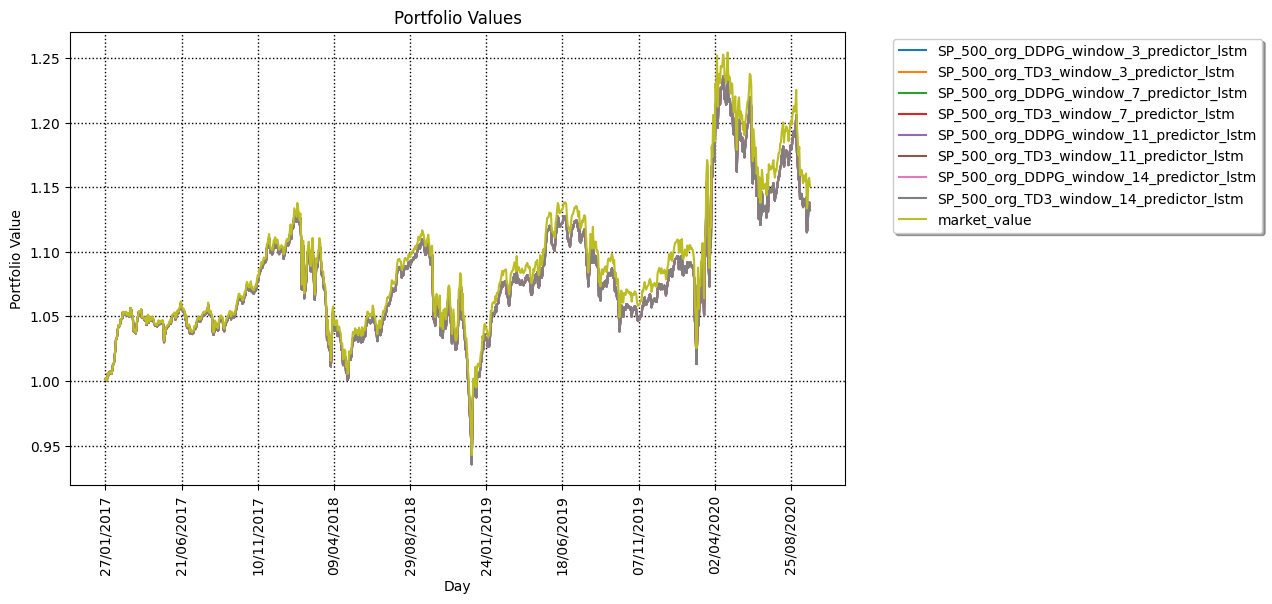

<Figure size 432x288 with 0 Axes>

In [ ]:
log_y = False
df = pd.DataFrame()
dates = extract_from_infos(info_list, 'date')
df["Date"] = dates
df.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6), dpi=100)
if log_y:
    plt.title('Portfolio Values (LOG Y)')
    plt.ylabel('Portfolio Value (LOG Y)')
else:
    plt.title('Portfolio Values')
    plt.ylabel('Portfolio Value')
plt.xlabel('Day')
for i in range(len(full_model_names)):
    df[full_model_names[i]] = portfolio_values_list[i]
    plt.plot(df[full_model_names[i]], label=full_model_names[i])
df['market_value'] = extract_from_infos(info_list, 'market_value')
plt.plot(df['market_value'], label='market_value')
if log_y:
    plt.yscale('log')
plt.xticks(np.arange(0, len(dates), 100))
plt.xticks(rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(1.30, 1), shadow=True, ncol=1)
plt.grid(color='black', linestyle=':', linewidth=1)
plt.show()
plt.savefig("/content/stat_results/{}/plot.jpg".format(dataset_name))

In [ ]:
# RESULT
df = pd.DataFrame(columns=['Portfolio', 'Average Daily Yield (%)', 'Sharpe Ratio (%)', 'Sortino Ratio (%)', 'Maximum Drawdown (%)',
                           'Final Portfolio Value'])
for i in range(len(full_model_names)):
    df = results_table_row(df, full_model_names[i],
                           returns_from_cumulative(portfolio_values_list[i]),
                           portfolio_values_list[i])
# Market
df = results_table_row(df, 'market_value',
                           returns_from_cumulative(extract_from_infos(info_list, 'market_value')),
                           extract_from_infos(info_list, 'market_value'))
df.to_csv("/content/stat_results/{}/results.csv".format(dataset_name))

In [ ]:
df

Portfolio  Average Daily Yield (%)  \
0   SP_500_org_DDPG_window_3_predictor_lstm                   0.0166   
1    SP_500_org_TD3_window_3_predictor_lstm                   0.0166   
2   SP_500_org_DDPG_window_7_predictor_lstm                   0.0166   
3    SP_500_org_TD3_window_7_predictor_lstm                   0.0166   
4  SP_500_org_DDPG_window_11_predictor_lstm                   0.0166   
5   SP_500_org_TD3_window_11_predictor_lstm                   0.0166   
6  SP_500_org_DDPG_window_14_predictor_lstm                   0.0166   
7   SP_500_org_TD3_window_14_predictor_lstm                   0.0166   
8                              market_value                   0.0183   

   Sharpe Ratio (%)  Sortino Ratio (%)  Maximum Drawdown (%)  \
0            2.0447             2.4722               17.5057   
1            2.0448             2.4722               17.5056   
2            2.0447             2.4722               17.5057   
3            2.0448             2.4722               17.5057   
4            2.0447             2.4721               17.5058   
5            2.0448             2.4722               17.5057   
6            2.0447             2.4722               17.5057   
7            2.0447             2.4721               17.5058   
8            2.2627             2.7353               17.1644   

   Final Portfolio Value  
0                  1.132  
1                  1.132  
2                  1.132  
3                  1.132  
4                  1.132  
5                  1.132  
6                  1.132  
7                  1.132  
8                  1.151

In [ ]:
# Stock History
dataset_name = 'SP_500_test'
history, assets, date_list = read_stock_history(filepath='/content/data/{}.h5'.format(dataset_name))
history = history[:, :, :4]
nb_classes = len(history) + 1
print("Training Dataset: {}".format(dataset_name))
print("Assets: {}".format(assets))
print("Stock History Shape: {}".format(history.shape))
print("Full Stock History Date Range: {} -> {}".format(date_list[0], date_list[-1]))
full_length = len(date_list)
train_test_ratio = 6.37/10
train_start_date = date_list[14]
train_end_date = date_list[(int)(full_length * train_test_ratio)-1]
test_start_date = date_list[(int)(full_length * train_test_ratio)]
test_end_date = date_list[full_length-2]
print("Training Date Range: {} -> {} ({} Steps)".format(train_start_date, train_end_date, 
                                                    (int)(date_list.index(train_end_date) - date_list.index(train_start_date))))
print("Testing Date Range: {} -> {} ({} Steps)".format(test_start_date, test_end_date, 
                                                    (int)(date_list.index(test_end_date) - date_list.index(test_start_date))))
framework_lst = ['DDPG']
window_length_lst = [3,7]
predictor_type_lst = ['lstm']
technical_indicators_flag = False
models = []
model_names = []
ti_dict=[]
use_batch_norm = True
action_bound = 1.
log_return = True


Training Dataset: SP_500_test
Assets: ['C', 'PNW', 'TGT', 'CPB', 'OXY', 'NRG', 'AMZN', 'CMA', 'CSX', 'PPL', 'DVA', 'BA', 'WELL', 'BEN', 'COF', 'PSA', 'TROW', 'HAS', 'MCHP', 'AMAT', 'TAP', 'AXP', 'ORLY', 'A', 'IPG']
Stock History Shape: (25, 2560, 4)
Full Stock History Date Range: 02/08/2010 -> 30/09/2020
Training Date Range: 20/08/2010 -> 20/01/2017 (1615 Steps)
Testing Date Range: 23/01/2017 -> 29/09/2020 (928 Steps)


In [ ]:
# instantiate environment
dataset_name = 'SP_500_org'

for framework in framework_lst:
    for window_length in window_length_lst:
        for predictor_type in predictor_type_lst:
            if technical_indicators_flag:
                name = '{}_{}_window_{}_predictor_{}_rmr-pred'.format(dataset_name, framework, window_length, predictor_type)
            else:
                name = '{}_{}_window_{}_predictor_{}'.format(dataset_name, framework, window_length, predictor_type)
            model_names.append(name)
            tf.reset_default_graph()
            sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, \
                  log_device_placement=True))
            tflearn.config.init_training_mode()
            action_dim = [nb_classes]
            if technical_indicators_flag:
                technical_indicator_history = ti_dict[window_length]
                state_dim = [nb_classes, window_length+technical_indicator_history.shape[2]]
            else:
                state_dim = [nb_classes, window_length]

            variable_scope = get_variable_scope(dataset_name, framework, window_length, predictor_type, 
                                                use_batch_norm, technical_indicators_flag)

            with tf.variable_scope(variable_scope):

                if(framework == 'DDPG'):
                    actor = StockActor(sess, state_dim, action_dim, action_bound, 1e-4, model_tau, model_batch_size, 
                                       predictor_type, use_batch_norm)
                    critic = StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                             learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(), 
                             predictor_type=predictor_type, use_batch_norm=use_batch_norm)
                    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

                    model_save_path = get_model_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)
                    summary_path = get_result_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)

                    ddpg_model = DDPG(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                                      log_return=log_return, config_file='', 
                                      model_save_path=model_save_path, summary_path=summary_path)
                    ddpg_model.initialize(load_weights=True, verbose=True)
                    models.append(ddpg_model)

                elif(framework == 'TD3'):
                    actor = TD3StockActor(sess, state_dim, action_dim, action_bound, 1e-4, model_tau, model_batch_size, 
                                          predictor_type, use_batch_norm)
                    critic = TD3StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                             learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(),
                             predictor_type=predictor_type, use_batch_norm=use_batch_norm,
                               inp_actions=actor.scaled_out)
                    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

                    model_save_path = get_model_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)
                    summary_path = get_result_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)

                    td3_model = TD3(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer, 
                                    log_return=log_return, config_file='', 
                                    model_save_path=model_save_path, summary_path=summary_path)
                    td3_model.initialize(load_weights=True, verbose=True)
                    models.append(td3_model)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0

INFO:tensorflow:Restoring parameters from /content/weights/SP_500_org/DDPG/lstm/window_3/batch_norm/checkpoint.ckpt
Loading is_training:0 from checkpoint. Name: is_training
Loading SP_500_org_DDPG_lstm_window_3_batch_norm/LSTM/SP_500_org_DDPG_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Linear/Matrix:0 from checkpoint. Name: SP_500_org_DDPG_lstm_window_3_batch_norm/LSTM/SP_500_org_DDPG_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Linear/Matrix
Loading SP_500_org_DDPG_lstm_window_3_batch_norm/LSTM/SP_500_org_DDPG_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Linear/Bias:0 from checkpoint. Name: SP_500_org_DDPG_lstm_window_3_batch_norm/LSTM/SP_500_org_DDPG_lstm_window_3_batch_norm/LSTM/BasicLS

In [ ]:
dataset_name = 'SP_500_test'

model_names

['SP_500_org_DDPG_window_3_predictor_lstm',
 'SP_500_org_DDPG_window_7_predictor_lstm']

In [ ]:
# model_names = model_names[0]
# model_names

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


<Figure size 432x288 with 0 Axes>

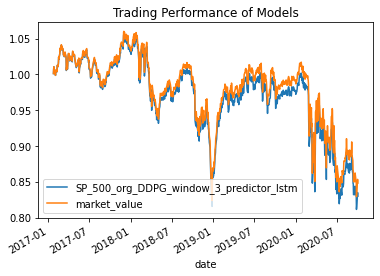

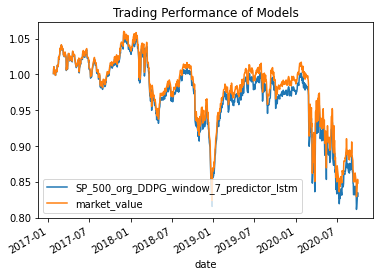

In [ ]:
# Compiled Results
full_model_names = []
full_models = []
portfolio_values_list = [] 

for window_length in window_length_lst:
    model_names_subset = []
    models_subset = []
    for i in range(len(model_names)):
        if 'window_{}'.format(window_length) in model_names[i]:
            model_names_subset.append(model_names[i])
            models_subset.append(models[i])
            
    if technical_indicators_flag:
        env = MultiActionPortfolioEnv(history, assets, model_names_subset, date_list, start_date=test_start_date, 
                              end_date=test_end_date, window_length=window_length, 
                                  technical_indicators_flag=technical_indicators_flag, 
                                  technical_indicator_history=ti_dict[window_length])
    else:
        env = MultiActionPortfolioEnv(history, assets, model_names_subset, date_list, start_date=test_start_date, 
                              end_date=test_end_date, window_length=window_length)

    _, info_list, _, _ = test_model_multiple(env, models_subset)
    
    # Add to results
    for i in range(len(model_names_subset)):
        full_model_names.append(model_names_subset[i].replace('SP_500_org', dataset_name))
        full_models.append(models_subset[i])     
        portfolio_values_list.append(extract_from_infos(info_list, model_names_subset[i]))

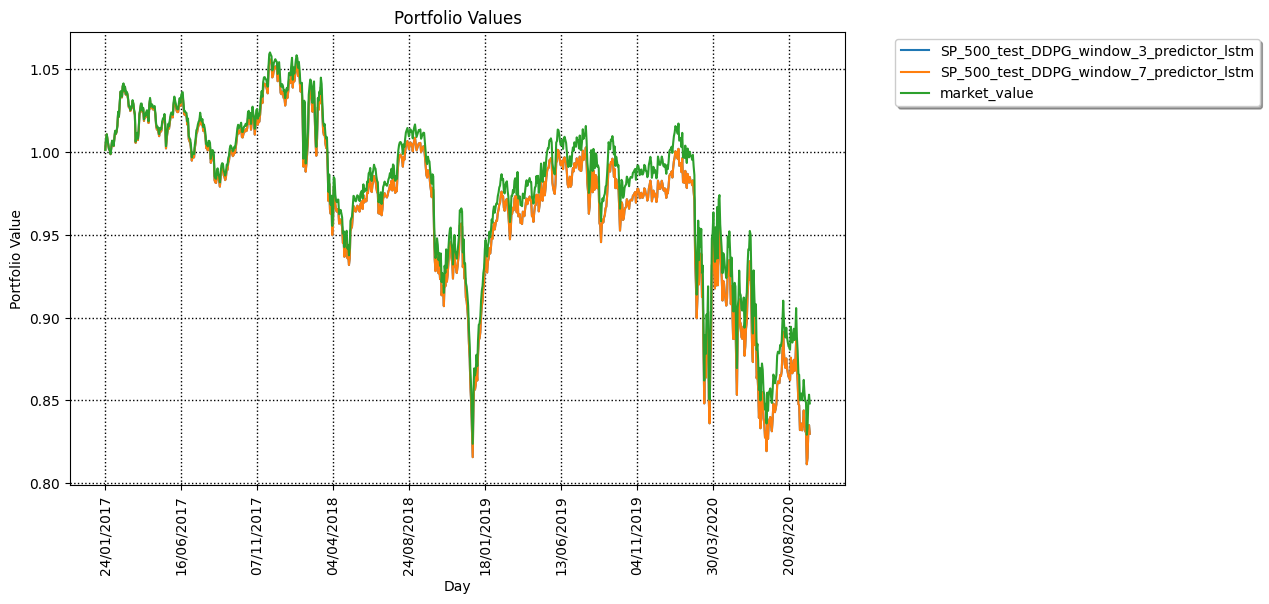

FileNotFoundError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
log_y = False
df = pd.DataFrame()
dates = extract_from_infos(info_list, 'date')
df["Date"] = dates
df.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6), dpi=100)
if log_y:
    plt.title('Portfolio Values (LOG Y)')
    plt.ylabel('Portfolio Value (LOG Y)')
else:
    plt.title('Portfolio Values')
    plt.ylabel('Portfolio Value')
plt.xlabel('Day')
for i in range(len(full_model_names)):
    df[full_model_names[i]] = portfolio_values_list[i]
    plt.plot(df[full_model_names[i]], label=full_model_names[i])
df['market_value'] = extract_from_infos(info_list, 'market_value')
plt.plot(df['market_value'], label='market_value')
if log_y:
    plt.yscale('log')
plt.xticks(np.arange(0, len(dates), 100))
plt.xticks(rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(1.30, 1), shadow=True, ncol=1)
plt.grid(color='black', linestyle=':', linewidth=1)
plt.show()
plt.savefig("/content/stat_results/{}/plot.jpg".format(dataset_name))

In [ ]:
# RESULT
df = pd.DataFrame(columns=['Portfolio', 'Average Daily Yield (%)', 'Sharpe Ratio (%)', 'Sortino Ratio (%)', 'Maximum Drawdown (%)',
                           'Final Portfolio Value'])
for i in range(len(full_model_names)):
    df = results_table_row(df, full_model_names[i],
                           returns_from_cumulative(portfolio_values_list[i]),
                           portfolio_values_list[i])
# Market
df = results_table_row(df, 'market_value',
                           returns_from_cumulative(extract_from_infos(info_list, 'market_value')),
                           extract_from_infos(info_list, 'market_value'))
df.to_csv("/content/stat_results/{}/results.csv".format(dataset_name))

FileNotFoundError: ignored

In [ ]:
df

Portfolio  Average Daily Yield (%)  \
0  SP_500_test_DDPG_window_3_predictor_lstm                  -0.0160   
1  SP_500_test_DDPG_window_7_predictor_lstm                  -0.0160   
2                              market_value                  -0.0137   

   Sharpe Ratio (%)  Sortino Ratio (%)  Maximum Drawdown (%)  \
0           -1.7527            -2.2229               23.1749   
1           -1.7527            -2.2229               23.1751   
2           -1.4957            -1.8983               22.3118   

   Final Portfolio Value  
0                  0.830  
1                  0.830  
2                  0.848

In [ ]:
# Stock History
dataset_name = 'NYSE_T2'
history, assets, date_list = read_stock_history(filepath='/content/data/{}.h5'.format(dataset_name))
history = history[:, :, :4]
nb_classes = len(history) + 1
print("Training Dataset: {}".format(dataset_name))
print("Assets: {}".format(assets))
print("Stock History Shape: {}".format(history.shape))
print("Full Stock History Date Range: {} -> {}".format(date_list[0], date_list[-1]))
full_length = len(date_list)
train_test_ratio = 0.175/10
train_start_date = date_list[14]
train_end_date = date_list[(int)(full_length * train_test_ratio)-1]
test_start_date = date_list[(int)(full_length * train_test_ratio)]
test_end_date = date_list[full_length-2]
print("Training Date Range: {} -> {} ({} Steps)".format(train_start_date, train_end_date, 
                                                    (int)(date_list.index(train_end_date) - date_list.index(train_start_date))))
print("Testing Date Range: {} -> {} ({} Steps)".format(test_start_date, test_end_date, 
                                                    (int)(date_list.index(test_end_date) - date_list.index(test_start_date))))
framework_lst = ['DDPG','TD3']
window_length_lst = [3,7,11,14]
predictor_type_lst = ['lstm']
technical_indicators_flag = False
models = []
model_names = []
ti_dict=[]
use_batch_norm = True
action_bound = 1.
log_return = True


Training Dataset: NYSE_T2
Assets: ['BRK-A', 'BX', 'MRVL', 'MELI', 'PANW', 'SQ', 'EPD', 'KDP', 'VMW', 'WDAY', 'LULU', 'STZ-B', 'DELL', 'APO', 'ET', 'LNG', 'KKR', 'MPLX', 'BATRA', 'BATRK', 'FWONA', 'FWONK', 'LSXMA', 'LSXMB', 'LSXMK']
Stock History Shape: (25, 951, 4)
Full Stock History Date Range: 20/12/2016 -> 30/09/2020
Training Date Range: 11/01/2017 -> 12/01/2017 (1 Steps)
Testing Date Range: 13/01/2017 -> 29/09/2020 (933 Steps)


Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0

INFO:tensorflow:Restoring parameters from /content/weights/SP_500_org/DDPG/lstm/window_3/batch_norm/checkpoint.ckpt
Loading is_training:0 from checkpoint. Name: is_training
Loading SP_500_org_DDPG_lstm_window_3_batch_norm/LSTM/SP_500_org_DDPG_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Linear/Matrix:0 from checkpoint. Name: SP_500_org_DDPG_lstm_window_3_batch_norm/LSTM/SP_500_org_DDPG_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Linear/Matrix
Loading SP_500_org_DDPG_lstm_window_3_batch_norm/LSTM/SP_500_org_DDPG_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Linear/Bias:0 from checkpoint. Name: SP_500_org_DDPG_lstm_window_3_batch_norm/LSTM/SP_500_org_DDPG_lstm_window_3_batch_norm/LSTM/BasicLS

In [ ]:
dataset_name = 'NYSETestOrgSet'

model_names

['SP_500_org_DDPG_window_3_predictor_lstm',
 'SP_500_org_DDPG_window_7_predictor_lstm',
 'SP_500_org_DDPG_window_11_predictor_lstm',
 'SP_500_org_DDPG_window_14_predictor_lstm',
 'SP_500_org_TD3_window_3_predictor_lstm',
 'SP_500_org_TD3_window_7_predictor_lstm',
 'SP_500_org_TD3_window_11_predictor_lstm',
 'SP_500_org_TD3_window_14_predictor_lstm']

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


<Figure size 432x288 with 0 Axes>

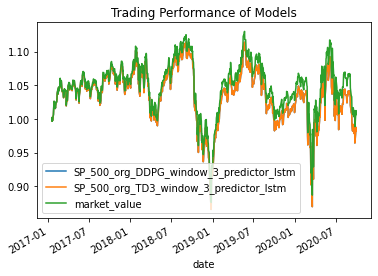

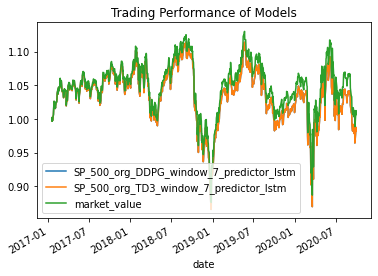

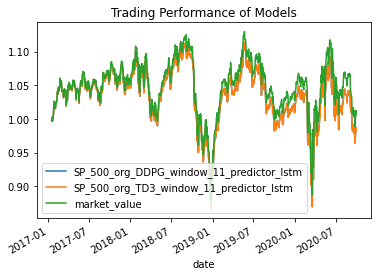

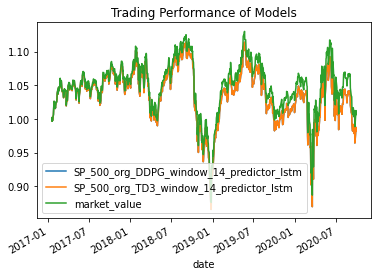

In [ ]:
# Compiled Results
full_model_names = []
full_models = []
portfolio_values_list = [] 

for window_length in window_length_lst:
    model_names_subset = []
    models_subset = []
    for i in range(len(model_names)):
        if 'window_{}'.format(window_length) in model_names[i]:
            model_names_subset.append(model_names[i])
            models_subset.append(models[i])
            
    if technical_indicators_flag:
        env = MultiActionPortfolioEnv(history, assets, model_names_subset, date_list, start_date=test_start_date, 
                              end_date=test_end_date, window_length=window_length, 
                                  technical_indicators_flag=technical_indicators_flag, 
                                  technical_indicator_history=ti_dict[window_length])
    else:
        env = MultiActionPortfolioEnv(history, assets, model_names_subset, date_list, start_date=test_start_date, 
                              end_date=test_end_date, window_length=window_length)

    _, info_list, _, _ = test_model_multiple(env, models_subset)
    
    # Add to results
    for i in range(len(model_names_subset)):
        full_model_names.append(model_names_subset[i].replace('SP_500_org', dataset_name))
        full_models.append(models_subset[i])     
        portfolio_values_list.append(extract_from_infos(info_list, model_names_subset[i]))

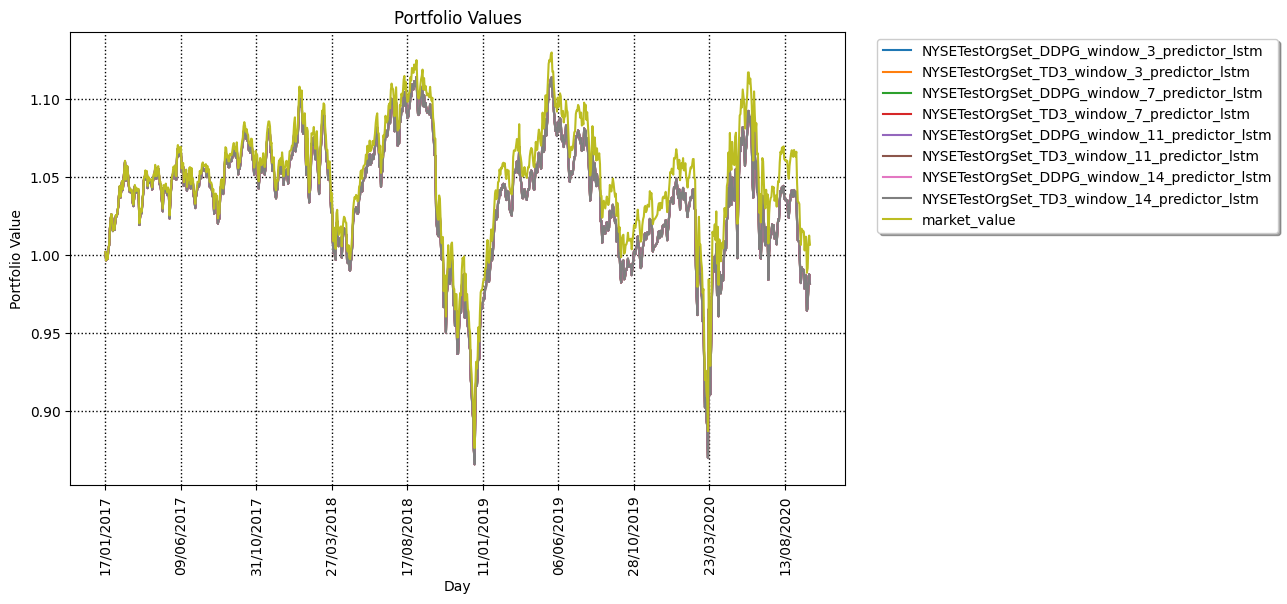

<Figure size 432x288 with 0 Axes>

In [ ]:
log_y = False
df = pd.DataFrame()
dates = extract_from_infos(info_list, 'date')
df["Date"] = dates
df.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6), dpi=100)
if log_y:
    plt.title('Portfolio Values (LOG Y)')
    plt.ylabel('Portfolio Value (LOG Y)')
else:
    plt.title('Portfolio Values')
    plt.ylabel('Portfolio Value')
plt.xlabel('Day')
for i in range(len(full_model_names)):
    df[full_model_names[i]] = portfolio_values_list[i]
    plt.plot(df[full_model_names[i]], label=full_model_names[i])
df['market_value'] = extract_from_infos(info_list, 'market_value')
plt.plot(df['market_value'], label='market_value')
if log_y:
    plt.yscale('log')
plt.xticks(np.arange(0, len(dates), 100))
plt.xticks(rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(1.30, 1), shadow=True, ncol=1)
plt.grid(color='black', linestyle=':', linewidth=1)
plt.show()
plt.savefig("/content/stat_results/{}/plot.jpg".format(dataset_name))

In [ ]:
# RESULT
df = pd.DataFrame(columns=['Portfolio', 'Average Daily Yield (%)', 'Sharpe Ratio (%)', 'Sortino Ratio (%)', 'Maximum Drawdown (%)',
                           'Final Portfolio Value'])
for i in range(len(full_model_names)):
    df = results_table_row(df, full_model_names[i],
                           returns_from_cumulative(portfolio_values_list[i]),
                           portfolio_values_list[i])
# Market
df = results_table_row(df, 'market_value',
                           returns_from_cumulative(extract_from_infos(info_list, 'market_value')),
                           extract_from_infos(info_list, 'market_value'))
df.to_csv("/content/stat_results/{}/results.csv".format(dataset_name))

In [ ]:
df

Portfolio  Average Daily Yield (%)  \
0   NYSETestOrgSet_DDPG_window_3_predictor_lstm                   0.0025   
1    NYSETestOrgSet_TD3_window_3_predictor_lstm                   0.0025   
2   NYSETestOrgSet_DDPG_window_7_predictor_lstm                   0.0025   
3    NYSETestOrgSet_TD3_window_7_predictor_lstm                   0.0025   
4  NYSETestOrgSet_DDPG_window_11_predictor_lstm                   0.0025   
5   NYSETestOrgSet_TD3_window_11_predictor_lstm                   0.0025   
6  NYSETestOrgSet_DDPG_window_14_predictor_lstm                   0.0025   
7   NYSETestOrgSet_TD3_window_14_predictor_lstm                   0.0025   
8                                  market_value                   0.0052   

   Sharpe Ratio (%)  Sortino Ratio (%)  Maximum Drawdown (%)  \
0            0.2557             0.3572               22.3235   
1            0.2557             0.3571               22.3235   
2            0.2557             0.3571               22.3236   
3            0.2557             0.3571               22.3236   
4            0.2557             0.3571               22.3235   
5            0.2557             0.3571               22.3236   
6            0.2557             0.3571               22.3235   
7            0.2557             0.3571               22.3235   
8            0.5322             0.7441               22.1427   

   Final Portfolio Value  
0                  0.982  
1                  0.982  
2                  0.982  
3                  0.982  
4                  0.982  
5                  0.982  
6                  0.982  
7                  0.982  
8                  1.007

In [ ]:
# Stock History
dataset_name = 'SP_500'
history, assets, date_list = read_stock_history(filepath='/content/data/{}.h5'.format(dataset_name))
history = history[:, :, :4]
nb_classes = len(history) + 1
print("Training Dataset: {}".format(dataset_name))
print("Assets: {}".format(assets))
print("Stock History Shape: {}".format(history.shape))
print("Full Stock History Date Range: {} -> {}".format(date_list[0], date_list[-1]))
full_length = len(date_list)
train_test_ratio = 6/7
train_start_date = date_list[14]
train_end_date = date_list[(int)(full_length * train_test_ratio)-1]
test_start_date = date_list[(int)(full_length * train_test_ratio)]
test_end_date = date_list[full_length-2]
print("Training Date Range: {} -> {} ({} Steps)".format(train_start_date, train_end_date, 
                                                    (int)(date_list.index(train_end_date) - date_list.index(train_start_date))))
print("Testing Date Range: {} -> {} ({} Steps)".format(test_start_date, test_end_date, 
                                                    (int)(date_list.index(test_end_date) - date_list.index(test_start_date))))
framework_lst = ['DDPG','TD3']
window_length_lst = [3,7,11,14]
predictor_type_lst = ['lstm']
technical_indicators_flag = False
models = []
model_names = []
ti_dict=[]
use_batch_norm = True
action_bound = 1.
log_return = True


Training Dataset: SP_500
Assets: ['TAP', 'PAYX', 'NKE', 'DOV', 'CAT', 'TXN', 'KLAC', 'COP', 'LLY', 'DTE', 'CPB', 'HES', 'MCD', 'WAT', 'SHW', 'MSI', 'PCAR', 'HAL', 'LUV', 'HD', 'PEP', 'EMR', 'WBA', 'DHR', 'ROK', 'CSCO', 'AAPL', 'BMY', 'EXC', 'GWW', 'IBM', 'SWK', 'AIG', 'FCX', 'AMD', 'CSX', 'HAS', 'RTX', 'CAG', 'HIG', 'BBWI', 'XOM', 'PHM', 'GLW', 'KMB', 'DUK', 'MU', 'HSY', 'ECL', 'SYY', 'LIN', 'KR', 'NSC', 'PPG', 'STT', 'MO', 'ITW', 'WFC', 'VLO', 'AEP', 'BAX', 'AVY', 'MS', 'HON', 'EMN', 'NOC', 'BEN', 'WMB', 'USB', 'GE', 'BLL', 'QCOM', 'NEE', 'JPM', 'CNP', 'PKI', 'CL', 'PFE', 'IFF', 'UNP', 'GD', 'CMI', 'OMC', 'IP', 'AMGN', 'ETN', 'TGT', 'ADP', 'OXY', 'MDT', 'UNH', 'K', 'LMT', 'LNC', 'CI', 'WMT', 'MMC', 'ADM', 'D', 'VZ', 'T', 'MAS', 'NUE', 'MCO', 'HUM', 'MSFT', 'SNA', 'NWL', 'AXP', 'CVS', 'INTC', 'KEY', 'MRK', 'GIS', 'TXT', 'WHR', 'BDX', 'PEG', 'BAC', 'DRI', 'GL', 'NI', 'PNC', 'ED', 'FDX', 'SO', 'NTRS', 'TJX', 'HPQ', 'L', 'PPL', 'CVX', 'SEE', 'MCK', 'NEM', 'WY', 'FITB', 'MRO', 'XEL', 'HBAN

In [ ]:
# instantiate environment
dataset_name = 'SP_500'

for framework in framework_lst:
    for window_length in window_length_lst:
        for predictor_type in predictor_type_lst:
            if technical_indicators_flag:
                name = '{}_{}_window_{}_predictor_{}_rmr-pred'.format(dataset_name, framework, window_length, predictor_type)
            else:
                name = '{}_{}_window_{}_predictor_{}'.format(dataset_name, framework, window_length, predictor_type)
            model_names.append(name)
            tf.reset_default_graph()
            sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, \
                  log_device_placement=True))
            tflearn.config.init_training_mode()
            action_dim = [nb_classes]
            if technical_indicators_flag:
                technical_indicator_history = ti_dict[window_length]
                state_dim = [nb_classes, window_length+technical_indicator_history.shape[2]]
            else:
                state_dim = [nb_classes, window_length]

            variable_scope = get_variable_scope(dataset_name, framework, window_length, predictor_type, 
                                                use_batch_norm, technical_indicators_flag)

            with tf.variable_scope(variable_scope):

                if(framework == 'DDPG'):
                    actor = StockActor(sess, state_dim, action_dim, action_bound, 1e-4, model_tau, model_batch_size, 
                                       predictor_type, use_batch_norm)
                    critic = StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                             learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(), 
                             predictor_type=predictor_type, use_batch_norm=use_batch_norm)
                    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

                    model_save_path = get_model_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)
                    summary_path = get_result_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)

                    ddpg_model = DDPG(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                                      log_return=log_return, config_file='', 
                                      model_save_path=model_save_path, summary_path=summary_path)
                    ddpg_model.initialize(load_weights=True, verbose=True)
                    models.append(ddpg_model)

                elif(framework == 'TD3'):
                    actor = TD3StockActor(sess, state_dim, action_dim, action_bound, 1e-4, model_tau, model_batch_size, 
                                          predictor_type, use_batch_norm)
                    critic = TD3StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                             learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(),
                             predictor_type=predictor_type, use_batch_norm=use_batch_norm,
                               inp_actions=actor.scaled_out)
                    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

                    model_save_path = get_model_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)
                    summary_path = get_result_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)

                    td3_model = TD3(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer, 
                                    log_return=log_return, config_file='', 
                                    model_save_path=model_save_path, summary_path=summary_path)
                    td3_model.initialize(load_weights=True, verbose=True)
                    models.append(td3_model)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0

INFO:tensorflow:Restoring parameters from /content/weights/SP_500/DDPG/lstm/window_3/batch_norm/checkpoint.ckpt
Loading is_training:0 from checkpoint. Name: is_training
Loading SP_500_DDPG_lstm_window_3_batch_norm/LSTM/SP_500_DDPG_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Linear/Matrix:0 from checkpoint. Name: SP_500_DDPG_lstm_window_3_batch_norm/LSTM/SP_500_DDPG_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Linear/Matrix
Loading SP_500_DDPG_lstm_window_3_batch_norm/LSTM/SP_500_DDPG_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Linear/Bias:0 from checkpoint. Name: SP_500_DDPG_lstm_window_3_batch_norm/LSTM/SP_500_DDPG_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Linear/Bias
Loading SP_500_DD

In [ ]:
dataset_name = 'SP500Assets'

model_names

['SP_500_DDPG_window_3_predictor_lstm',
 'SP_500_DDPG_window_7_predictor_lstm',
 'SP_500_DDPG_window_11_predictor_lstm',
 'SP_500_DDPG_window_14_predictor_lstm',
 'SP_500_TD3_window_3_predictor_lstm',
 'SP_500_TD3_window_7_predictor_lstm',
 'SP_500_TD3_window_11_predictor_lstm',
 'SP_500_TD3_window_14_predictor_lstm']

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


<Figure size 432x288 with 0 Axes>

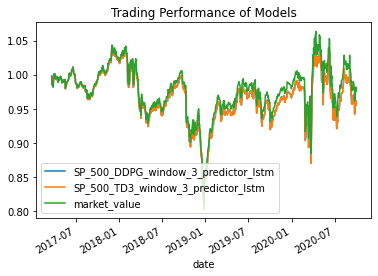

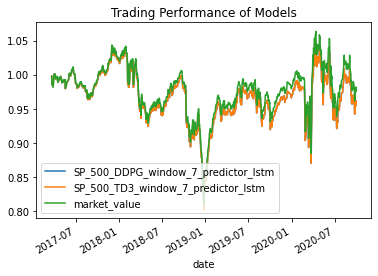

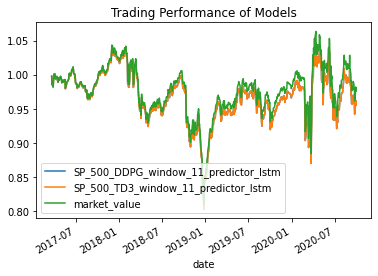

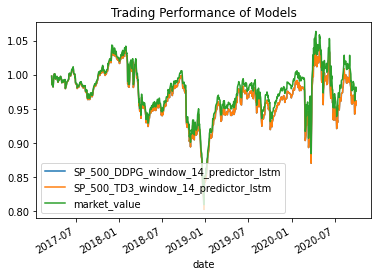

In [ ]:
# Compiled Results
full_model_names = []
full_models = []
portfolio_values_list = [] 

for window_length in window_length_lst:
    model_names_subset = []
    models_subset = []
    for i in range(len(model_names)):
        if 'window_{}'.format(window_length) in model_names[i]:
            model_names_subset.append(model_names[i])
            models_subset.append(models[i])
            
    if technical_indicators_flag:
        env = MultiActionPortfolioEnv(history, assets, model_names_subset, date_list, start_date=test_start_date, 
                              end_date=test_end_date, window_length=window_length, 
                                  technical_indicators_flag=technical_indicators_flag, 
                                  technical_indicator_history=ti_dict[window_length])
    else:
        env = MultiActionPortfolioEnv(history, assets, model_names_subset, date_list, start_date=test_start_date, 
                              end_date=test_end_date, window_length=window_length)

    _, info_list, _, _ = test_model_multiple(env, models_subset)
    
    # Add to results
    for i in range(len(model_names_subset)):
        full_model_names.append(model_names_subset[i].replace('SP_500', dataset_name))
        full_models.append(models_subset[i])     
        portfolio_values_list.append(extract_from_infos(info_list, model_names_subset[i]))

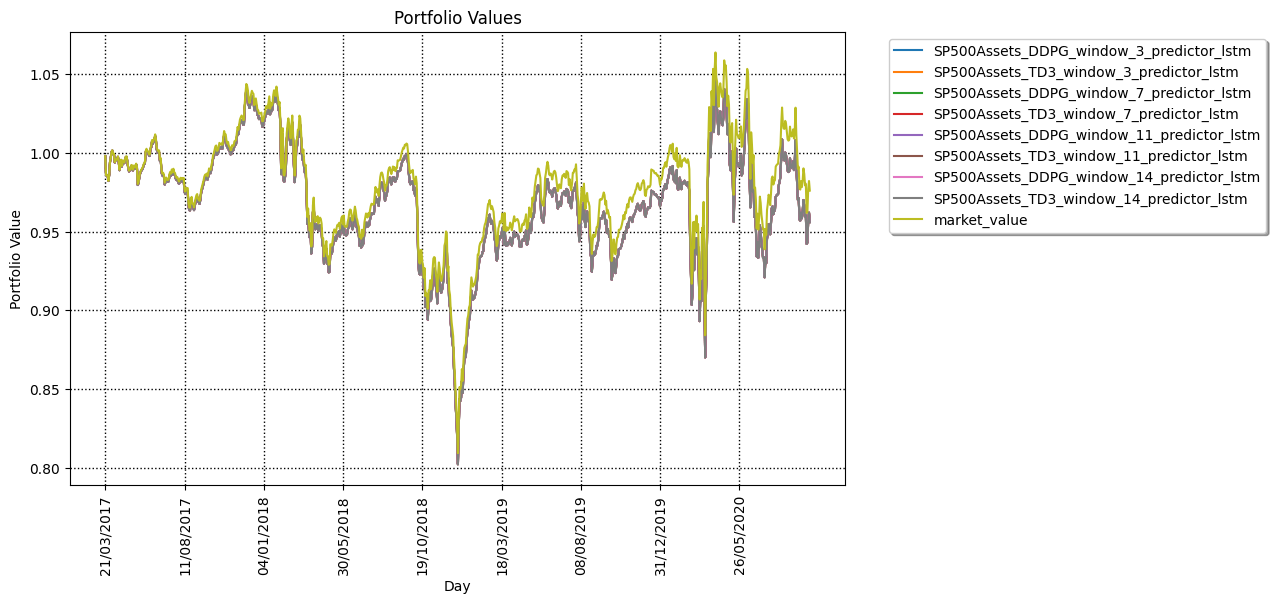

<Figure size 432x288 with 0 Axes>

In [ ]:
log_y = False
df = pd.DataFrame()
dates = extract_from_infos(info_list, 'date')
df["Date"] = dates
df.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6), dpi=100)
if log_y:
    plt.title('Portfolio Values (LOG Y)')
    plt.ylabel('Portfolio Value (LOG Y)')
else:
    plt.title('Portfolio Values')
    plt.ylabel('Portfolio Value')
plt.xlabel('Day')
for i in range(len(full_model_names)):
    df[full_model_names[i]] = portfolio_values_list[i]
    plt.plot(df[full_model_names[i]], label=full_model_names[i])
df['market_value'] = extract_from_infos(info_list, 'market_value')
plt.plot(df['market_value'], label='market_value')
if log_y:
    plt.yscale('log')
plt.xticks(np.arange(0, len(dates), 100))
plt.xticks(rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(1.30, 1), shadow=True, ncol=1)
plt.grid(color='black', linestyle=':', linewidth=1)
plt.show()
plt.savefig("/content/stat_results/{}/plot.jpg".format(dataset_name))

In [ ]:
# RESULT
df = pd.DataFrame(columns=['Portfolio', 'Average Daily Yield (%)', 'Sharpe Ratio (%)', 'Sortino Ratio (%)', 'Maximum Drawdown (%)',
                           'Final Portfolio Value'])
for i in range(len(full_model_names)):
    df = results_table_row(df, full_model_names[i],
                           returns_from_cumulative(portfolio_values_list[i]),
                           portfolio_values_list[i])
# Market
df = results_table_row(df, 'market_value',
                           returns_from_cumulative(extract_from_infos(info_list, 'market_value')),
                           extract_from_infos(info_list, 'market_value'))
df.to_csv("/content/stat_results/{}/results.csv".format(dataset_name))

In [ ]:
df

Portfolio  Average Daily Yield (%)  \
0   SP500Assets_DDPG_window_3_predictor_lstm                  -0.0017   
1    SP500Assets_TD3_window_3_predictor_lstm                  -0.0017   
2   SP500Assets_DDPG_window_7_predictor_lstm                  -0.0017   
3    SP500Assets_TD3_window_7_predictor_lstm                  -0.0017   
4  SP500Assets_DDPG_window_11_predictor_lstm                  -0.0017   
5   SP500Assets_TD3_window_11_predictor_lstm                  -0.0017   
6  SP500Assets_DDPG_window_14_predictor_lstm                  -0.0017   
7   SP500Assets_TD3_window_14_predictor_lstm                  -0.0017   
8                               market_value                   0.0006   

   Sharpe Ratio (%)  Sortino Ratio (%)  Maximum Drawdown (%)  \
0           -0.2213            -0.2686               22.8883   
1           -0.2212            -0.2685               22.8881   
2           -0.2213            -0.2685               22.8881   
3           -0.2212            -0.2684               22.8880   
4           -0.2213            -0.2685               22.8883   
5           -0.2212            -0.2685               22.8880   
6           -0.2212            -0.2685               22.8881   
7           -0.2212            -0.2685               22.8882   
8            0.0751             0.0912               22.4434   

   Final Portfolio Value  
0                  0.956  
1                  0.956  
2                  0.956  
3                  0.956  
4                  0.956  
5                  0.956  
6                  0.956  
7                  0.956  
8                  0.976

In [ ]:
# Stock History
dataset_name = 'NYSE_T1'
history, assets, date_list = read_stock_history(filepath='/content/data/{}.h5'.format(dataset_name))
history = history[:, :, :4]
nb_classes = len(history) + 1
print("Training Dataset: {}".format(dataset_name))
print("Assets: {}".format(assets))
print("Stock History Shape: {}".format(history.shape))
print("Full Stock History Date Range: {} -> {}".format(date_list[0], date_list[-1]))
full_length = len(date_list)
train_test_ratio = 0.175/10
train_start_date = date_list[14]
train_end_date = date_list[(int)(full_length * train_test_ratio)-1]
test_start_date = date_list[(int)(full_length * train_test_ratio)]
test_end_date = date_list[full_length-2]
print("Training Date Range: {} -> {} ({} Steps)".format(train_start_date, train_end_date, 
                                                    (int)(date_list.index(train_end_date) - date_list.index(train_start_date))))
print("Testing Date Range: {} -> {} ({} Steps)".format(test_start_date, test_end_date, 
                                                    (int)(date_list.index(test_end_date) - date_list.index(test_start_date))))
framework_lst = ['DDPG','TD3']
window_length_lst = [3,7,11,14]
predictor_type_lst = ['lstm']
technical_indicators_flag = False
models = []
model_names = []
ti_dict=[]
use_batch_norm = True
action_bound = 1.
log_return = True


Training Dataset: NYSE_T1
Assets: ['BRK-A', 'BX', 'MRVL', 'MELI', 'PANW', 'SQ', 'EPD', 'KDP', 'VMW', 'WDAY', 'LULU', 'STZ-B', 'DELL', 'APO', 'ET', 'LNG', 'KKR', 'MPLX', 'BATRA', 'BATRK', 'FWONA', 'FWONK', 'LSXMA', 'LSXMB', 'LSXMK', 'TTD', 'BF-A', 'PCG', 'VEEV', 'TWLO', 'ON', 'CQP', 'CSGP', 'SIRI', 'SGEN', 'MKC-V', 'LEN-B', 'HZNP', 'HUBS', 'LBRDA', 'LBRDK', 'CLR', 'SPLK', 'SUI', 'MKL', 'TRU', 'ALNY', 'SSNC', 'HEI', 'HEI-A', 'ENTG', 'ACGL', 'PODD', 'AGR', 'UI', 'CPT', 'NUAN', 'TRGP', 'BIO-B', 'AA', 'CLF', 'CG', 'PLUG', 'WLK', 'STLD', 'CCK', 'WPC', 'BG', 'IEP', 'LPLA', 'ALLY', 'ZEN', 'ELS', 'BMRN', 'WOLF', 'GDDY', 'AMH', 'FNF', 'OVV', 'CAR', 'LBTYA', 'LBTYB', 'LBTYK', 'ARES', 'CAC', 'CGNX', 'CNA', 'AMC', 'WTRG', 'DISCB', 'CSL', 'DAR', 'EQT', 'Z', 'ZG', 'MPW', 'GME', 'BURL', 'FHN', 'AFG', 'FICO', 'EXAS', 'REXR', 'JLL', 'GGG', 'BLDR', 'WSO', 'WSO-B', 'MORN', 'LSI', 'CUBE', 'BAH', 'UHAL', 'CONE', 'TAP-A', 'RS', 'TDOC', 'EWBC', 'Y', 'PCTY', 'GLPI', 'TPL', 'ACM', 'AZPN', 'AGCO', 'MTN', 'RPM', 

In [ ]:
# instantiate environment
dataset_name = 'SP_500'

for framework in framework_lst:
    for window_length in window_length_lst:
        for predictor_type in predictor_type_lst:
            if technical_indicators_flag:
                name = '{}_{}_window_{}_predictor_{}_rmr-pred'.format(dataset_name, framework, window_length, predictor_type)
            else:
                name = '{}_{}_window_{}_predictor_{}'.format(dataset_name, framework, window_length, predictor_type)
            model_names.append(name)
            tf.reset_default_graph()
            sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, \
                  log_device_placement=True))
            tflearn.config.init_training_mode()
            action_dim = [nb_classes]
            if technical_indicators_flag:
                technical_indicator_history = ti_dict[window_length]
                state_dim = [nb_classes, window_length+technical_indicator_history.shape[2]]
            else:
                state_dim = [nb_classes, window_length]

            variable_scope = get_variable_scope(dataset_name, framework, window_length, predictor_type, 
                                                use_batch_norm, technical_indicators_flag)

            with tf.variable_scope(variable_scope):

                if(framework == 'DDPG'):
                    actor = StockActor(sess, state_dim, action_dim, action_bound, 1e-4, model_tau, model_batch_size, 
                                       predictor_type, use_batch_norm)
                    critic = StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                             learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(), 
                             predictor_type=predictor_type, use_batch_norm=use_batch_norm)
                    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

                    model_save_path = get_model_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)
                    summary_path = get_result_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)

                    ddpg_model = DDPG(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                                      log_return=log_return, config_file='', 
                                      model_save_path=model_save_path, summary_path=summary_path)
                    ddpg_model.initialize(load_weights=True, verbose=True)
                    models.append(ddpg_model)

                elif(framework == 'TD3'):
                    actor = TD3StockActor(sess, state_dim, action_dim, action_bound, 1e-4, model_tau, model_batch_size, 
                                          predictor_type, use_batch_norm)
                    critic = TD3StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                             learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(),
                             predictor_type=predictor_type, use_batch_norm=use_batch_norm,
                               inp_actions=actor.scaled_out)
                    actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

                    model_save_path = get_model_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)
                    summary_path = get_result_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)

                    td3_model = TD3(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer, 
                                    log_return=log_return, config_file='', 
                                    model_save_path=model_save_path, summary_path=summary_path)
                    td3_model.initialize(load_weights=True, verbose=True)
                    models.append(td3_model)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0

INFO:tensorflow:Restoring parameters from /content/weights/SP_500/DDPG/lstm/window_3/batch_norm/checkpoint.ckpt
Loading is_training:0 from checkpoint. Name: is_training
Loading SP_500_DDPG_lstm_window_3_batch_norm/LSTM/SP_500_DDPG_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Linear/Matrix:0 from checkpoint. Name: SP_500_DDPG_lstm_window_3_batch_norm/LSTM/SP_500_DDPG_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Linear/Matrix
Loading SP_500_DDPG_lstm_window_3_batch_norm/LSTM/SP_500_DDPG_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Linear/Bias:0 from checkpoint. Name: SP_500_DDPG_lstm_window_3_batch_norm/LSTM/SP_500_DDPG_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Linear/Bias
Loading SP_500_DD

In [ ]:
dataset_name = 'NYSETestSet'

model_names

['SP_500_DDPG_window_3_predictor_lstm',
 'SP_500_DDPG_window_7_predictor_lstm',
 'SP_500_DDPG_window_11_predictor_lstm',
 'SP_500_DDPG_window_14_predictor_lstm',
 'SP_500_TD3_window_3_predictor_lstm',
 'SP_500_TD3_window_7_predictor_lstm',
 'SP_500_TD3_window_11_predictor_lstm',
 'SP_500_TD3_window_14_predictor_lstm']

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


<Figure size 432x288 with 0 Axes>

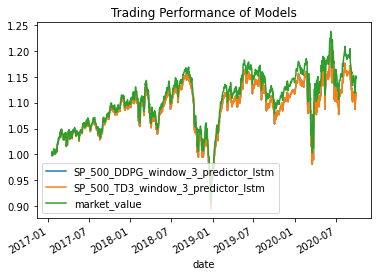

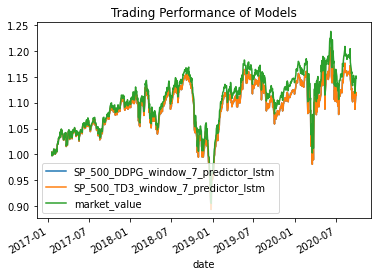

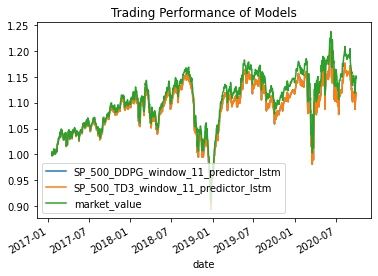

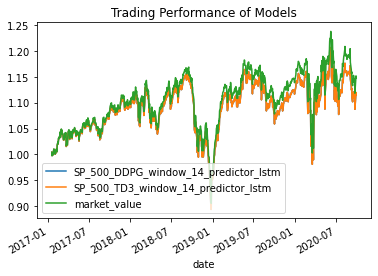

In [ ]:
# Compiled Results
full_model_names = []
full_models = []
portfolio_values_list = [] 

for window_length in window_length_lst:
    model_names_subset = []
    models_subset = []
    for i in range(len(model_names)):
        if 'window_{}'.format(window_length) in model_names[i]:
            model_names_subset.append(model_names[i])
            models_subset.append(models[i])
            
    if technical_indicators_flag:
        env = MultiActionPortfolioEnv(history, assets, model_names_subset, date_list, start_date=test_start_date, 
                              end_date=test_end_date, window_length=window_length, 
                                  technical_indicators_flag=technical_indicators_flag, 
                                  technical_indicator_history=ti_dict[window_length])
    else:
        env = MultiActionPortfolioEnv(history, assets, model_names_subset, date_list, start_date=test_start_date, 
                              end_date=test_end_date, window_length=window_length)

    _, info_list, _, _ = test_model_multiple(env, models_subset)
    
    # Add to results
    for i in range(len(model_names_subset)):
        full_model_names.append(model_names_subset[i].replace('SP_500', dataset_name))
        full_models.append(models_subset[i])     
        portfolio_values_list.append(extract_from_infos(info_list, model_names_subset[i]))

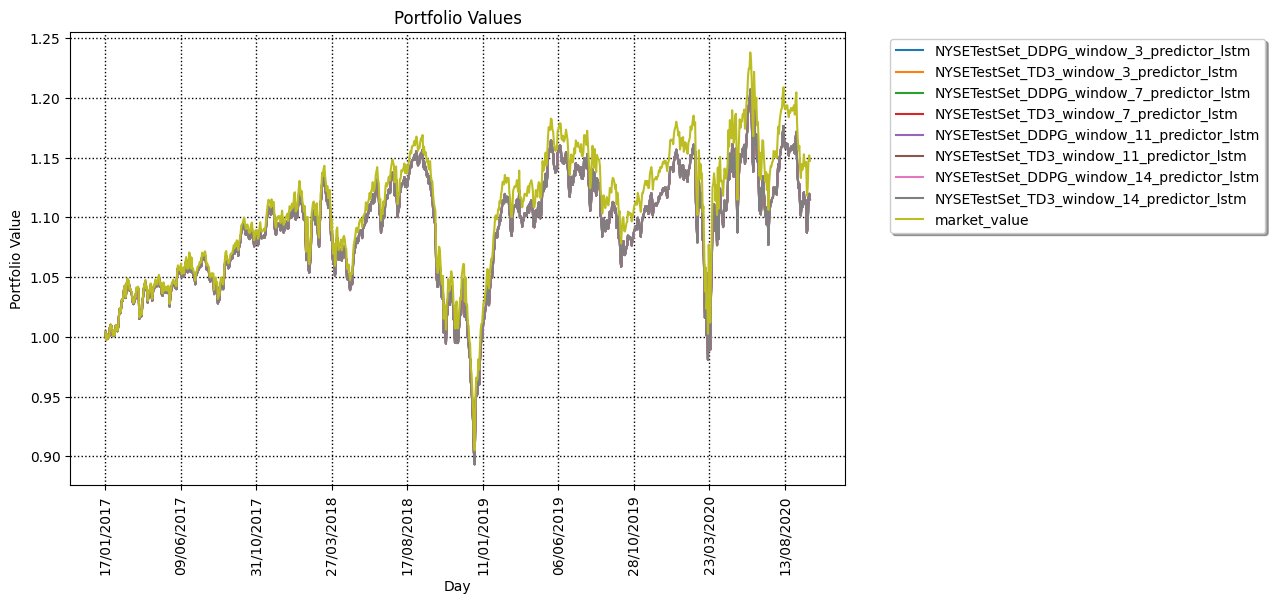

<Figure size 432x288 with 0 Axes>

In [ ]:
log_y = False
df = pd.DataFrame()
dates = extract_from_infos(info_list, 'date')
df["Date"] = dates
df.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6), dpi=100)
if log_y:
    plt.title('Portfolio Values (LOG Y)')
    plt.ylabel('Portfolio Value (LOG Y)')
else:
    plt.title('Portfolio Values')
    plt.ylabel('Portfolio Value')
plt.xlabel('Day')
for i in range(len(full_model_names)):
    df[full_model_names[i]] = portfolio_values_list[i]
    plt.plot(df[full_model_names[i]], label=full_model_names[i])
df['market_value'] = extract_from_infos(info_list, 'market_value')
plt.plot(df['market_value'], label='market_value')
if log_y:
    plt.yscale('log')
plt.xticks(np.arange(0, len(dates), 100))
plt.xticks(rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(1.30, 1), shadow=True, ncol=1)
plt.grid(color='black', linestyle=':', linewidth=1)
plt.show()
plt.savefig("/content/stat_results/{}/plot.jpg".format(dataset_name))

In [ ]:
# RESULT
df = pd.DataFrame(columns=['Portfolio', 'Average Daily Yield (%)', 'Sharpe Ratio (%)', 'Sortino Ratio (%)', 'Maximum Drawdown (%)',
                           'Final Portfolio Value'])
for i in range(len(full_model_names)):
    df = results_table_row(df, full_model_names[i],
                           returns_from_cumulative(portfolio_values_list[i]),
                           portfolio_values_list[i])
# Market
df = results_table_row(df, 'market_value',
                           returns_from_cumulative(extract_from_infos(info_list, 'market_value')),
                           extract_from_infos(info_list, 'market_value'))
df.to_csv("/content/stat_results/{}/results.csv".format(dataset_name))

In [ ]:
df

Portfolio  Average Daily Yield (%)  \
0   NYSETestSet_DDPG_window_3_predictor_lstm                   0.0158   
1    NYSETestSet_TD3_window_3_predictor_lstm                   0.0158   
2   NYSETestSet_DDPG_window_7_predictor_lstm                   0.0158   
3    NYSETestSet_TD3_window_7_predictor_lstm                   0.0158   
4  NYSETestSet_DDPG_window_11_predictor_lstm                   0.0158   
5   NYSETestSet_TD3_window_11_predictor_lstm                   0.0158   
6  NYSETestSet_DDPG_window_14_predictor_lstm                   0.0158   
7   NYSETestSet_TD3_window_14_predictor_lstm                   0.0158   
8                               market_value                   0.0189   

   Sharpe Ratio (%)  Sortino Ratio (%)  Maximum Drawdown (%)  \
0            1.6526             2.1729               22.7675   
1            1.6525             2.1728               22.7675   
2            1.6526             2.1728               22.7675   
3            1.6526             2.1728               22.7676   
4            1.6525             2.1727               22.7676   
5            1.6525             2.1728               22.7676   
6            1.6525             2.1728               22.7677   
7            1.6525             2.1728               22.7676   
8            1.9700             2.5931               22.5863   

   Final Portfolio Value  
0                  1.115  
1                  1.115  
2                  1.115  
3                  1.115  
4                  1.115  
5                  1.115  
6                  1.115  
7                  1.115  
8                  1.147

In [ ]:
# Ensemble 

In [ ]:
# Stock History
dataset_name = 'SP_500_org'
history, assets, date_list = read_stock_history(filepath='/content/data/{}.h5'.format(dataset_name))
history = history[:, :, :4]
nb_classes = len(history) + 1
print("Training Dataset: {}".format(dataset_name))
print("Assets: {}".format(assets))
print("Stock History Shape: {}".format(history.shape))
print("Full Stock History Date Range: {} -> {}".format(date_list[0], date_list[-1]))

Training Dataset: SP_500_org
Assets: ['AAPL', 'MSFT', 'JNJ', 'JPM', 'PG', 'UNH', 'HD', 'DIS', 'VZ', 'CMCSA', 'ADBE', 'PFE', 'BAC', 'INTC', 'T', 'WMT', 'MRK', 'KO', 'PEP', 'ABT', 'TMO', 'CSCO', 'CVX', 'NKE', 'XOM']
Stock History Shape: (25, 6483, 4)
Full Stock History Date Range: 03/01/1995 -> 30/09/2020


In [ ]:
full_length = len(date_list)
train_test_ratio = 6/7
train_start_date = date_list[14]
train_end_date = date_list[(int)(full_length * train_test_ratio)-1]
test_start_date = date_list[(int)(full_length * train_test_ratio)]
test_end_date = date_list[full_length-2]
print("Training Date Range: {} -> {} ({} Steps)".format(train_start_date, train_end_date, 
                                                    (int)(date_list.index(train_end_date) - date_list.index(train_start_date))))
print("Testing Date Range: {} -> {} ({} Steps)".format(test_start_date, test_end_date, 
                                                    (int)(date_list.index(test_end_date) - date_list.index(test_start_date))))

Training Date Range: 23/01/1995 -> 25/01/2017 (5541 Steps)
Testing Date Range: 26/01/2017 -> 29/09/2020 (925 Steps)


In [ ]:
# Models [Framework, Window, Technical Indicators]
model_dict = [
    {
        'framework': 'TD3', 
        'window': 3, 
        'technical_indicators_flag': False
    }, 
    {
        'framework': 'TD3', 
        'window': 7, 
        'technical_indicators_flag': False
    }, 
    {
        'framework': 'TD3', 
        'window': 11, 
        'technical_indicators_flag': False
    }, 
    {
        'framework': 'TD3', 
        'window': 14, 
        'technical_indicators_flag': False
    }
]

In [ ]:
# common settings
batch_size = 64
action_bound = 1.
tau = 1e-3

model_names = []
predictor_type = 'lstm'
use_batch_norm = True
log_return = True
load_technical_indicators = False
maximum_window = max([model['window'] for model in model_dict])
dates = []

In [ ]:
# instantiate environment
dataset_name = 'SP_500_org'

for m in model_dict:
    framework = m['framework']
    window_length = m['window']
    technical_indicators_flag = m['technical_indicators_flag']
        
    # Add name
    if technical_indicators_flag:
        name = '{}_{}_window_{}_predictor_{}_rmr-pred'.format(dataset_name, framework, window_length, predictor_type)
    else:
        name = '{}_{}_window_{}_predictor_{}'.format(dataset_name, framework, window_length, predictor_type)
    m['name'] = name
    model_names.append(name)
    
    tf.reset_default_graph()
    sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, 
                                            log_device_placement=True))    
    tflearn.config.init_training_mode()
    action_dim = [nb_classes]
    
    if technical_indicators_flag:
        technical_indicator_history = ti_dict[window_length]
        state_dim = [nb_classes, window_length+technical_indicator_history.shape[2]]
    else:
        state_dim = [nb_classes, window_length]

    variable_scope = get_variable_scope(dataset_name, framework, window_length, predictor_type, 
                                        use_batch_norm, technical_indicators_flag)

    with tf.variable_scope(variable_scope):

        if(framework == 'DDPG'):
            actor = StockActor(sess, state_dim, action_dim, action_bound, 1e-4, tau, batch_size, 
                               predictor_type, use_batch_norm)
            critic = StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                     learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(), 
                     predictor_type=predictor_type, use_batch_norm=use_batch_norm)
            actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

            model_save_path = get_model_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)
            summary_path = get_result_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)

            ddpg_model = DDPG(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer,
                              log_return=log_return, config_file='config/stock.json', 
                              model_save_path=model_save_path, summary_path=summary_path)
            ddpg_model.initialize(load_weights=True, verbose=True)
            
            # Add model
            m['model'] = ddpg_model

        elif(framework == 'TD3'):
            actor = TD3StockActor(sess, state_dim, action_dim, action_bound, 1e-4, tau, batch_size, 
                                  predictor_type, use_batch_norm)
            critic = TD3StockCritic(sess=sess, state_dim=state_dim, action_dim=action_dim, tau=1e-3,
                     learning_rate=1e-3, num_actor_vars=actor.get_num_trainable_vars(),
                     predictor_type=predictor_type, use_batch_norm=use_batch_norm,
                       inp_actions=actor.scaled_out)
            actor_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

            model_save_path = get_model_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)
            summary_path = get_result_path(dataset_name, framework, window_length, predictor_type, use_batch_norm, technical_indicators_flag)

            td3_model = TD3(None, sess, actor, critic, actor_noise, obs_normalizer=obs_normalizer, 
                            log_return=log_return, config_file='config/stock.json', 
                            model_save_path=model_save_path, summary_path=summary_path)
            td3_model.initialize(load_weights=True, verbose=True)
            
            # Add model
            m['model'] = td3_model

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0

INFO:tensorflow:Restoring parameters from /content/weights/SP_500_org/TD3/lstm/window_3/batch_norm/checkpoint.ckpt
Loading is_training:0 from checkpoint. Name: is_training
Loading SP_500_org_TD3_lstm_window_3_batch_norm/LSTM/SP_500_org_TD3_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Linear/Matrix:0 from checkpoint. Name: SP_500_org_TD3_lstm_window_3_batch_norm/LSTM/SP_500_org_TD3_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Linear/Matrix
Loading SP_500_org_TD3_lstm_window_3_batch_norm/LSTM/SP_500_org_TD3_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Linear/Bias:0 from checkpoint. Name: SP_500_org_TD3_lstm_window_3_batch_norm/LSTM/SP_500_org_TD3_lstm_window_3_batch_norm/LSTM/BasicLSTMCell/Li

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


<Figure size 432x288 with 0 Axes>

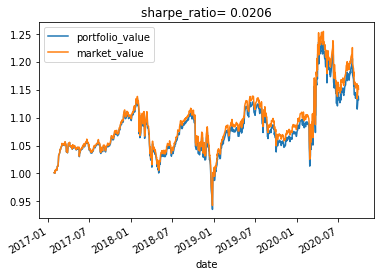

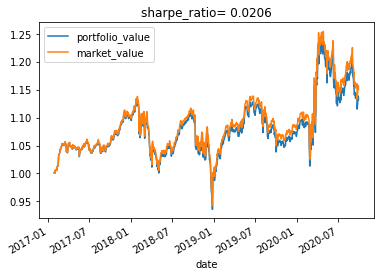

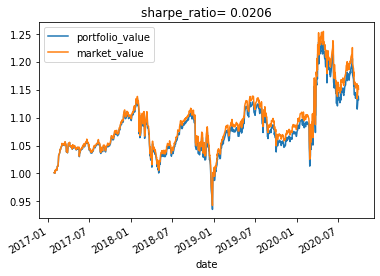

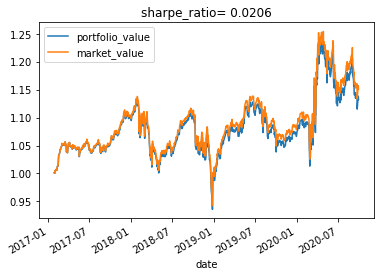

In [ ]:
# Compiled Results
for m in model_dict:
    framework = m['framework']
    window_length = m['window']
    technical_indicators_flag = m['technical_indicators_flag']
    name = m['name']
    model = m['model']
    
    if technical_indicators_flag:
        env = PortfolioEnv(history, assets, date_list, start_date=train_start_date, 
                              end_date=train_end_date, window_length=window_length, 
                                  technical_indicators_flag=True, 
                                  technical_indicator_history=ti_dict[window_length])
    else:
        env = PortfolioEnv(history, assets, date_list, start_date=test_start_date, 
                              end_date=test_end_date, window_length=window_length)

    
    dates, observations, info_list, actions, _, _, portfolio_values, in_market_portfolio_values = test_model(env, model)
    
    m['actions'] = actions
    m['portfolio_values'] = portfolio_values

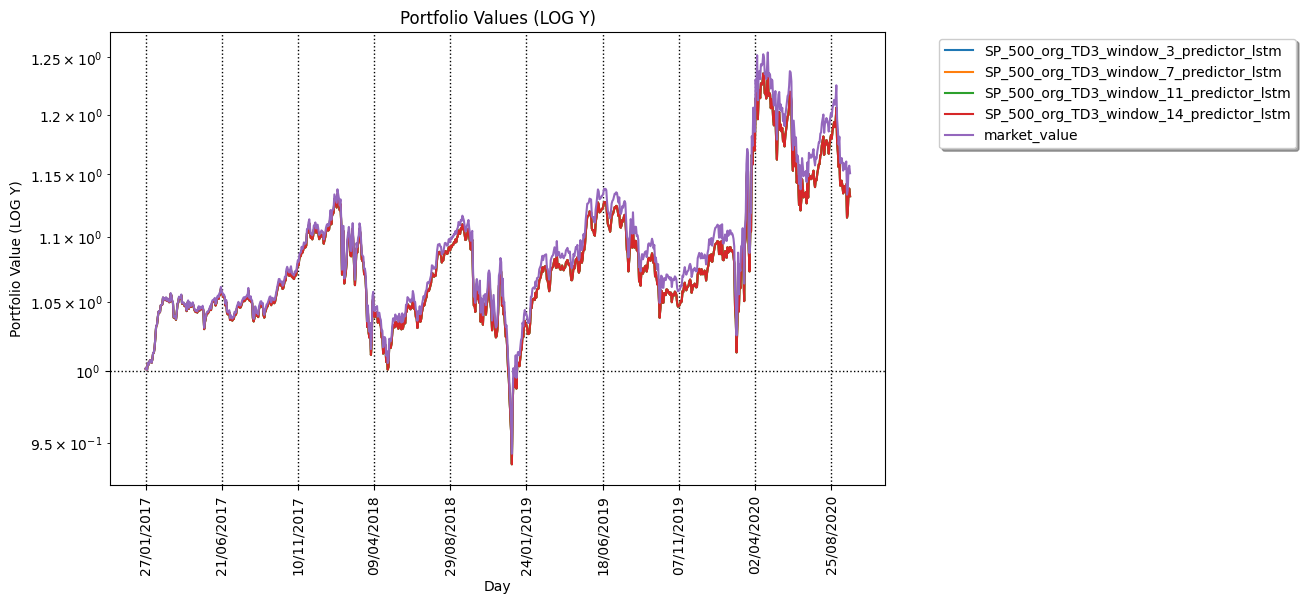

In [ ]:
log_y = True
df = pd.DataFrame()
df["Date"] = dates
df.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6), dpi=100)
if log_y:
    plt.title('Portfolio Values (LOG Y)')
    plt.ylabel('Portfolio Value (LOG Y)')
else:
    plt.title('Portfolio Values')
    plt.ylabel('Portfolio Value')
plt.xlabel('Day')
# Models
for m in model_dict:
    df[m['name']] = m['portfolio_values']
    plt.plot(df[m['name']], label=m['name'])
# Market
df['market_value'] = in_market_portfolio_values
plt.plot(df['market_value'], label='market_value')
if log_y:
    plt.yscale('log')
plt.xticks(np.arange(0, len(dates), 100))
plt.xticks(rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)
plt.grid(color='black', linestyle=':', linewidth=1)
plt.show()

In [ ]:
ensemble_window = 14


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import json
# from environment.portfolio import max_drawdown, sharpe, sortino
# from stock_trading import extract_from_infos, returns_from_cumulative


def ensemble_test(env, model_names, model_weights_list, model_portfolio_values_list, starting_model_name, window=14,
                  action_window=1, criteria_type='return'):
    # Selected Weights
    selected_actions = []
    selected_models = []
    selected_sharpe = []
    info_list = []

    selected_model_name = starting_model_name
    index = 0

    assert criteria_type in ['return', 'sharpe'], 'criteria type must be either return or sharpe'
    assert len(model_names) == len(model_weights_list), 'Number of models is to be equal to models in weights list'
    # assert env.sim.steps == len(model_weights_list[0]) - 1, 'Number of steps is to be equal to weights list'

    # Start environment. Get first observation
    _, _, info = env.reset()

    # Pass through starting window with starting model
    for i in range(window):
        # Choose action/weights via selected agent
        weights = model_weights_list[model_names.index(selected_model_name)][index]

        selected_sharpe.append(0)

        # step forward in Portfolio Environment
        _, _, _, done, info, _, _ = env.step(weights)
        info_list.append(info)

        selected_actions.append(weights)
        selected_models.append(selected_model_name)

        index = index + 1

    # Calculate action steps based on action window
    action_steps = int((env.sim.steps - window) / action_window)

    done = False
    for i in range(action_steps):
        # Evaluate each agent via Sharpe Ratio
        criteria_list = []
        for model_portfolio_values in model_portfolio_values_list:
            # Calculate based on criteria type
            if criteria_type == 'return':
                criteria_list.append(np.mean(returns_from_cumulative(model_portfolio_values[(index - window):index])))
            elif criteria_type == 'sharpe':
                criteria_list.append(sharpe(returns_from_cumulative(model_portfolio_values[(index - window):index])))

                # Select model with highest sharpe ratio
        selected_model_name = model_names[criteria_list.index(max(criteria_list))]

        # Select agent to record weights
        for j in range(action_window):
            # Choose action/weights via selected agent
            weights = model_weights_list[model_names.index(selected_model_name)][index]

            selected_sharpe.append(max(criteria_list))

            # step forward in Portfolio Environment
            _, _, _, done, info, _, _ = env.step(weights)
            info_list.append(info)

            selected_actions.append(weights)
            selected_models.append(selected_model_name)

            index = index + 1

    # Pass through any remainder with the last selected agent
    while not done:
        # Choose action/weights via selected agent
        weights = model_weights_list[model_names.index(selected_model_name)][index]

        selected_sharpe.append(max(criteria_list))

        # step forward in Portfolio Environment
        _, _, _, done, info, _, _ = env.step(weights)
        info_list.append(info)

        selected_actions.append(weights)
        selected_models.append(selected_model_name)

        index = index + 1

    return selected_actions, selected_models, extract_from_infos(info_list, 'portfolio_value'), selected_sharpe

In [ ]:
# Environment
env = PortfolioEnv(history, assets, date_list, start_date=test_start_date, 
                              end_date=test_end_date, window_length=maximum_window)

starting_model_name = model_names[1]
model_names = []
model_weights_list = []
model_portfolio_values_list = []
for m in model_dict:
    model_names.append(m['name'])
    model_weights_list.append(m['actions'])
    model_portfolio_values_list.append(m['portfolio_values'])

# Select Actions
print(model_names)
print(len(model_weights_list))
selected_actions, selected_models, ensemble_portfolio_values, selected_sharpe = ensemble_test(env, 
                                            model_names, model_weights_list, model_portfolio_values_list, 
                                            starting_model_name, window=ensemble_window, action_window=1)

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


['SP_500_org_TD3_window_3_predictor_lstm', 'SP_500_org_TD3_window_7_predictor_lstm', 'SP_500_org_TD3_window_11_predictor_lstm', 'SP_500_org_TD3_window_14_predictor_lstm']
4


In [ ]:
full_model_names = ['Ensemble'] + model_names #+ olps_model_names
portfolio_values_list = [ensemble_portfolio_values]
for m in model_dict:
    portfolio_values_list.append(m['portfolio_values'])
    
portfolio_values = portfolio_values_list #+ olps_portfolio_values_list
results_table(full_model_names, portfolio_values)

Portfolio  Average Daily Yield (%)  \
0                                 Ensemble                   0.0166   
1   SP_500_org_TD3_window_3_predictor_lstm                   0.0166   
2   SP_500_org_TD3_window_7_predictor_lstm                   0.0166   
3  SP_500_org_TD3_window_11_predictor_lstm                   0.0166   
4  SP_500_org_TD3_window_14_predictor_lstm                   0.0166   

   Sharpe Ratio (%)  Sortino Ratio (%)  Maximum Drawdown (%)  \
0            2.0445             2.4719               17.5061   
1            2.0445             2.4719               17.5060   
2            2.0445             2.4719               17.5061   
3            2.0445             2.4719               17.5061   
4            2.0444             2.4718               17.5061   

   Final Portfolio Value  
0                  1.132  
1                  1.132  
2                  1.132  
3                  1.132  
4                  1.132

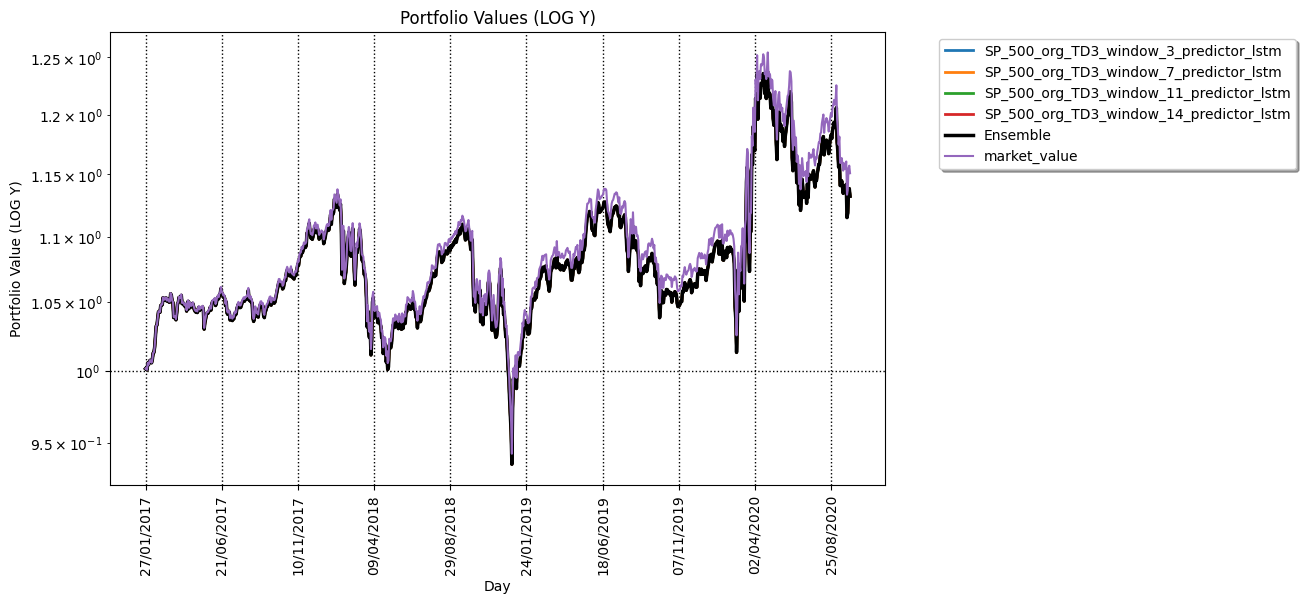

In [ ]:
# Plot Together
log_y = True
df = pd.DataFrame()
df["Date"] = dates
df.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6), dpi=100)
if log_y:
    plt.title('Portfolio Values (LOG Y)')
    plt.ylabel('Portfolio Value (LOG Y)')
else:
    plt.title('Portfolio Values')
    plt.ylabel('Portfolio Value')
plt.xlabel('Day')

# # OLPS
# for i in range(len(olps_model_names)):
#     df[olps_model_names[i]] = olps_portfolio_values_list[i]
#     plt.plot(df[olps_model_names[i]], label=olps_model_names[i], 
#              linewidth=1, 
#              linestyle='dashed')

# Our models
for m in model_dict:
    df[m['name']] = m['portfolio_values']
    plt.plot(df[m['name']], label=m['name'], 
             linewidth=2)
    
# Ensemble
plt.plot(ensemble_portfolio_values, label='Ensemble', 
             linewidth=2.5,
            color='black')    
df['market_value'] = in_market_portfolio_values
plt.plot(df['market_value'], label='market_value')

if log_y:
    plt.yscale('log')
plt.xticks(np.arange(0, len(dates), 100))
plt.xticks(rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1), shadow=True, ncol=1)
plt.grid(color='black', linestyle=':', linewidth=1)
plt.show()

In [ ]:
# Compiled Results
full_model_names = []
full_models = []
portfolio_values_list = [] 
cv_pv = []
print(test_start_date)
test_data = date_list[date_list.index(test_start_date):]
list_chunks = list(chunks(test_data, int(len(test_data)/5)))


for window_length in window_length_lst:
    model_names_subset = []
    models_subset = []
    pv = [] 
    for j in range(len(list_chunks)):
      test_start_date = list_chunks[0][0]
      test_end_date = list_chunks[j][-1]
      for i in range(len(model_names)):
          if 'window_{}'.format(window_length) in model_names[i]:
              model_names_subset.append(model_names[i])
              models_subset.append(models[i])
              
      if technical_indicators_flag:
          env = MultiActionPortfolioEnv(history, assets, model_names_subset, date_list, start_date=test_start_date, 
                                end_date=test_end_date, window_length=window_length, 
                                    technical_indicators_flag=technical_indicators_flag, 
                                    technical_indicator_history=ti_dict[window_length])
      else:
          env = MultiActionPortfolioEnv(history, assets, model_names_subset, date_list, start_date=test_start_date, 
                                end_date=test_end_date, window_length=window_length)

      _, info_list, _, _ = test_model_multiple(env, models_subset)
      
      # Add to results
      for i in range(len(model_names_subset)):
          full_model_names.append(model_names_subset[i])
          full_models.append(models_subset[i])     
          portfolio_values_list.append(extract_from_infos(info_list, model_names_subset[i]))
      cv_pv.append(portfolio_values_list)
    # cv_pv.append()

26/01/2017


NameError: ignored

In [ ]:
# Stock History
dataset_name = 'NYSE_T2'
history, assets, date_list = read_stock_history(filepath='/content/data/{}.h5'.format(dataset_name))
history = history[:, :, :4]
nb_classes = len(history) + 1
print("Training Dataset: {}".format(dataset_name))
print("Assets: {}".format(assets))
print("Stock History Shape: {}".format(history.shape))
print("Full Stock History Date Range: {} -> {}".format(date_list[0], date_list[-1]))
full_length = len(date_list)
train_test_ratio = 6.37/10
train_start_date = date_list[14]
train_end_date = date_list[(int)(full_length * train_test_ratio)-1]
test_start_date = date_list[(int)(full_length * train_test_ratio)]
test_end_date = date_list[full_length-2]
print("Training Date Range: {} -> {} ({} Steps)".format(train_start_date, train_end_date, 
                                                    (int)(date_list.index(train_end_date) - date_list.index(train_start_date))))
print("Testing Date Range: {} -> {} ({} Steps)".format(test_start_date, test_end_date, 
                                                    (int)(date_list.index(test_end_date) - date_list.index(test_start_date))))
framework_lst = ['DDPG','TD3']
window_length_lst = [3,7,11,14]
predictor_type_lst = ['lstm']
technical_indicators_flag = False
models = []
model_names = []
ti_dict=[]
use_batch_norm = True
action_bound = 1.
log_return = True


Training Dataset: NYSE_T2
Assets: ['BRK-A', 'BX', 'MRVL', 'MELI', 'PANW', 'SQ', 'EPD', 'KDP', 'VMW', 'WDAY', 'LULU', 'STZ-B', 'DELL', 'APO', 'ET', 'LNG', 'KKR', 'MPLX', 'BATRA', 'BATRK', 'FWONA', 'FWONK', 'LSXMA', 'LSXMB', 'LSXMK']
Stock History Shape: (25, 951, 4)
Full Stock History Date Range: 20/12/2016 -> 30/09/2020
Training Date Range: 11/01/2017 -> 17/05/2019 (590 Steps)
Testing Date Range: 20/05/2019 -> 29/09/2020 (344 Steps)


In [ ]:
# Stock History
dataset_name = 'NYSE_T1'
history, assets, date_list = read_stock_history(filepath='/content/data/{}.h5'.format(dataset_name))
history = history[:, :, :4]
nb_classes = len(history) + 1
print("Training Dataset: {}".format(dataset_name))
print("Assets: {}".format(assets))
print("Stock History Shape: {}".format(history.shape))
print("Full Stock History Date Range: {} -> {}".format(date_list[0], date_list[-1]))
full_length = len(date_list)
train_test_ratio = 6.37/10
train_start_date = date_list[14]
train_end_date = date_list[(int)(full_length * train_test_ratio)-1]
test_start_date = date_list[(int)(full_length * train_test_ratio)]
test_end_date = date_list[full_length-2]
print("Training Date Range: {} -> {} ({} Steps)".format(train_start_date, train_end_date, 
                                                    (int)(date_list.index(train_end_date) - date_list.index(train_start_date))))
print("Testing Date Range: {} -> {} ({} Steps)".format(test_start_date, test_end_date, 
                                                    (int)(date_list.index(test_end_date) - date_list.index(test_start_date))))
framework_lst = ['DDPG','TD3']
window_length_lst = [3,7,11,14]
predictor_type_lst = ['lstm']
technical_indicators_flag = False
models = []
model_names = []
ti_dict=[]
use_batch_norm = True
action_bound = 1.
log_return = True


Training Dataset: NYSE_T1
Assets: ['BRK-A', 'BX', 'MRVL', 'MELI', 'PANW', 'SQ', 'EPD', 'KDP', 'VMW', 'WDAY', 'LULU', 'STZ-B', 'DELL', 'APO', 'ET', 'LNG', 'KKR', 'MPLX', 'BATRA', 'BATRK', 'FWONA', 'FWONK', 'LSXMA', 'LSXMB', 'LSXMK', 'TTD', 'BF-A', 'PCG', 'VEEV', 'TWLO', 'ON', 'CQP', 'CSGP', 'SIRI', 'SGEN', 'MKC-V', 'LEN-B', 'HZNP', 'HUBS', 'LBRDA', 'LBRDK', 'CLR', 'SPLK', 'SUI', 'MKL', 'TRU', 'ALNY', 'SSNC', 'HEI', 'HEI-A', 'ENTG', 'ACGL', 'PODD', 'AGR', 'UI', 'CPT', 'NUAN', 'TRGP', 'BIO-B', 'AA', 'CLF', 'CG', 'PLUG', 'WLK', 'STLD', 'CCK', 'WPC', 'BG', 'IEP', 'LPLA', 'ALLY', 'ZEN', 'ELS', 'BMRN', 'WOLF', 'GDDY', 'AMH', 'FNF', 'OVV', 'CAR', 'LBTYA', 'LBTYB', 'LBTYK', 'ARES', 'CAC', 'CGNX', 'CNA', 'AMC', 'WTRG', 'DISCB', 'CSL', 'DAR', 'EQT', 'Z', 'ZG', 'MPW', 'GME', 'BURL', 'FHN', 'AFG', 'FICO', 'EXAS', 'REXR', 'JLL', 'GGG', 'BLDR', 'WSO', 'WSO-B', 'MORN', 'LSI', 'CUBE', 'BAH', 'UHAL', 'CONE', 'TAP-A', 'RS', 'TDOC', 'EWBC', 'Y', 'PCTY', 'GLPI', 'TPL', 'ACM', 'AZPN', 'AGCO', 'MTN', 'RPM', 

In [ ]:
# RESULT
df = pd.DataFrame(columns=['Portfolio', 'Average Daily Yield (%)', 'Sharpe Ratio (%)', 'Sortino Ratio (%)', 'Maximum Drawdown (%)',
                           'Final Portfolio Value'])
for i in range(len(full_model_names)):
    df = results_table_row(df, full_model_names[i],
                           returns_from_cumulative(portfolio_values_list[i]),
                           portfolio_values_list[i])
# Market
df = results_table_row(df, 'market_value',
                           returns_from_cumulative(extract_from_infos(info_list, 'market_value')),
                           extract_from_infos(info_list, 'market_value'))
df

In [ ]:
# Compiled Results
full_model_names = []
full_models = []
portfolio_values_list = [] 
cv_pv = []
test_data = date_list[date_list.index(test_start_date):]
list_chunks = list(chunks(test_data, int(len(test_data)/5)))

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packa

ValueError: ignored

<Figure size 432x288 with 0 Axes>

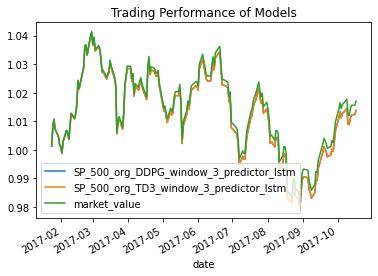

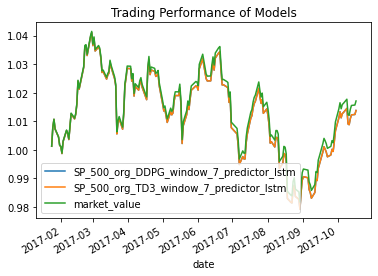

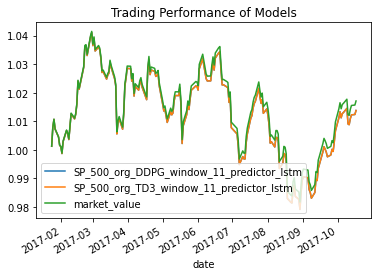

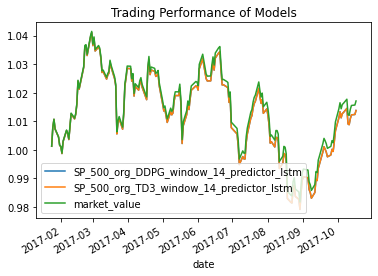

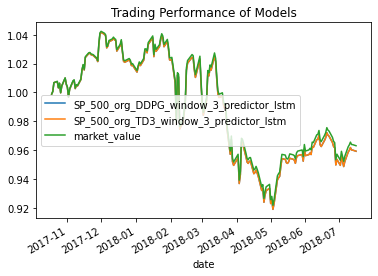

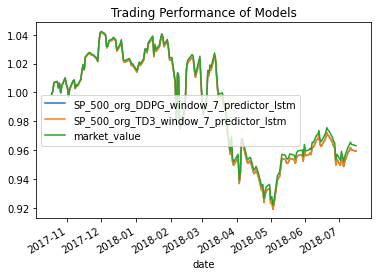

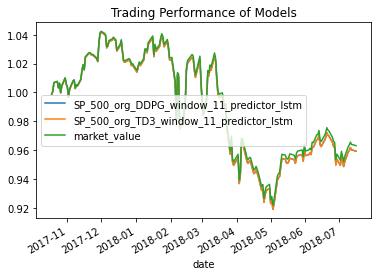

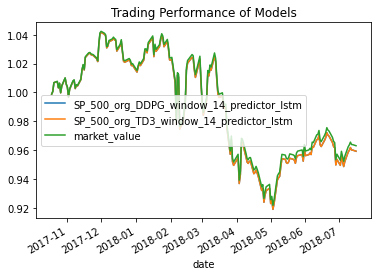

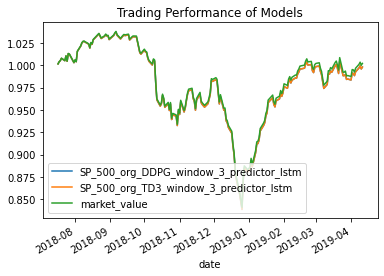

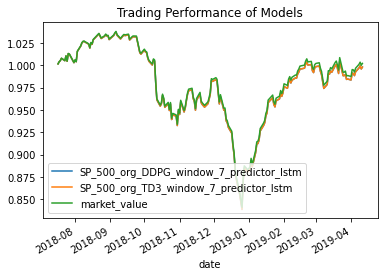

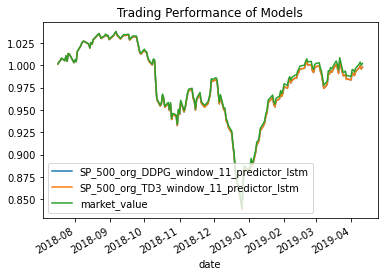

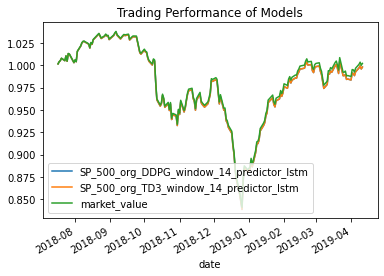

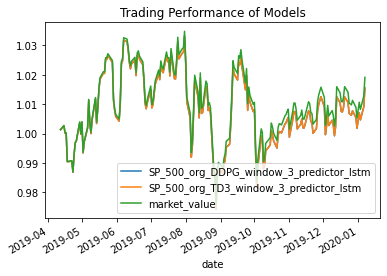

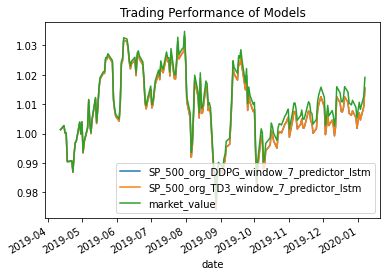

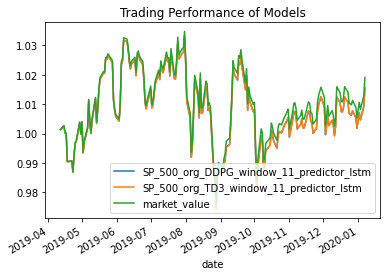

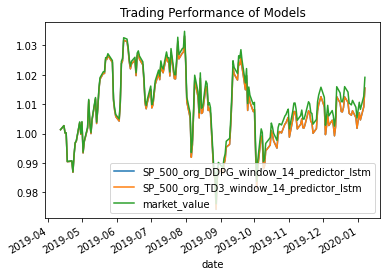

In [ ]:
# Compiled Results
full_model_names = []
full_models = []
portfolio_values_list = [] 
pv_dict = {}


for j in range(len(list_chunks)):
  test_start_date_1 = list_chunks[j][0]
  test_end_date_1 = list_chunks[j][-1]
  for window_length in window_length_lst:
      model_names_subset = []
      models_subset = []
      for i in range(len(model_names)):
          if 'window_{}'.format(window_length) in model_names[i]:
              model_names_subset.append(model_names[i])
              models_subset.append(models[i])
              
      if technical_indicators_flag:
          env = MultiActionPortfolioEnv(history, assets, model_names_subset, date_list, start_date=test_start_date_1, 
                                end_date=test_end_date_1, window_length=window_length, 
                                    technical_indicators_flag=technical_indicators_flag, 
                                    technical_indicator_history=ti_dict[window_length])
      else:
          env = MultiActionPortfolioEnv(history, assets, model_names_subset, date_list, start_date=test_start_date_1, 
                                end_date=test_end_date_1, window_length=window_length)

      _, info_list, _, _ = test_model_multiple(env, models_subset)
      
      # Add to results
      for i in range(len(model_names_subset)):
          full_model_names.append(model_names_subset[i])
          full_models.append(models_subset[i])     
          portfolio_values_list.append(extract_from_infos(info_list, model_names_subset[i]))
          if model_names_subset[i] in pv_dict.keys():
            pv_dict[model_names_subset[i]] += [a - b for a, b in zip(extract_from_infos(info_list, model_names_subset[i]), extract_from_infos(info_list, 'market_value'))]
          else:
            pv_dict[model_names_subset[i]] = [a - b for a, b in zip(extract_from_infos(info_list, model_names_subset[i]), extract_from_infos(info_list, 'market_value'))]
          pv_dict['market_value'] = extract_from_infos(info_list, 'market_value')

In [ ]:
pv_dict_1 = pv_dict.copy()
for key_1, value_1 in pv_dict_1.items():
  pv_dict_1[key_1] = np.sqrt(np.sum(np.square(value_1))/len(value_1))
pv_dict_1

{'SP_500_org_DDPG_window_11_predictor_lstm': 0.0021739512042868963,
 'SP_500_org_DDPG_window_14_predictor_lstm': 0.0021741071147248405,
 'SP_500_org_DDPG_window_3_predictor_lstm': 0.002174431772934214,
 'SP_500_org_DDPG_window_7_predictor_lstm': 0.0021746933023008667,
 'SP_500_org_TD3_window_11_predictor_lstm': 0.002174042503595254,
 'SP_500_org_TD3_window_14_predictor_lstm': 0.0021736243333759864,
 'SP_500_org_TD3_window_3_predictor_lstm': 0.0021738532823681184,
 'SP_500_org_TD3_window_7_predictor_lstm': 0.002173973201621719,
 'market_value': 1.0104723469962171}

In [ ]:
log_y = False
df = pd.DataFrame()
dates = extract_from_infos(info_list, 'date')
df["Date"] = dates
df.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6), dpi=100)
if log_y:
    plt.title('Portfolio Values (LOG Y)')
    plt.ylabel('Portfolio Value (LOG Y)')
else:
    plt.title('Portfolio Values')
    plt.ylabel('Portfolio Value')
plt.xlabel('Day')


for i in range(len(full_model_names)):
    df[full_model_names[i]] = portfolio_values_list[i]
    plt.plot(df[full_model_names[i]], label=full_model_names[i])

df['market_value'] = extract_from_infos(info_list, 'market_value')
plt.plot(df['market_value'], label='market_value')

if log_y:
    plt.yscale('log')
plt.xticks(np.arange(0, len(dates), 100))
plt.xticks(rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(1.30, 1), shadow=True, ncol=1)
plt.grid(color='black', linestyle=':', linewidth=1)
plt.show()

In [ ]:
info_list


In [ ]:
# RESULT
import os
df = pd.DataFrame(columns=['Portfolio', 'Average Daily Yield (%)', 'Sharpe Ratio (%)', 'Sortino Ratio (%)', 'Maximum Drawdown (%)',
                           'Final Portfolio Value'])
for i in range(len(full_model_names)):
    df = results_table_row(df, full_model_names[i],
                           returns_from_cumulative(portfolio_values_list[i]),
                           portfolio_values_list[i])
# Market
df = results_table_row(df, 'market_value',
                           returns_from_cumulative(extract_from_infos(info_list, 'market_value')),
                           extract_from_infos(info_list, 'market_value'))
# path = "/content/stat_results/{}".format(dataset_name)
# path
# if not (os.path.exists(path)):
#     os.mkdir(path)


df.to_csv("/content/stat_results/{}/results.csv".format(dataset_name))
df

In [ ]:
vars_to_restore = [i[0] for i in tf.train.list_variables("/content/weights/SP_500_org/DDPG/lstm/window_3/batch_norm/test/checkpoint.ckpt")]
# vars_to_restore
restore_dict = {variable.op.name: variable for variable in tf.global_variables() if variable.op.name in vars_to_restore}
restore_dict
# var_list = checkpoint_utils.list_variables()
# for v in var_list:
#     print(v)

In [ ]:
tf.global_variables()

In [ ]:
x = "/content/weights/SP_500_org/DDPG/lstm/window_7/batch_norm/checkpoint.ckpt"

In [ ]:
import tensorflow as tf
from tensorflow.python.tools import inspect_checkpoint as chkp

chkp.print_tensors_in_checkpoint_file(x, tensor_name=None, all_tensors=True)